<a href="https://colab.research.google.com/github/marianoInsa/ONE-TelecomX/blob/main/Challenge-TelecomX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Abrir en Colab"/></a>

# Configuración del Entorno

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json

sns.set_theme()

# Fase 1: Extracción (Extract)

In [470]:
def extraer_datos(url: str) -> pd.DataFrame | None:
    """
    Descarga los datos desde una API remota en formato JSON y los convierte en un DataFrame.
    
    Realiza una solicitud HTTP GET a la URL proporcionada, parsea la respuesta JSON
    y construye un DataFrame de Pandas con los datos extraídos. En caso de error,
    retorna None y registra el mensaje de excepción.
    
    Argumentos:
        url (str): Dirección URL de la API de donde se extraerán los datos.
    
    Retorna:
        pd.DataFrame | None: DataFrame con los datos extraídos, o None si ocurre un error.
        En caso de éxito, imprime un mensaje con las dimensiones del DataFrame.
    """
    try:
        response = requests.get(url)
        response.raise_for_status()

        data = json.loads(response.text)

        df = pd.DataFrame(data)
        print(f"✅ Datos extraídos con éxito. \nDimensiones: {df.shape}")
        return df
    except Exception as e:
        print(f"❌ Error en extracción: {e}")
        return None


In [471]:
raw_url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

raw_df = extraer_datos(raw_url)

✅ Datos extraídos con éxito. 
Dimensiones: (7267, 6)


## Conociendo el Data Set

In [472]:
raw_df.info(verbose=True)

<class 'pandas.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   str   
 1   Churn       7267 non-null   str   
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(4), str(2)
memory usage: 340.8+ KB


In [473]:
raw_df.dtypes

customerID       str
Churn            str
customer      object
phone         object
internet      object
account       object
dtype: object

In [474]:
raw_df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [475]:
raw_df.tail()

,customerID,Churn,customer,phone,internet,account
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."
7266,9995-HOTOH,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'No', 'MultipleLines': 'No ph...","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [476]:
raw_df.describe()

,customerID,Churn,customer,phone,internet,account
count,7267,7267,7267,7267,7267,7267
unique,7267,3,891,3,129,6931
top,0002-ORFBO,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
freq,1,5174,223,3495,1581,6


# Fase 2: Transformación (Transform)

## Limpieza Estructural

### Normalización

In [477]:
def normalizar_datos(df: pd.DataFrame, column_names: list) -> pd.DataFrame | None:
    """
    Desnormaliza estructuras JSON anidadas en columnas independientes con nombres estandarizados.
    
    Expande objetos JSON anidados en DataFrames planos, añadiendo prefijos con el nombre
    de la columna padre y convirtiendo todos los nombres de columnas resultantes a
    snake_case (minúsculas con guiones bajos). Mantiene las columnas no anidadas sin cambios.
    
    Argumentos:
        df (pd.DataFrame): DataFrame de entrada que contiene columnas con objetos JSON anidados.
        column_names (list): Lista de nombres de columnas anidadas a normalizar.
    
    Retorna:
        pd.DataFrame | None: DataFrame con estructuras anidadas desnormalizadas, o None si ocurre error.
        Los nombres de columnas siguen formato: {nombre_padre}_{nombre_original}.
    """
    try:
        missing_cols = [col for col in column_names if col not in df.columns]
        if missing_cols:
            print(f"❌ Columnas no encontradas: {missing_cols}")
            return None
        
        # columnas que no se van a normalizar
        non_nested_cols = [col for col in df.columns if col not in column_names]
        normalized_df = df[non_nested_cols].copy()

        for column_name in column_names:
            # normaliza la columna
            normalized_segment = pd.json_normalize(df[column_name])

            # agregar prefijos y limpiar nombres
            normalized_segment.columns = [
                f"{column_name}_{col}".replace('.', '_').lower() 
                for col in normalized_segment.columns
            ]

            # alinear índices
            normalized_segment.index = normalized_df.index

            # concatenar el segmento normalizado con el df principal
            normalized_df = pd.concat([normalized_df, normalized_segment], axis=1)

        print(f"✅ Datos normalizados con éxito. \nDimensiones: {normalized_df.shape}")
        return normalized_df
    except Exception as e:
        print(f"❌ Error en normalización: {e}")
        return None


In [478]:
normalized_df = normalizar_datos(raw_df, ["customer", "phone", "internet", "account"])

✅ Datos normalizados con éxito. 
Dimensiones: (7267, 21)


In [479]:
normalized_df.head()

,customerID,Churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_onlinebackup,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


### Manejo de Tipos

In [480]:
normalized_df.info(verbose=True)

<class 'pandas.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   str    
 1   Churn                      7267 non-null   str    
 2   customer_gender            7267 non-null   str    
 3   customer_seniorcitizen     7267 non-null   int64  
 4   customer_partner           7267 non-null   str    
 5   customer_dependents        7267 non-null   str    
 6   customer_tenure            7267 non-null   int64  
 7   phone_phoneservice         7267 non-null   str    
 8   phone_multiplelines        7267 non-null   str    
 9   internet_internetservice   7267 non-null   str    
 10  internet_onlinesecurity    7267 non-null   str    
 11  internet_onlinebackup      7267 non-null   str    
 12  internet_deviceprotection  7267 non-null   str    
 13  internet_techsupport       7267 non-null   str    
 14  int

In [481]:
normalized_df.dtypes

customerID                       str
Churn                            str
customer_gender                  str
customer_seniorcitizen         int64
customer_partner                 str
customer_dependents              str
customer_tenure                int64
phone_phoneservice               str
phone_multiplelines              str
internet_internetservice         str
internet_onlinesecurity          str
internet_onlinebackup            str
internet_deviceprotection        str
internet_techsupport             str
internet_streamingtv             str
internet_streamingmovies         str
account_contract                 str
account_paperlessbilling         str
account_paymentmethod            str
account_charges_monthly      float64
account_charges_total            str
dtype: object

El campo "account_charges_total" es de tipo "str", pero debería ser "float64"

In [482]:
def reemplazar_espacios_en_blanco(df: pd.DataFrame, column_name: str, string: str = None) -> pd.DataFrame | None:
    """
    Reemplaza valores en blanco (espacios vacíos) en una columna específica.
    
    Identifica celdas que contienen solo espacios en una columna y las reemplaza por
    un valor especificado (por defecto NaN). Útil para limpiar datos con espacios
    como valor faltante.
    
    Argumentos:
        df (pd.DataFrame): DataFrame de entrada.
        column_name (str): Nombre de la columna donde se reemplazarán espacios.
        string (str, optional): Valor de reemplazo. Si es None, usa NaN. Por defecto None.
    
    Retorna:
        pd.DataFrame | None: DataFrame con espacios reemplazados, o None si ocurre error.
        Imprime mensaje de confirmación sobre la operación realizada.
    """
    if df is None:
        print(f"❌ Error: El DataFrame de entrada es None.")
        return None

    df_copy = df.copy()

    if string is None:
        df_copy[column_name] = df_copy[column_name].replace(' ', np.nan)
        print(f"✅ espacios en blanco reemplazadas con NaN en la columna '{column_name}'.")

    else:
        df_copy[column_name] = df_copy[column_name].replace(' ', string)
        print(f"✅ espacios en blanco reemplazadas con '{string}' en la columna '{column_name}'.")

    return df_copy

In [483]:
def convertir_tipo_columna(df: pd.DataFrame, column_name: str, new_type: type) -> pd.DataFrame | None:
    """
    Convierte el tipo de datos de una columna a un tipo especificado.
    
    Realiza conversión de tipos con manejo de errores. Primero reemplaza espacios
    en blanco por valores predeterminados, luego convierte a numérico usando
    pd.to_numeric (con coerción de errores a NaN), y finalmente al tipo final deseado.
    
    Argumentos:
        df (pd.DataFrame): DataFrame de entrada.
        column_name (str): Nombre de la columna a convertir.
        new_type (type): Tipo de datos de destino (ej: np.float64, int, str).
    
    Retorna:
        pd.DataFrame | None: DataFrame con columna convertida, o None si ocurre error.
        Imprime mensaje de confirmación del tipo asignado.
    """
    try:
        if df is None:
            print(f"❌ Error: El DataFrame de entrada es None.")
            return None

        # primero elimino espacios en blanco
        # si 'new_type' es decimal, el string es '0.0'
        df = reemplazar_espacios_en_blanco(df, column_name, '0.0')

        if df is None:
            print(f"❌ Error en conversión de tipo: reemplazar_espacios_en_blanco devolvió None.")
            return None

        # convertir columna a numerico, convirtiendo los errores a NaN
        df[column_name] = pd.to_numeric(df[column_name], errors='coerce')

        # convertir al nuevo tipo específico
        df[column_name] = df[column_name].astype(new_type)

        print(f"✅ Tipo de columna '{column_name}' convertido a '{new_type}'.")
        return df

    except Exception as e:
        print(f"❌ Error en conversión de tipo: {e}")
        return None

In [484]:
normalized_df = convertir_tipo_columna(normalized_df, "account_charges_total", np.float64)

✅ espacios en blanco reemplazadas con '0.0' en la columna 'account_charges_total'.
✅ Tipo de columna 'account_charges_total' convertido a '<class 'numpy.float64'>'.


In [485]:
normalized_df.info(verbose=True)

<class 'pandas.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   str    
 1   Churn                      7267 non-null   str    
 2   customer_gender            7267 non-null   str    
 3   customer_seniorcitizen     7267 non-null   int64  
 4   customer_partner           7267 non-null   str    
 5   customer_dependents        7267 non-null   str    
 6   customer_tenure            7267 non-null   int64  
 7   phone_phoneservice         7267 non-null   str    
 8   phone_multiplelines        7267 non-null   str    
 9   internet_internetservice   7267 non-null   str    
 10  internet_onlinesecurity    7267 non-null   str    
 11  internet_onlinebackup      7267 non-null   str    
 12  internet_deviceprotection  7267 non-null   str    
 13  internet_techsupport       7267 non-null   str    
 14  int

In [486]:
normalized_df.dtypes

customerID                       str
Churn                            str
customer_gender                  str
customer_seniorcitizen         int64
customer_partner                 str
customer_dependents              str
customer_tenure                int64
phone_phoneservice               str
phone_multiplelines              str
internet_internetservice         str
internet_onlinesecurity          str
internet_onlinebackup            str
internet_deviceprotection        str
internet_techsupport             str
internet_streamingtv             str
internet_streamingmovies         str
account_contract                 str
account_paperlessbilling         str
account_paymentmethod            str
account_charges_monthly      float64
account_charges_total        float64
dtype: object

In [487]:
normalized_df.head()

,customerID,Churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_onlinebackup,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


### Manejo de nulos

In [488]:
normalized_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   str    
 1   Churn                      7267 non-null   str    
 2   customer_gender            7267 non-null   str    
 3   customer_seniorcitizen     7267 non-null   int64  
 4   customer_partner           7267 non-null   str    
 5   customer_dependents        7267 non-null   str    
 6   customer_tenure            7267 non-null   int64  
 7   phone_phoneservice         7267 non-null   str    
 8   phone_multiplelines        7267 non-null   str    
 9   internet_internetservice   7267 non-null   str    
 10  internet_onlinesecurity    7267 non-null   str    
 11  internet_onlinebackup      7267 non-null   str    
 12  internet_deviceprotection  7267 non-null   str    
 13  internet_techsupport       7267 non-null   str    
 14  int

In [489]:
normalized_df.isna().sum()

customerID                   0
Churn                        0
customer_gender              0
customer_seniorcitizen       0
customer_partner             0
customer_dependents          0
customer_tenure              0
phone_phoneservice           0
phone_multiplelines          0
internet_internetservice     0
internet_onlinesecurity      0
internet_onlinebackup        0
internet_deviceprotection    0
internet_techsupport         0
internet_streamingtv         0
internet_streamingmovies     0
account_contract             0
account_paperlessbilling     0
account_paymentmethod        0
account_charges_monthly      0
account_charges_total        0
dtype: int64

In [490]:
def eliminar_nulos(df: pd.DataFrame, column_name: str) -> pd.DataFrame | None:
    """
    Trata valores nulos en una columna específica reemplazándolos y convirtiendo tipos.
    
    Identifica valores NaN en una columna y los reemplaza por \"0.0\" (string), luego
    convierte la columna completa a float64. Útil para limpiar datos monetarios
    con valores faltantes que pueden ser tratados como cero.
    
    Argumentos:
        df (pd.DataFrame): DataFrame de entrada.
        column_name (str): Nombre de la columna donde se tratarán valores nulos.
    
    Retorna:
        pd.DataFrame | None: DataFrame con valores nulos tratados como ceros, o None si ocurre error.
        Imprime cantidad de valores nulos encontrados y confirmación de tratamiento.
    """
    try:
        if df is None:
            print(f"❌ Error: El DataFrame de entrada es None.")
            return None
        
        nulos = df[column_name].isna().sum()
        if nulos == 0:
            print(f"✅ No hay registros nulos en la columna '{column_name}'.")
            return df

        print(f"ℹ️ Registros nulos en la columna '{column_name}': {nulos}")


        # reemplazo los nulos por "0.0"
        df[column_name] = df[column_name].fillna("0.0")

        # transformo los datos a float64
        df[column_name] = df[column_name].astype(np.float64)

        print(f"✅ Registros nulos en la columna '{column_name}' eliminados.")
        return df
    except Exception as e:
        print(f"❌ Error en eliminación de nulos: {e}")
        return None

In [491]:
normalized_df = eliminar_nulos(normalized_df, "account_charges_total")
normalized_df.isna().sum()

✅ No hay registros nulos en la columna 'account_charges_total'.


customerID                   0
Churn                        0
customer_gender              0
customer_seniorcitizen       0
customer_partner             0
customer_dependents          0
customer_tenure              0
phone_phoneservice           0
phone_multiplelines          0
internet_internetservice     0
internet_onlinesecurity      0
internet_onlinebackup        0
internet_deviceprotection    0
internet_techsupport         0
internet_streamingtv         0
internet_streamingmovies     0
account_contract             0
account_paperlessbilling     0
account_paymentmethod        0
account_charges_monthly      0
account_charges_total        0
dtype: int64

In [492]:
normalized_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   str    
 1   Churn                      7267 non-null   str    
 2   customer_gender            7267 non-null   str    
 3   customer_seniorcitizen     7267 non-null   int64  
 4   customer_partner           7267 non-null   str    
 5   customer_dependents        7267 non-null   str    
 6   customer_tenure            7267 non-null   int64  
 7   phone_phoneservice         7267 non-null   str    
 8   phone_multiplelines        7267 non-null   str    
 9   internet_internetservice   7267 non-null   str    
 10  internet_onlinesecurity    7267 non-null   str    
 11  internet_onlinebackup      7267 non-null   str    
 12  internet_deviceprotection  7267 non-null   str    
 13  internet_techsupport       7267 non-null   str    
 14  int

In [493]:
normalized_df.tail()

,customerID,Churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_onlinebackup,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65
7266,9995-HOTOH,No,Male,0,Yes,Yes,63,No,No phone service,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Electronic check,59.00,3707.60


## Validación y Estandarización del Contenido

### Validación: Valores Únicos

In [494]:
def verificar_valores_unicos(df: pd.DataFrame) -> None:
    """
    Verifica y enumera los valores únicos en cada columna del DataFrame.
    
    Itera sobre todas las columnas del DataFrame e imprime los valores únicos
    encontrados en cada una. Útil para análisis exploratorio inicial y detección
    de patrones en variables categóricas y binarias.
    
    Argumentos:
        df (pd.DataFrame): DataFrame a analizar.
    
    Retorna:
        None: La función imprime directamente en consola sin retornar valores.
    """
    for column in df.columns:
        unique_values = df[column].unique()
        # imprime los valores entre comillas
        print(f"Columna: {column} | Valores únicos: {', '.join(map(str, unique_values))}")
        print()

verificar_valores_unicos(normalized_df)


Columna: customerID | Valores únicos: 0002-ORFBO, 0003-MKNFE, 0004-TLHLJ, 0011-IGKFF, 0013-EXCHZ, 0013-MHZWF, 0013-SMEOE, 0014-BMAQU, 0015-UOCOJ, 0016-QLJIS, 0017-DINOC, 0017-IUDMW, 0018-NYROU, 0019-EFAEP, 0019-GFNTW, 0020-INWCK, 0020-JDNXP, 0021-IKXGC, 0022-TCJCI, 0023-HGHWL, 0023-UYUPN, 0023-XUOPT, 0027-KWYKW, 0030-FNXPP, 0031-PVLZI, 0032-PGELS, 0036-IHMOT, 0040-HALCW, 0042-JVWOJ, 0042-RLHYP, 0047-ZHDTW, 0048-LUMLS, 0048-PIHNL, 0052-DCKON, 0052-YNYOT, 0056-EPFBG, 0057-QBUQH, 0058-EVZWM, 0060-FUALY, 0064-SUDOG, 0064-YIJGF, 0067-DKWBL, 0068-FIGTF, 0071-NDAFP, 0074-HDKDG, 0076-LVEPS, 0078-XZMHT, 0080-EMYVY, 0080-OROZO, 0082-LDZUE, 0082-OQIQY, 0083-PIVIK, 0089-IIQKO, 0093-EXYQL, 0093-XWZFY, 0094-OIFMO, 0096-BXERS, 0096-FCPUF, 0098-BOWSO, 0100-DUVFC, 0103-CSITQ, 0104-PPXDV, 0106-GHRQR, 0106-UGRDO, 0107-WESLM, 0107-YHINA, 0111-KLBQG, 0112-QAWRZ, 0112-QWPNC, 0114-IGABW, 0114-PEGZZ, 0114-RSRRW, 0115-TFERT, 0117-LFRMW, 0118-JPNOY, 0120-YZLQA, 0121-SNYRK, 0122-OAHPZ, 0123-CRBRT, 0125-LZQXK, 01

In [495]:
normalized_df['Churn'].unique()

<StringArray>
['No', 'Yes', '']
Length: 3, dtype: str

Se detectaron valores inconsistentes en la columna "Churn"

**Fundamentación:** El valor vacío _''_ en la columna 'Churn' es un problema crítico: si no sabemos si el cliente se fue o se quedó, esa fila no sirve para entrenar un modelo predictivo.

In [496]:
def limpiar_valores_invalidos(df: pd.DataFrame, column_name: str, valid_values: list, drop_invalid: bool = True) -> pd.DataFrame:
    """
    Limpia valores inválidos en una columna eliminando o reemplazándolos según configuración.
    
    Identifica y trata valores que no están en la lista de valores válidos, así como
    strings vacíos y espacios en blanco. Puede eliminar filas completas con valores
    inválidos o solo reemplazar el valor por NaN según el parámetro drop_invalid.
    
    Argumentos:
        df (pd.DataFrame): DataFrame de entrada.
        column_name (str): Nombre de la columna a limpiar.
        valid_values (list): Lista de valores considerados válidos para la columna.
        drop_invalid (bool): Si True, elimina filas con valores inválidos. Si False, 
                           reemplaza valores inválidos con NaN. Por defecto True.
    
    Retorna:
        pd.DataFrame: DataFrame limpio con valores inválidos tratados según configuración.
        Imprime cantidad de valores inválidos encontrados y acciones realizadas.
    """
    # identificar valores inválidos (strings vacíos y valores fuera del conjunto válido)
    invalid_mask = (
        (df[column_name].astype(str).str.strip() == '') | 
        (~df[column_name].isin(valid_values))
    )
    
    invalid_count = invalid_mask.sum()
    
    if invalid_count == 0:
        print(f"✅ No se encontraron valores inválidos en '{column_name}'")
        return df
    
    print(f"⚠️ Se detectaron {invalid_count} valores inválidos en '{column_name}'")
    
    if drop_invalid:
        # eliminar filas con valores inválidos
        cleaned_df = df[~invalid_mask].copy()
        print(f"✅ Filas eliminadas. Dimensiones: {df.shape} → {cleaned_df.shape}")
    else:
        # reemplazar valores inválidos con NaN
        cleaned_df = df.copy()
        cleaned_df.loc[invalid_mask, column_name] = np.nan
        print(f"✅ Valores inválidos reemplazados con NaN")
    
    return cleaned_df


In [497]:
# definir valores válidos para la columna 'Churn'
valid_churn_values = ['No', 'Yes']

# limpiar valores inconsistentes
validated_df = limpiar_valores_invalidos(
    df=normalized_df, 
    column_name='Churn', 
    valid_values=valid_churn_values, 
    drop_invalid=True
)


⚠️ Se detectaron 224 valores inválidos en 'Churn'
✅ Filas eliminadas. Dimensiones: (7267, 21) → (7043, 21)


In [498]:
# Verificar resultado
validated_df['Churn'].unique()


<StringArray>
['No', 'Yes']
Length: 2, dtype: str

### Análisis de Pérdida de Datos

In [499]:
def analizar_perdida_datos(df_original: pd.DataFrame, df_limpio: pd.DataFrame, variable_target: str = 'Churn') -> dict:
    """
    Documenta la pérdida de datos durante la limpieza y evalúa el posible sesgo introducido.
    
    Parámetros:
        df_original: DataFrame antes de la limpieza
        df_limpio: DataFrame después de la limpieza
        variable_target: Variable objetivo para evaluar sesgo (default: 'Churn')
    
    Retorna:
        dict: Diccionario con métricas de pérdida de datos
    """
    n_original = len(df_original)
    n_limpio = len(df_limpio)
    perdida = n_original - n_limpio
    perdida_pct = (perdida / n_original) * 100
    
    # Analizar churn en registros eliminados
    churn_eliminados = None
    sesgo_introducido = False
    
    if variable_target in df_original.columns and perdida > 0:
        eliminados = df_original[~df_original.index.isin(df_limpio.index)]
        if len(eliminados) > 0:
            churn_eliminados = eliminados[variable_target].value_counts(normalize=True) * 100
            
            # calcular tasa de churn en eliminados vs población general
            if 'Yes' in churn_eliminados.index or 1 in churn_eliminados.index:
                tasa_churn_eliminados = churn_eliminados.get('Yes', churn_eliminados.get(1, 0))
                
                # calcular tasa de churn en población original
                churn_original = df_original[variable_target].value_counts(normalize=True) * 100
                tasa_churn_original = churn_original.get('Yes', churn_original.get(1, 0))
                
                # considerar sesgo significativo si la diferencia es > 5%
                diferencia = abs(tasa_churn_eliminados - tasa_churn_original)
                sesgo_introducido = diferencia > 5.0
    
    resultado = {
        'registros_originales': n_original,
        'registros_finales': n_limpio,
        'registros_perdidos': perdida,
        'porcentaje_perdida': round(perdida_pct, 2),
        'distribucion_churn_eliminados': churn_eliminados,
        'sesgo_introducido': sesgo_introducido
    }
    
    print("=" * 80)
    print("REPORTE DE PÉRDIDA DE DATOS")
    print("=" * 80)
    print(f"Registros originales: {n_original:,}")
    print(f"Registros finales: {n_limpio:,}")
    print(f"Registros perdidos: {perdida:,} ({perdida_pct:.2f}%)")
    
    if churn_eliminados is not None and len(churn_eliminados) > 0:
        print(f"\nDistribución de {variable_target} en registros eliminados:")
        for categoria, porcentaje in churn_eliminados.items():
            print(f"'{categoria}' : {porcentaje:.2f}%")
        print(f"\nEvaluación de sesgo: {'SESGADO - Requiere atención' if sesgo_introducido else 'NO SESGADO - Aceptable'}")
    
    print("=" * 80)
    
    return resultado

reporte_perdida = analizar_perdida_datos(raw_df, validated_df, 'Churn')

REPORTE DE PÉRDIDA DE DATOS
Registros originales: 7,267
Registros finales: 7,043
Registros perdidos: 224 (3.08%)

Distribución de Churn en registros eliminados:
'' : 100.00%

Evaluación de sesgo: NO SESGADO - Aceptable


### Estandarización: Conversión de Texto a Binario

In [500]:
def mapear_a_binario(df: pd.DataFrame, column_name: str, mapping: dict = None) -> pd.DataFrame:
    """
    Mapea valores textuales en una columna a valores binarios numéricos.
    
    Utiliza un diccionario de mapeo para convertir valores categóricos (típicamente
    \"Yes\"/\"No\") a valores numéricos (típicamente 1/0). Permite personalizar el mapeo
    y valida que todos los valores se conviertan correctamente.
    
    Argumentos:
        df (pd.DataFrame): DataFrame de entrada.
        column_name (str): Nombre de la columna a mapear.
        mapping (dict, optional): Diccionario con mapeo personalizado. Si es None, 
                                 usa mapeo por defecto {\"Yes\": 1, \"No\": 0}.
    
    Retorna:
        pd.DataFrame: DataFrame con valores mapeados a binarios.
        Imprime confirmación del mapeo y lista de valores únicos resultantes.
    """
    if df is None:
        print(f"❌ Error: El DataFrame de entrada es None.")
        return None
    
    if mapping is None:
        mapping = {'Yes': 1, 'No': 0} # mapeo por defecto
    
    transformed_df = df.copy()
    
    transformed_df[column_name] = transformed_df[column_name].map(mapping)
    
    unmapped_count = transformed_df[column_name].isna().sum()
    if unmapped_count > 0:
        print(f"⚠️ Advertencia: {unmapped_count} valores no se pudieron mapear en '{column_name}'")
        
    else:
        print(f"✅ Mapeo exitoso en '{column_name}': {mapping}")
        print(f"Valores únicos resultantes: {sorted(transformed_df[column_name].unique())}")
    
    return transformed_df

#### Columna 'Churn'

In [501]:
transformed_df = mapear_a_binario(
    df=validated_df, 
    column_name='Churn', 
    mapping={'Yes': 1, 'No': 0}
)

✅ Mapeo exitoso en 'Churn': {'Yes': 1, 'No': 0}
Valores únicos resultantes: [np.int64(0), np.int64(1)]


#### Columna 'customer_partner'

In [502]:
transformed_df = mapear_a_binario(
    df=transformed_df, 
    column_name='customer_partner', 
    mapping={'Yes': 1, 'No': 0}
)

✅ Mapeo exitoso en 'customer_partner': {'Yes': 1, 'No': 0}
Valores únicos resultantes: [np.int64(0), np.int64(1)]


#### Columna 'customer_dependents'

In [503]:
transformed_df = mapear_a_binario(
    df=transformed_df, 
    column_name='customer_dependents', 
    mapping={'Yes': 1, 'No': 0}
)

✅ Mapeo exitoso en 'customer_dependents': {'Yes': 1, 'No': 0}
Valores únicos resultantes: [np.int64(0), np.int64(1)]


#### Columna 'phone_phoneservice'

In [504]:
transformed_df = mapear_a_binario(
    df=transformed_df, 
    column_name='phone_phoneservice', 
    mapping={'Yes': 1, 'No': 0}
)

✅ Mapeo exitoso en 'phone_phoneservice': {'Yes': 1, 'No': 0}
Valores únicos resultantes: [np.int64(0), np.int64(1)]


## Crear la columna "Cuentas_Diarias"

Utilizar la facturación mensual para calcular el valor diario, proporcionando una visión más detallada del comportamiento de los clientes a lo largo del tiempo.

In [505]:
def crear_columna_cuentas_diarias(df: pd.DataFrame, monthly_column: str, new_column: str = 'Cuentas_Diarias', days_per_month: float = 30.0) -> pd.DataFrame:
    """
    Calcula el valor diario a partir de la facturación mensual.
    
    Crea una nueva columna que representa la facturación diaria dividiendo los
    valores mensuales entre el número de días del período. Incluye redondeo a
    dos decimales para mantener precisión monetaria.
    
    Argumentos:
        df (pd.DataFrame): DataFrame de entrada.
        monthly_column (str): Nombre de la columna con valores mensuales.
        new_column (str): Nombre de la nueva columna a crear. Por defecto \"Cuentas_Diarias\".
        days_per_month (float): Número de días para promediar. Por defecto 30.0.
    
    Retorna:
        pd.DataFrame: DataFrame con nueva columna de cuentas diarias agregada.
        Imprime confirmación de creación, fórmula utilizada y rango de valores diarios.
    """
    try:
        if df is None:
            print(f"❌ Error: El DataFrame de entrada es None.")
            return None
        
        if monthly_column not in df.columns:
            print(f"❌ Error: La columna '{monthly_column}' no existe en el DataFrame.")
            return None

        df_with_daily = df.copy()
        
        # calcular facturación diaria
        df_with_daily[new_column] = df_with_daily[monthly_column] / days_per_month
        
        # redondear a 2 decimales
        df_with_daily[new_column] = df_with_daily[new_column].round(2)
        
        print(f"✅ Columna '{new_column}' creada exitosamente.")
        print(f"Basada en: {monthly_column} / {days_per_month} días")
        print(f"Rango de valores diarios: ${df_with_daily[new_column].min():.2f} - ${df_with_daily[new_column].max():.2f}")
        
        return df_with_daily
    
    except Exception as e:
        print(f"❌ Error al crear columna de cuentas diarias: {e}")
        return None


In [506]:
transformed_df = crear_columna_cuentas_diarias(
    df=transformed_df,
    monthly_column='account_charges_monthly',
    new_column='cuentas_diarias',
    days_per_month=30.0
)

✅ Columna 'cuentas_diarias' creada exitosamente.
Basada en: account_charges_monthly / 30.0 días
Rango de valores diarios: $0.61 - $3.96


In [507]:
# Verificar la nueva columna
transformed_df[['account_charges_monthly', 'cuentas_diarias']].head(10)

,account_charges_monthly,cuentas_diarias
0,65.60,2.19
1,59.90,2.00
2,73.90,2.46
3,98.00,3.27
4,83.90,2.80
5,69.40,2.31
6,109.70,3.66
7,84.65,2.82
8,48.20,1.61
9,90.45,3.02


# Fase 3: Carga y EDA (Load & Analysis)

## Cargar los Datos

In [508]:
def cargar_datos(format: str, cleaned_df: pd.DataFrame, path: str):
    """
    Guarda el DataFrame limpio en el formato y ubicación especificados.
    
    Exporta el DataFrame a diferentes formatos soportados (CSV, Excel, JSON, HTML, XML).
    Realiza validación del formato y registra el resultado de la operación.
    
    Argumentos:
        format (str): Formato de salida (\"csv\", \"excel\", \"json\", \"html\", \"xml\").
        cleaned_df (pd.DataFrame): DataFrame a guardar.
        path (str): Ruta y nombre del archivo de destino.
    
    Retorna:
        None: Imprime mensaje confirmando guardado o error de formato no soportado.
    """
    if format == 'csv':
        cleaned_df.to_csv(path, index=False)
    elif format == 'excel':
        cleaned_df.to_excel(path, index=False)
    elif format == 'json':
        cleaned_df.to_json(path, index=False)
    elif format == 'html':
        cleaned_df.to_html(path, index=False)
    elif format == 'xml':
        cleaned_df.to_xml(path, index=False)
    else:
        print(f"❌ Formato '{format}' no soportado.")
        return
    print(f"✅ Datos guardados en {path}")

In [573]:
cargar_datos("csv", transformed_df, "data/telecom_data_processed.csv")

✅ Datos guardados en data/telecom_data_processed.csv


In [574]:
df = pd.read_csv("data/telecom_data_processed.csv")
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   str    
 1   Churn                      7043 non-null   int64  
 2   customer_gender            7043 non-null   str    
 3   customer_seniorcitizen     7043 non-null   int64  
 4   customer_partner           7043 non-null   int64  
 5   customer_dependents        7043 non-null   int64  
 6   customer_tenure            7043 non-null   int64  
 7   phone_phoneservice         7043 non-null   int64  
 8   phone_multiplelines        7043 non-null   str    
 9   internet_internetservice   7043 non-null   str    
 10  internet_onlinesecurity    7043 non-null   str    
 11  internet_onlinebackup      7043 non-null   str    
 12  internet_deviceprotection  7043 non-null   str    
 13  internet_techsupport       7043 non-null   str    
 14  int

## Análisis Descriptivo

### Distribución de los Datos

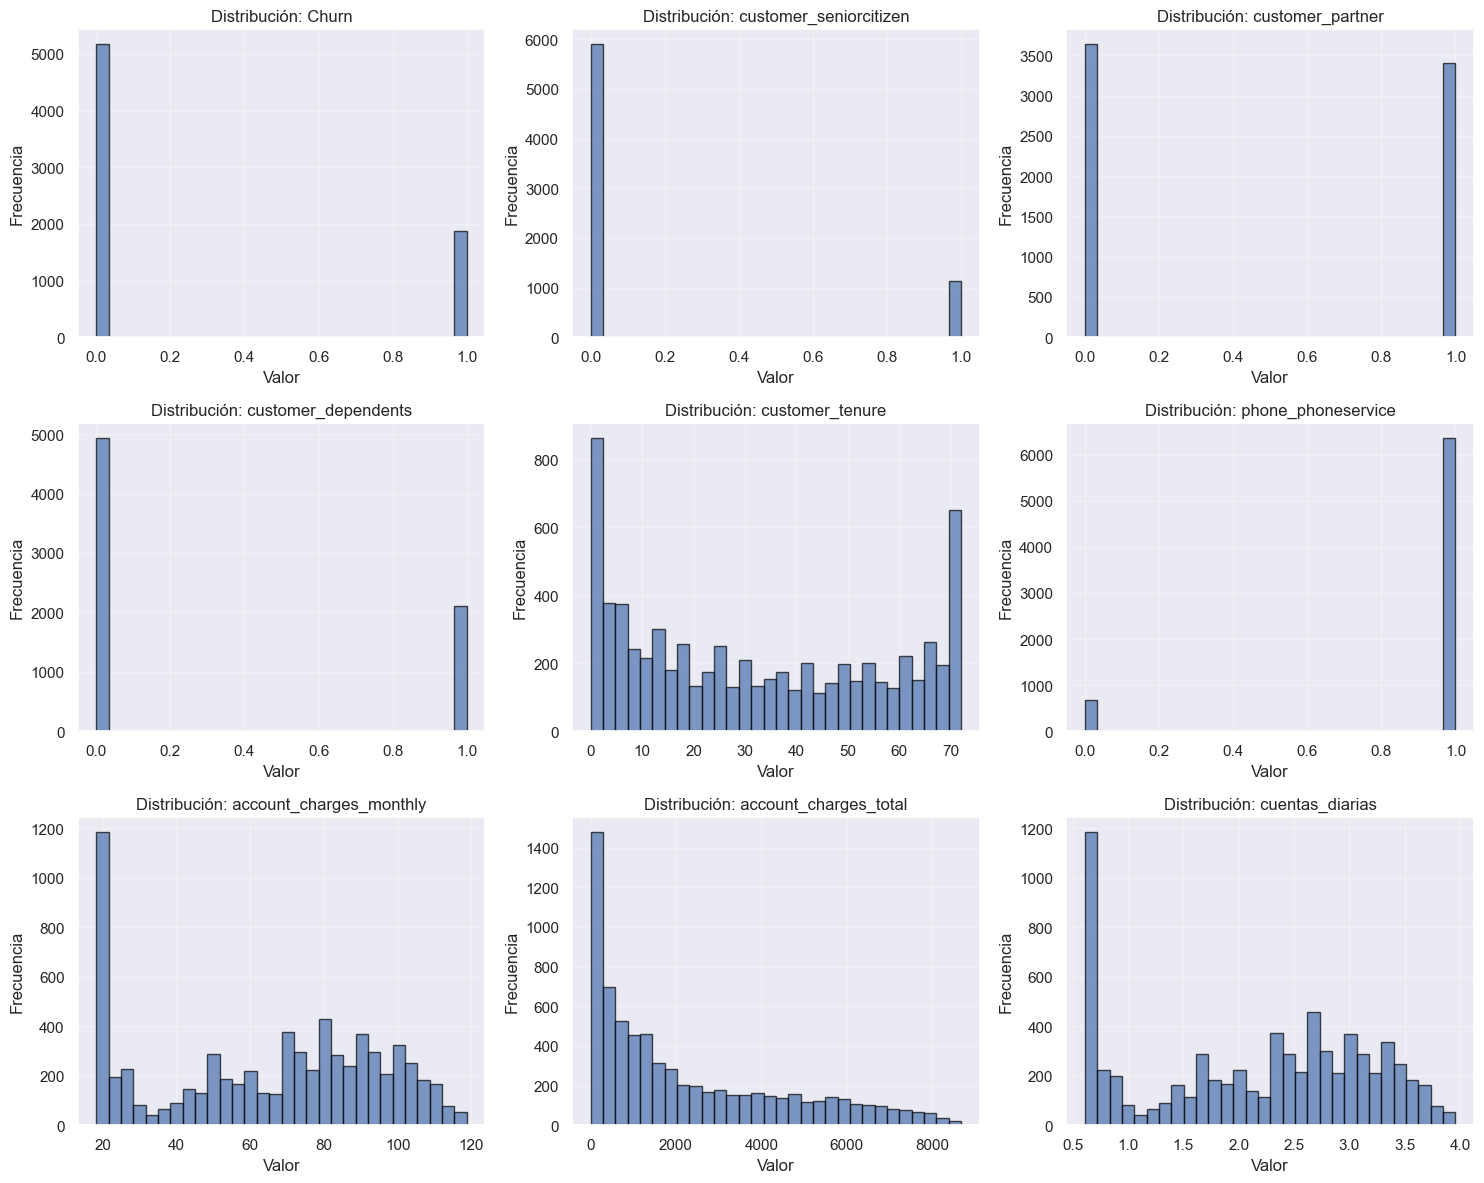

In [ ]:
def graficar_distribucion_general(df: pd.DataFrame, figsize: tuple = (15, 12)) -> tuple:
    """
    Crea histogramas de distribución para todas las variables numéricas del DataFrame.
    
    Genera una matriz de subgráficos mostrando la distribución de frecuencias de cada
    variable numérica, permitiendo detectar patrones, sesgos y outliers.
    
    Argumentos:
        df (pd.DataFrame): DataFrame de entrada.
        figsize (tuple): Tamaño de la figura en pulgadas (ancho, alto). Por defecto (15, 12).
    
    Retorna:
        tuple: (fig, axes) donde fig es la Figure y axes es array de Axes objects.
    """
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    
    n_cols = min(3, len(numeric_cols))
    n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = axes.flatten()
    
    for idx, col in enumerate(numeric_cols):
        axes[idx].hist(df[col], bins=30, edgecolor='black', alpha=0.7)
        axes[idx].set_title(f'Distribución: {col}')
        axes[idx].set_xlabel('Valor')
        axes[idx].set_ylabel('Frecuencia')
        axes[idx].grid(True, alpha=0.3)
    
    # ocultar ejes no usados
    for idx in range(len(numeric_cols), len(axes)):
        axes[idx].set_visible(False)
    
    plt.tight_layout()
    return fig, axes

fig_distribucion, axes_distribucion = graficar_distribucion_general(transformed_df)
plt.show()
plt.close()

**Fundamentación del gráfico:** Se utilizan histogramas porque permiten visualizar la distribución de frecuencias de variables numéricas continuas, identificando patrones como asimetría, concentración de valores y presencia de outliers.

**Interpretación:** Los histogramas muestran que las variables numéricas del dataset presentan distribuciones asimétricas sesgadas a la derecha, con concentración de valores bajos y colas largas. Las variables `account_charges_monthly`, `account_charges_total` y `cuentas_diarias` evidencian heterogeneidad en los niveles de gasto de los clientes.

### Estadísticas Descriptivas

Media, mediana, desviación estándar y cuartiles.

In [512]:
stats = df.describe().T
stats

,count,mean,std,min,25%,50%,75%,max
Churn,7043.0,0.265370,0.441561,0.00,0.00,0.00,1.00,1.00
customer_seniorcitizen,7043.0,0.162147,0.368612,0.00,0.00,0.00,0.00,1.00
customer_partner,7043.0,0.483033,0.499748,0.00,0.00,0.00,1.00,1.00
customer_dependents,7043.0,0.299588,0.458110,0.00,0.00,0.00,1.00,1.00
customer_tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
phone_phoneservice,7043.0,0.903166,0.295752,0.00,1.00,1.00,1.00,1.00
account_charges_monthly,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
account_charges_total,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80
cuentas_diarias,7043.0,2.158675,1.003088,0.61,1.18,2.34,2.99,3.96


Las diferencias entre media y mediana indican distribuciones asimétricas. En columnas donde la media es mayor que la mediana, significa que hay valores altos que tiran la media hacia arriba.

Esto es crucial para ML, ya que algunos algoritmos son sensibles a _outliers_, por lo que la mediana puede ser más robusta.

#### Skewness (Asimetría)

Es una medida de la **asimetría** de la distribución de probabilidad de una variable aleatoria de valor real en torno a su media. Mide hacia dónde se inclina la "joroba" de los datos.

- **0:** Simétrica (Normal).
- **Positiva (>0):** Cola larga a la derecha (la mayoría de los datos son pequeños).
- **Negativa (<0):** Cola larga a la izquierda (la mayoría de los datos son altos).

Es crucial porque muchos algoritmos de Machine Learning (como la regresión lineal) asumen que los datos siguen una distribución normal; si están muy sesgados, el modelo puede perder precisión.

> Nota: En variables binarias (0 y 1), la asimetría nos dice qué tan desbalanceadas están las clases.

In [513]:
stats['skewness'] = df.select_dtypes(include=[np.number]).skew()
stats['skewness']

Churn                      1.063031
customer_seniorcitizen     1.833633
customer_partner           0.067922
customer_dependents        0.875199
customer_tenure            0.239540
phone_phoneservice        -2.727153
account_charges_monthly   -0.220524
account_charges_total      0.963235
cuentas_diarias           -0.220524
Name: skewness, dtype: float64

#### Kurtosis (Curtosis)

Es una medida de si las colas de la distribución son pesadas (>0) o ligeras (<0) en comparación con una distribución normal. Indica la presencia de _outliers_ (valores extremos) en comparación con una distribución normal. Mide qué tan "picuda" o "plana" es la distribución comparada con una normal.

- **Negativa:** Plana (Platicúrtica). Los datos están muy dispersos.
- **Positiva:** Picuda (Leptocúrtica). Los datos se concentran mucho en el centro con colas pesadas.

Es una medida importante, ya que nos ayuda a evaluar la forma de la distribución de los datos más allá de medidas simples como la media y la varianza.

In [514]:
stats['kurtosis'] = df.select_dtypes(include=[np.number]).kurtosis()
stats['kurtosis']

Churn                     -0.870211
customer_seniorcitizen     1.362596
customer_partner          -1.995953
customer_dependents       -1.234378
customer_tenure           -1.387372
phone_phoneservice         5.438908
account_charges_monthly   -1.257260
account_charges_total     -0.228580
cuentas_diarias           -1.257155
Name: kurtosis, dtype: float64

#### Coeficiente de Variación

Es una medida de qué tan grande es la desviación estándar en comparación con la media. Mide qué tan dispersos están los datos en relación con su promedio ($\sigma / \mu$). Un CV alto indica mucha variabilidad (datos poco homogéneos).

Tiene la finalidad de permitirnos comparar la **variabilidad** de dos variables que tienen unidades o escalas diferentes.

In [515]:
numericas = df.select_dtypes(include=[np.number])
stats['cv'] = (numericas.std() / numericas.mean() * 100).round(2)
stats['cv']

Churn                      166.39
customer_seniorcitizen     227.33
customer_partner           103.46
customer_dependents        152.91
customer_tenure             75.87
phone_phoneservice          32.75
account_charges_monthly     46.46
account_charges_total       99.43
cuentas_diarias             46.47
Name: cv, dtype: float64

In [516]:
stats[['skewness', 'kurtosis', 'cv']]

,skewness,kurtosis,cv
Churn,1.063031,-0.870211,166.39
customer_seniorcitizen,1.833633,1.362596,227.33
customer_partner,0.067922,-1.995953,103.46
customer_dependents,0.875199,-1.234378,152.91
customer_tenure,0.239540,-1.387372,75.87
phone_phoneservice,-2.727153,5.438908,32.75
account_charges_monthly,-0.220524,-1.257260,46.46
account_charges_total,0.963235,-0.228580,99.43
cuentas_diarias,-0.220524,-1.257155,46.47


### Conclusiones de las Estadísticas Descriptivas

#### 1. Desbalance

El dataset tiene desbalance en el target (`Churn`), lo que complicará la predicción de los que se van. La mayoría de los clientes se quedan (skew > 1), por lo que el desbalance es moderado/alto. La clase minoritaria (los que hacen churn) es pequeña respecto al total (CV 166%), lo que genera mucha variabilidad relativa.

#### 2. Sesgos Demográficos

La variable más desbalanceada demográficamente es `SeniorCitizen`, y nos dice que los datos representan mayoritariamente a gente joven (skew > 1 y CV 227%). El modelo podría comportarse mal prediciendo churn en ancianos por falta de datos.

#### 3. Comportamiento del Cliente

La variable `tenure` a primera vista parece simétrica (skew = 0), pero la distribución es plana (kurtosis < 0). Por lo tanto, se tienes un grupo grande de clientes nuevos (tenure bajo) y un grupo grande de clientes muy fieles (tenure alto), con gente distribuida en el medio. O se van rápido o se quedan por años.

## Distribución de la Variable `Churn`

Esta sección consiste en comprender la distribución de la variable `Churn` (evasión) entre los clientes de **TelecomX**. Se analiza la proporción de clientes que permanecieron contra los que se dieron de baja mediante diferentes tipos de gráficos.

### Análisis Estadístico de `Churn`

#### Conteos y Porcentajes

In [517]:
# Conteos absolutos
def calcular_conteo_churn(df: pd.DataFrame, verbose: bool = False) -> pd.Series:
    """
    Calcula el conteo absoluto de clientes con y sin churn.
    
    Cuenta los registros para cada categoría de churn (0 = sin churn, 1 = con churn)
    y los ordena según el índice. Proporciona la cantidad total de clientes en cada grupo.
    
    Argumentos:
        df (pd.DataFrame): DataFrame con columna \"Churn\".
        verbose (bool): Si True, imprime los conteos. Por defecto False.
    
    Retorna:
        pd.Series: Serie con conteos de churn indexados por valor (0, 1).
    """
    churn_counts = df['Churn'].value_counts().sort_index()
    if verbose:
        print(f"Conteo de Churn: {churn_counts}")
    return churn_counts

churn_counts = calcular_conteo_churn(df)

In [518]:
print(f"Total de Clientes: {len(df):,}")
print(f"✅ Clientes sin Churn: {churn_counts.get(0, 0):,}")
print(f"❌ Clientes con Churn: {churn_counts.get(1, 0):,}")

Total de Clientes: 7,043
✅ Clientes sin Churn: 5,174
❌ Clientes con Churn: 1,869


In [519]:
# Porcentajes
def calcular_porcentaje_churn(df: pd.DataFrame, verbose: bool = False) -> pd.Series:
    """
    Calcula los porcentajes de clientes con y sin churn respecto al total.
    
    Normaliza los conteos de churn para obtener proporciones porcentuales,
    permitiendo comparaciones relativas entre grupos.
    
    Argumentos:
        df (pd.DataFrame): DataFrame con columna \"Churn\".
        verbose (bool): Si True, imprime los porcentajes. Por defecto False.
    
    Retorna:
        pd.Series: Serie con porcentajes de churn (0-100) indexados por valor (0, 1).
    """
    churn_pct = df['Churn'].value_counts(normalize=True).sort_index() * 100
    if verbose:
        print(f"Porcentaje de Churn:\n{churn_pct}")
    return churn_pct

churn_pct = calcular_porcentaje_churn(df)

In [520]:
print(f"✅ Clientes sin Churn: {churn_pct.get(0, 0):.2f}%")
print(f"❌ Clientes con Churn: {churn_pct.get(1, 0):.2f}%")

✅ Clientes sin Churn: 73.46%
❌ Clientes con Churn: 26.54%


#### Churn Rate y Retention Rate

_Churn Rate:_ Mide el porcentaje de clientes perdidos en un periodo, reflejando insatisfacción o fallas en la retención.

$$\text{Churn Rate} =\frac{\text{Clientes Perdidos en el Periodo}}{\text{Clientes al Inicio del Periodo}} \times 100 $$

> Periodo considerado: Total de clientes del dataset

_Retention Rate:_ Mide el porcentaje de clientes que permanecen, indicando lealtad y estabilidad del negocio.

$$\text{Retention Rate} =\frac{\text{Clientes al Final} - \text{Nuevos Clientes}}{\text{Clientes al Inicio del Periodo}} \times 100 $$

In [521]:
def calcular_churn_rate(df: pd.DataFrame, verbose: bool = False) -> float:
    """
    Calcula la tasa de churn (porcentaje de clientes perdidos) del DataFrame.
    
    Define la métrica fundamental de negocio: el porcentaje de clientes que abandonaron
    el servicio respecto al total de clientes.
    
    Argumentos:
        df (pd.DataFrame): DataFrame con columna \"Churn\".
        verbose (bool): Si True, imprime la tasa calculada. Por defecto False.
    
    Retorna:
        float: Tasa de churn como porcentaje (0-100).
    """
    churn_rate = (churn_counts.get(1, 0) / len(df)) * 100
    if verbose:
        print(f"Tasa de Churn (Churn Rate): {churn_rate:.2f}%")
    return churn_rate

churn_rate = calcular_churn_rate(df)

In [522]:
print(f"Tasa de Churn (Churn Rate): {churn_rate:.2f}%")

Tasa de Churn (Churn Rate): 26.54%


In [523]:
def calcular_retention_rate(df: pd.DataFrame, verbose: bool = False) -> float:
    """
    Calcula la tasa de retención (porcentaje de clientes conservados) del DataFrame.
    
    Define el complemento de la tasa de churn: el porcentaje de clientes que se mantienen
    activos, indicador positivo de salud del negocio.
    
    Argumentos:
        df (pd.DataFrame): DataFrame con columna \"Churn\".
        verbose (bool): Si True, imprime la tasa calculada. Por defecto False.
    
    Retorna:
        float: Tasa de retención como porcentaje (0-100), equivale a 100 - churn_rate.
    """
    retention_rate = (churn_counts.get(0, 0) / len(df)) * 100
    if verbose:
        print(f"Tasa de Retención (Retention Rate): {retention_rate:.2f}%")
    return retention_rate

retention_rate = calcular_retention_rate(df)

In [524]:
print(f"Tasa de Retención (Retention Rate): {retention_rate:.2f}%")

Tasa de Retención (Retention Rate): 73.46%


#### Gráfico de Pastel y de Dona

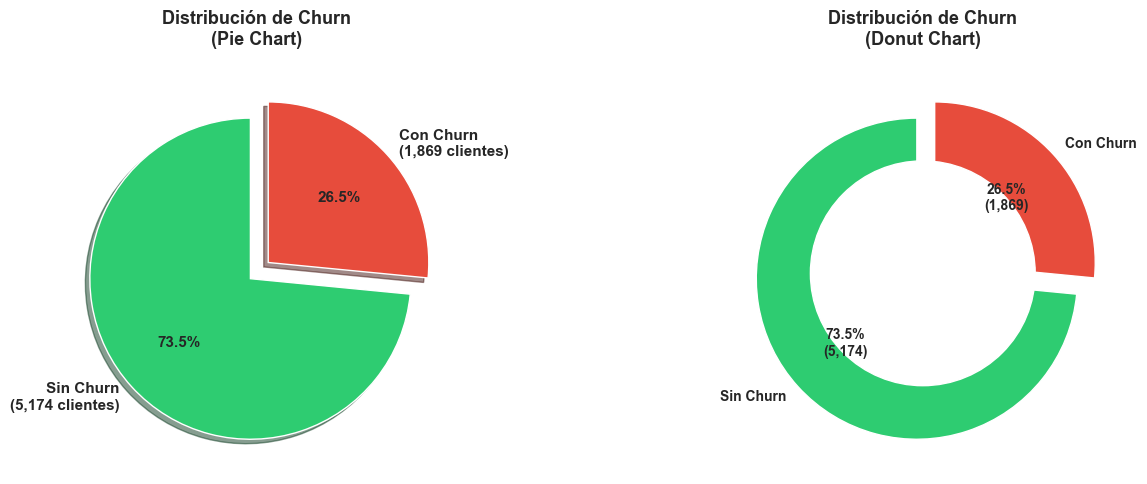

In [ ]:
def graficar_churn_pie_donut(df: pd.DataFrame, figsize: tuple = (14, 5)) -> tuple:
    """
    Crea gráficos de pastel y dona para visualizar la distribución de churn.
    
    Genera dos representaciones complementarias de la proporción de clientes con churn
    versus sin churn. El pastel es tradicional, mientras que el dona permite añadir
    información adicional en el centro.
    
    Argumentos:
        df (pd.DataFrame): DataFrame con columna \"Churn\".
        figsize (tuple): Tamaño de la figura en pulgadas (ancho, alto). Por defecto (14, 5).
    
    Retorna:
        tuple: (fig, axes) donde fig es el objeto Figure y axes contiene los dos Axes.
               axes[0] es el pastel, axes[1] es la dona.
    """
    fig, axes = plt.subplots(1, 2, figsize=figsize)

    churn_counts = calcular_conteo_churn(df)
    labels = ['Sin Churn', 'Con Churn']
    colors = ['#2ecc71', '#e74c3c']
    explode = (0.05, 0.1)
    
    # Pie Chart
    wedges, texts, autotexts = axes[0].pie(
        churn_counts, 
        labels=labels, 
        colors=colors, 
        autopct='%1.1f%%',
        startangle=90,
        explode=explode,
        shadow=True,
        textprops={'fontsize': 11, 'fontweight': 'bold'}
    )
    axes[0].set_title(
        'Distribución de Churn\n(Pie Chart)', 
        fontsize=13,
        fontweight='bold',
        pad=20
    )

    # Añadir conteos absolutos en la leyenda
    for i, (label, count) in enumerate(zip(labels, churn_counts)):
        texts[i].set_text(f'{label}\n({count:,} clientes)')

    # Donut Chart
    churn_pct = (churn_counts / len(df) * 100).values
    center_circle = plt.Circle((0, 0), 0.70, fc='white')
    axes[1].pie(churn_counts,
                labels=labels,
                colors=colors,
                autopct=lambda pct: f'{pct:.1f}%\n({int(pct/100.*sum(churn_counts)):,})',
                startangle=90,
                textprops={'fontsize': 10, 'fontweight': 'bold'},
                explode=explode)

    axes[1].add_artist(center_circle)
    axes[1].set_title(
        'Distribución de Churn\n(Donut Chart)', 
        fontsize=13,
        fontweight='bold',
        pad=20
    )

    plt.tight_layout()
    return fig, axes

fig_pie_donut, axes_pie_donut = graficar_churn_pie_donut(df)
plt.show()
plt.close()

**Fundamentación del gráfico:** Los gráficos de pie y donut son ideales para mostrar proporciones y distribuciones porcentuales de categorías mutuamente excluyentes, facilitando la comparación visual de la importancia relativa de cada segmento.

**Interpretación:** El gráfico muestra la distribución de churn vs retención: 73.46% de clientes retenidos (5,174) frente a 26.54% con churn (1,869). Esta tasa de churn del 26.54% representa un desafío significativo que justifica las estrategias de retención propuestas.

#### Visualización de Gauges (P/ Tasas de Churn y Retención)

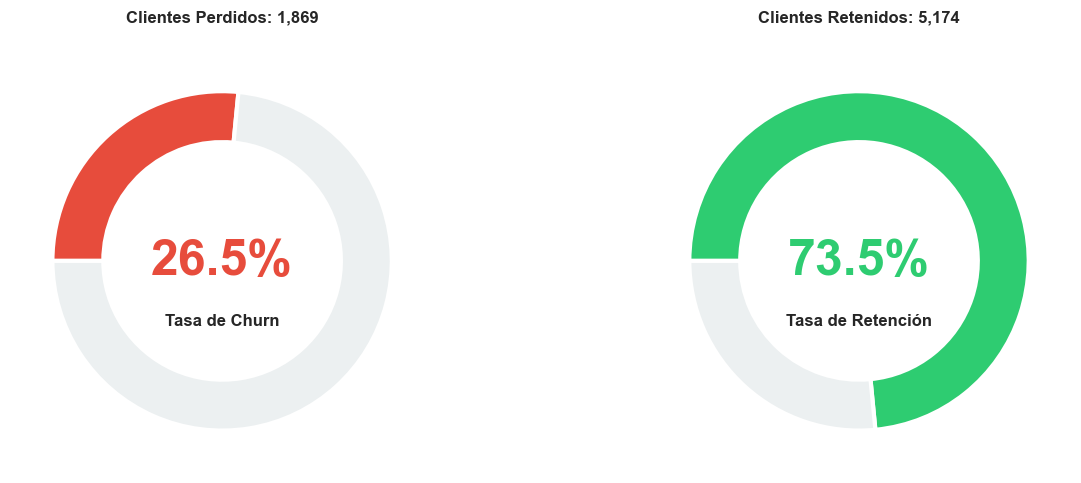

In [ ]:
def graficar_churn_gauges(df: pd.DataFrame, churn_rate: float, retention_rate: float, figsize: tuple = (14, 5)) -> tuple:
        """
        Crea gráficos tipo Gauge para visualizar tasas de Churn y Retención.
        """
        fig, axes = plt.subplots(1, 2, figsize=figsize)

        # valores necesarios
        churn_count = calcular_conteo_churn(df).get(1, 0)
        retention_count = calcular_conteo_churn(df).get(0, 0)
        churn_rate = calcular_churn_rate(df)
        retention_rate = calcular_retention_rate(df)

        # Gauge 1: Tasa de Churn
        ax1 = axes[0]
        gauge_values_ch = [churn_rate, 100 - churn_rate]
        colors_ch = ['#e74c3c', '#ecf0f1']
        ax1.pie(gauge_values_ch,
                colors=colors_ch,
                startangle=180,
                counterclock=False,
                wedgeprops=dict(
                width=0.3, 
                edgecolor='white', 
                linewidth=3
                )
        )
        # texto del centro
        ax1.text(0, 0, f'{churn_rate:.1f}%', 
                ha='center', va='center', 
                fontsize=36, fontweight='bold', color='#e74c3c'
        )
        # etiqueta debajo
        ax1.text(0, -0.35, 'Tasa de Churn', 
                ha='center', va='center', 
                fontsize=12, fontweight='bold'
        )
        ax1.set_title(f'Clientes Perdidos: {churn_count:,}', 
                fontsize=12, fontweight='bold', pad=20)

        # Gauge 2: Tasa de Retención
        ax2 = axes[1]
        gauge_values_ret = [retention_rate, 100 - retention_rate]
        colors_ret = ['#2ecc71', '#ecf0f1']
        ax2.pie(gauge_values_ret,
                colors=colors_ret,
                startangle=180,
                counterclock=False,
                wedgeprops=dict(
                width=0.3, 
                edgecolor='white', 
                linewidth=3
                )
        )

        ax2.text(0, 0, f'{retention_rate:.1f}%', 
                ha='center', va='center', 
                fontsize=36, fontweight='bold', color='#2ecc71')

        ax2.text(0, -0.35, 'Tasa de Retención', 
                ha='center', va='center', 
                fontsize=12, fontweight='bold')

        ax2.set_title(f'Clientes Retenidos: {retention_count:,}', 
                fontsize=12, fontweight='bold', pad=20)

        plt.tight_layout()
        return fig, axes

fig_gauges, axes_gauges = graficar_churn_gauges(df, churn_rate, retention_rate)
plt.show()
plt.close()

**Fundamentación del gráfico:** Los gráficos de gauge (medidor) son efectivos para mostrar métricas individuales dentro de un rango definido, proporcionando una visualización intuitiva tipo dashboard que facilita la comprensión de KPIs críticos.

**Interpretación:** Los medidores presentan las métricas principales del negocio: 26.54% de churn rate y 73.46% de retention rate. El código de color (rojo para churn, verde para retención) refuerza visualmente el mensaje de que aproximadamente 1 de cada 4 clientes abandona el servicio.

### Análisis de Impacto Económico del Churn

In [527]:
def calcular_impacto_economico_churn(df: pd.DataFrame, columna_churn: str = 'Churn', 
                                     columna_charges: str = 'account_charges_monthly',
                                     columna_segmento: str = 'account_contract') -> pd.DataFrame:
    """
    Calcula el impacto económico del churn a nivel global y por segmento.
    
    Estima pérdidas mensuales y anuales generadas por clientes que hacen churn,
    mostrando desglose por segmento y escenarios de recuperación potencial.
    
    Argumentos:
        df (pd.DataFrame): DataFrame con datos de clientes.
        columna_churn (str): Columna de churn (1=churn, 0=retenido). Por defecto 'Churn'.
        columna_charges (str): Columna de cargos mensuales. Por defecto 'account_charges_monthly'.
        columna_segmento (str): Columna para segmentar análisis. Por defecto 'account_contract'.
    
    Retorna:
        pd.DataFrame: Tabla con [Ingreso_Mensual_Perdido, Ticket_Promedio, 
                     Clientes_Perdidos, Ingreso_Anual_Perdido] por segmento.
        Imprime análisis integrado: pérdidas totales, por segmento y ROI de recuperación.
    """
    # análisis global
    total_churn = df[df[columna_churn] == 1]
    ingreso_mensual_perdido = total_churn[columna_charges].sum()
    ingreso_anual_perdido = ingreso_mensual_perdido * 12
    
    # análisis por segmento
    impacto_por_segmento = df[df[columna_churn] == 1].groupby(columna_segmento).agg({
        columna_charges: ['sum', 'mean', 'count']
    }).round(2)
    
    impacto_por_segmento.columns = ['Ingreso_Mensual_Perdido', 'Ticket_Promedio', 'Clientes_Perdidos']
    impacto_por_segmento['Ingreso_Anual_Perdido'] = impacto_por_segmento['Ingreso_Mensual_Perdido'] * 12
    impacto_por_segmento = impacto_por_segmento.round(2)
    
    # ordenar por impacto
    impacto_por_segmento = impacto_por_segmento.sort_values('Ingreso_Mensual_Perdido', ascending=False)
    
    print("=" * 80)
    print("IMPACTO ECONÓMICO DEL CHURN")
    print("=" * 80)
    print(f"\nPérdida Mensual Total: ${ingreso_mensual_perdido:,.2f}")
    print(f"Pérdida Anual Total: ${ingreso_anual_perdido:,.2f}")
    print(f"Clientes con Churn: {len(total_churn):,}")
    print(f"Ticket Promedio Mensual (Churn): ${total_churn[columna_charges].mean():.2f}")
    
    print("\n" + "=" * 80)
    print(f"IMPACTO POR SEGMENTO: {columna_segmento.upper()}")
    print("=" * 80)
    print(impacto_por_segmento.to_string())
    
    # calcular ROI potencial de reducción de churn
    print("\n" + "=" * 80)
    print("POTENCIAL DE RECUPERACIÓN")
    print("=" * 80)
    
    escenarios = [0.05, 0.10, 0.15, 0.20]
    for reduccion in escenarios:
        recuperacion_mensual = ingreso_mensual_perdido * reduccion
        recuperacion_anual = recuperacion_mensual * 12
        clientes_recuperados = int(len(total_churn) * reduccion)
        print(f"Reducción {reduccion*100:.0f}% Churn:")
        print(f"  Clientes recuperados: {clientes_recuperados:,}")
        print(f"  Recuperación mensual: ${recuperacion_mensual:,.2f}")
        print(f"  Recuperación anual: ${recuperacion_anual:,.2f}")
        print()
    
    return impacto_por_segmento

impacto_economico = calcular_impacto_economico_churn(df)

IMPACTO ECONÓMICO DEL CHURN

Pérdida Mensual Total: $139,130.85
Pérdida Anual Total: $1,669,570.20
Clientes con Churn: 1,869
Ticket Promedio Mensual (Churn): $74.44

IMPACTO POR SEGMENTO: ACCOUNT_CONTRACT
                  Ingreso_Mensual_Perdido  Ticket_Promedio  Clientes_Perdidos  Ingreso_Anual_Perdido
account_contract                                                                                    
Month-to-month                  120847.10            73.02               1655              1450165.2
One year                         14118.45            85.05                166               169421.4
Two year                          4165.30            86.78                 48                49983.6

POTENCIAL DE RECUPERACIÓN
Reducción 5% Churn:
  Clientes recuperados: 93
  Recuperación mensual: $6,956.54
  Recuperación anual: $83,478.51

Reducción 10% Churn:
  Clientes recuperados: 186
  Recuperación mensual: $13,913.09
  Recuperación anual: $166,957.02

Reducción 15% Churn:
  Client

In [528]:
impacto_economico_internet = calcular_impacto_economico_churn(df, columna_segmento='internet_internetservice')

IMPACTO ECONÓMICO DEL CHURN

Pérdida Mensual Total: $139,130.85
Pérdida Anual Total: $1,669,570.20
Clientes con Churn: 1,869
Ticket Promedio Mensual (Churn): $74.44

IMPACTO POR SEGMENTO: INTERNET_INTERNETSERVICE
                          Ingreso_Mensual_Perdido  Ticket_Promedio  Clientes_Perdidos  Ingreso_Anual_Perdido
internet_internetservice                                                                                    
Fiber optic                             114300.05            88.13               1297              1371600.6
DSL                                      22529.20            49.08                459               270350.4
No                                        2301.60            20.37                113                27619.2

POTENCIAL DE RECUPERACIÓN
Reducción 5% Churn:
  Clientes recuperados: 93
  Recuperación mensual: $6,956.54
  Recuperación anual: $83,478.51

Reducción 10% Churn:
  Clientes recuperados: 186
  Recuperación mensual: $13,913.09
  Recuperación a

In [529]:
impacto_economico_payment_method = calcular_impacto_economico_churn(df, columna_segmento='account_paymentmethod')

IMPACTO ECONÓMICO DEL CHURN

Pérdida Mensual Total: $139,130.85
Pérdida Anual Total: $1,669,570.20
Clientes con Churn: 1,869
Ticket Promedio Mensual (Churn): $74.44

IMPACTO POR SEGMENTO: ACCOUNT_PAYMENTMETHOD
                           Ingreso_Mensual_Perdido  Ticket_Promedio  Clientes_Perdidos  Ingreso_Anual_Perdido
account_paymentmethod                                                                                        
Electronic check                          84288.75            78.70               1071              1011465.0
Bank transfer (automatic)                 20091.90            77.88                258               241102.8
Credit card (automatic)                   17946.60            77.36                232               215359.2
Mailed check                              16803.60            54.56                308               201643.2

POTENCIAL DE RECUPERACIÓN
Reducción 5% Churn:
  Clientes recuperados: 93
  Recuperación mensual: $6,956.54
  Recuperación anual: 

### Análisis Temporal del Churn

In [530]:
def analisis_temporal_churn(df: pd.DataFrame, columna_tenure: str = 'customer_tenure',
                                columna_churn: str = 'Churn', bins: list = None) -> pd.DataFrame:
    """
    Analiza la distribución temporal del churn según la antigüedad del cliente.
    
    Segmenta clientes por rango de meses de antigüedad (tenure) y calcula tasa de churn
    para cada segmento temporal, identificando ventanas de mayor vulnerabilidad.
    
    Argumentos:
        df (pd.DataFrame): DataFrame con datos de clientes.
        columna_tenure (str): Nombre de columna con antigüedad en meses. Por defecto 'customer_tenure'.
        columna_churn (str): Nombre de columna de churn (1=churn, 0=retenido). Por defecto 'Churn'.
        bins (list): Rangos de bins para segmentación temporal. Si es None, usa predefinidos.
    
    Retorna:
        pd.DataFrame: Tabla con columnas [Clientes_Churn, Total_Clientes, Tasa_Churn,
                     Tasa_Churn_%, Clientes_Retenidos] por segmento temporal.
        Imprime análisis detallado incluyendo identificación de ventana crítica.
    """
    if bins is None:
        bins = [0, 6, 12, 24, 36, 48, 73]
    
    labels = []
    for i in range(len(bins)-1):
        labels.append(f"{bins[i]}-{bins[i+1]} meses")
    
    # crear segmentos de tenure
    df_analisis = df.copy()
    df_analisis['tenure_segment'] = pd.cut(df_analisis[columna_tenure], 
                                            bins=bins, labels=labels, include_lowest=True)
    
    # calcular churn por segmento
    churn_por_tenure = df_analisis.groupby('tenure_segment', observed=True).agg({
        columna_churn: ['sum', 'count', 'mean']
    }).round(4)
    
    churn_por_tenure.columns = ['Clientes_Churn', 'Total_Clientes', 'Tasa_Churn']
    churn_por_tenure['Tasa_Churn_%'] = churn_por_tenure['Tasa_Churn'] * 100
    churn_por_tenure['Clientes_Retenidos'] = churn_por_tenure['Total_Clientes'] - churn_por_tenure['Clientes_Churn']
    
    # convertir a enteros donde corresponda
    churn_por_tenure['Clientes_Churn'] = churn_por_tenure['Clientes_Churn'].astype(int)
    churn_por_tenure['Total_Clientes'] = churn_por_tenure['Total_Clientes'].astype(int)
    churn_por_tenure['Clientes_Retenidos'] = churn_por_tenure['Clientes_Retenidos'].astype(int)
    churn_por_tenure['Tasa_Churn_%'] = churn_por_tenure['Tasa_Churn_%'].round(2)
    
    print("=" * 80)
    print("ANÁLISIS TEMPORAL DEL CHURN")
    print("=" * 80)
    print(churn_por_tenure[['Total_Clientes', 'Clientes_Churn', 'Tasa_Churn_%']].to_string())
    
    # identificar ventana crítica
    max_churn_idx = churn_por_tenure['Tasa_Churn_%'].idxmax()
    tasa_global = df[columna_churn].mean() * 100
    
    print(f"\nVENTANA CRÍTICA: {max_churn_idx}")
    print(f"- Tasa de Churn: {churn_por_tenure.loc[max_churn_idx, 'Tasa_Churn_%']:.2f}%")
    print(f"- Tasa Global: {tasa_global:.2f}%")
    print(f"- Diferencia: {churn_por_tenure.loc[max_churn_idx, 'Tasa_Churn_%'] - tasa_global:.2f}%")
    
    print("\n" + "=" * 80)
    
    return churn_por_tenure

churn_temporal = analisis_temporal_churn(df)

ANÁLISIS TEMPORAL DEL CHURN
                Total_Clientes  Clientes_Churn  Tasa_Churn_%
tenure_segment                                              
0-6 meses                 1481             784         52.94
6-12 meses                 705             253         35.89
12-24 meses               1024             294         28.71
24-36 meses                832             180         21.63
36-48 meses                762             145         19.03
48-73 meses               2239             213          9.51

VENTANA CRÍTICA: 0-6 meses
- Tasa de Churn: 52.94%
- Tasa Global: 26.54%
- Diferencia: 26.40%



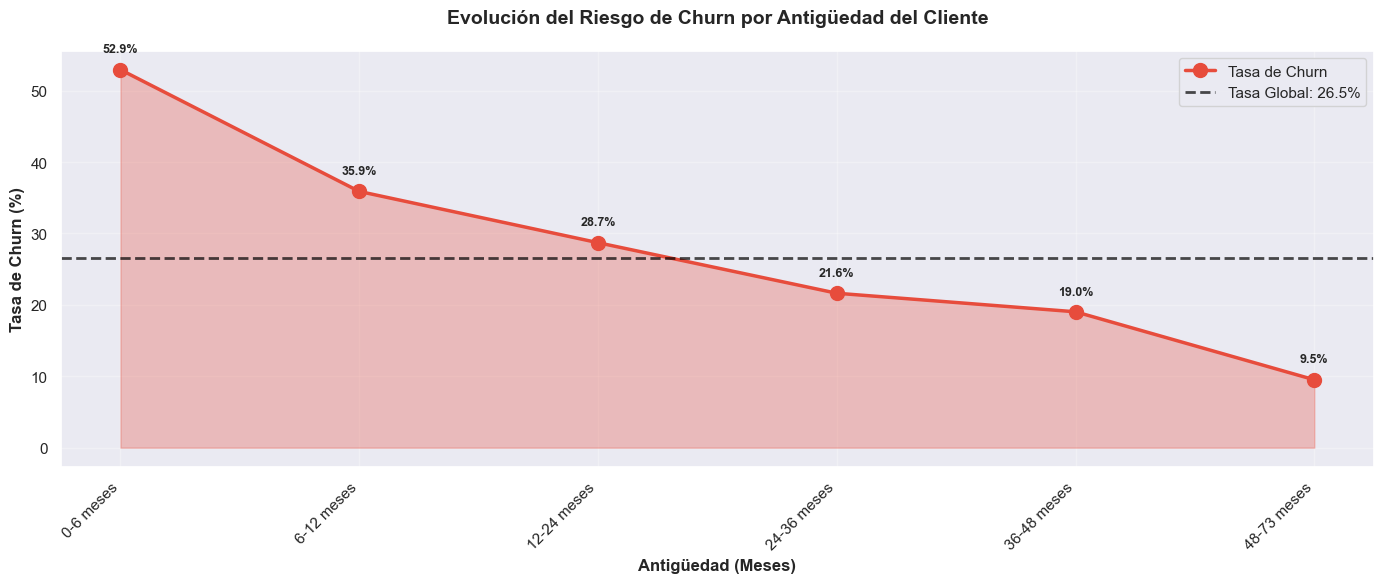

In [ ]:
def graficar_evolucion_riesgo_temporal(df_temporal: pd.DataFrame, tasa_global: float, 
                                       figsize: tuple = (14, 6)) -> tuple:
    """
    Visualiza la evolución del riesgo de churn a lo largo del tiempo de cliente.
    
    Crea gráfico de línea con área sombreada mostrando tasa de churn por antigüedad,
    con línea de referencia de tasa global para contextualizar ventanas de riesgo.
    
    Argumentos:
        df_temporal (pd.DataFrame): DataFrame resultado de analisis_temporal_churn.
        tasa_global (float): Tasa de churn global para línea de referencia.
        figsize (tuple): Tamaño de figura en pulgadas (ancho, alto). Por defecto (14, 6).
    
    Retorna:
        tuple: (fig, ax) objetos de matplotlib Figure y Axes.
    """
    fig, ax = plt.subplots(figsize=figsize)
    
    # gráfico de línea con área
    x_pos = range(len(df_temporal))
    ax.plot(x_pos, df_temporal['Tasa_Churn_%'], 
            marker='o', linewidth=2.5, markersize=10, color='#e74c3c', label='Tasa de Churn')
    ax.fill_between(x_pos, df_temporal['Tasa_Churn_%'], 
                     alpha=0.3, color='#e74c3c')
    
    # línea de referencia global
    ax.axhline(tasa_global, color='black', linestyle='--', linewidth=2, 
               label=f'Tasa Global: {tasa_global:.1f}%', alpha=0.7)
    
    # personalización
    ax.set_xticks(x_pos)
    ax.set_xticklabels(df_temporal.index, rotation=45, ha='right')
    ax.set_title('Evolución del Riesgo de Churn por Antigüedad del Cliente', 
                 fontsize=14, fontweight='bold', pad=20)
    ax.set_xlabel('Antigüedad (Meses)', fontsize=12, fontweight='bold')
    ax.set_ylabel('Tasa de Churn (%)', fontsize=12, fontweight='bold')
    ax.legend(fontsize=11)
    ax.grid(alpha=0.3)
    
    # añadir valores en los puntos
    for i, val in enumerate(df_temporal['Tasa_Churn_%']):
        ax.text(i, val + 2, f'{val:.1f}%', ha='center', va='bottom', 
                fontsize=9, fontweight='bold')
    
    plt.tight_layout()
    return fig, ax

fig_temporal, ax_temporal = graficar_evolucion_riesgo_temporal(churn_temporal, churn_rate)
plt.show()
plt.close()

**Fundamentación del gráfico:** El gráfico de línea con área sombreada es adecuado para visualizar tendencias temporales, permitiendo observar la evolución de la tasa de churn a lo largo de la antigüedad del cliente y destacar períodos de mayor vulnerabilidad.

**Interpretación:** El gráfico muestra la evolución temporal del riesgo de churn: clientes nuevos (0-6 meses) presentan 52.9% de churn (el doble de la tasa global), el riesgo disminuye progresivamente con la antigüedad, y después de 24 meses el churn cae a 15-20%, confirmando que la retención en los primeros meses es crítica.

## Análisis de `Churn` por Variables Categóricas

El objetivo es identificar patrones de churn según perfiles de clientes basados en variables categóricas clave. Este análisis revelará segmentos de alto riesgo para orientar estrategias de retención.

### Definición de Funciones

In [532]:
# recordatorio de los nombres de las variables
df.columns

Index(['customerID', 'Churn', 'customer_gender', 'customer_seniorcitizen',
       'customer_partner', 'customer_dependents', 'customer_tenure',
       'phone_phoneservice', 'phone_multiplelines', 'internet_internetservice',
       'internet_onlinesecurity', 'internet_onlinebackup',
       'internet_deviceprotection', 'internet_techsupport',
       'internet_streamingtv', 'internet_streamingmovies', 'account_contract',
       'account_paperlessbilling', 'account_paymentmethod',
       'account_charges_monthly', 'account_charges_total', 'cuentas_diarias'],
      dtype='str')

In [533]:
def calcular_tasa_churn(df: pd.DataFrame, columna: str) -> pd.DataFrame:
    """
    Calcula tasa de churn para cada categoría única en una variable específica.
    
    Crea tabla cruzada entre la columna especificada y churn, calculando tasas
    porcentuales de abandono para cada categoría de la variable.
    
    Argumentos:
        df (pd.DataFrame): DataFrame con datos de clientes.
        columna (str): Nombre de la columna categórica a analizar.
    
    Retorna:
        pd.DataFrame: Tabla con columnas [Categoria, Total_Clientes, Clientes_Churn, Tasa_Churn_%]
                     ordenada descendentemente por tasa de churn.
    """
    # Tabla cruzada
    tabla = pd.crosstab(df[columna], df['Churn'])
    
    # Calcular tasas
    tasas = pd.crosstab(df[columna], df['Churn'], normalize='index') * 100
    
    # Compilar resultados
    resultado = pd.DataFrame({
        'Categoria': tabla.index,
        'Total_Clientes': tabla.sum(axis=1).values,
        'Clientes_Churn': tabla[1].values if 1 in tabla.columns else 0,
        'Tasa_Churn_%': tasas[1].values if 1 in tasas.columns else 0
    }).sort_values('Tasa_Churn_%', ascending=False)
    
    return resultado.reset_index(drop=True)

In [534]:
variable_categorica = 'internet_internetservice'
tasa_churn_por_categoria = calcular_tasa_churn(df, variable_categorica)
print(tasa_churn_por_categoria)

     Categoria  Total_Clientes  Clientes_Churn  Tasa_Churn_%
0  Fiber optic            3096            1297     41.892765
1          DSL            2421             459     18.959108
2           No            1526             113      7.404980


In [535]:
def analizar_multiples_variables(df: pd.DataFrame, variables: list) -> dict:
    """
    Analiza churn para múltiples variables categóricas en un único paso.
    
    Itera sobre lista de variables categóricas, calculando tasas de churn para cada una.
    Proporciona vista integrada del comportamiento de churn across múltiples dimensiones.
    
    Argumentos:
        df (pd.DataFrame): DataFrame con datos de clientes.
        variables (list): Lista de nombres de columnas categóricas a analizar.
    
    Retorna:
        dict: Diccionario donde claves son nombres de variables y valores son DataFrames
              con resultado de calcular_tasa_churn para cada variable.
    """
    return {var: calcular_tasa_churn(df, var) for var in variables if var in df.columns}

In [536]:
variables_categoricas = [
    'customer_gender',
    'customer_seniorcitizen',
    'customer_partner',
    'customer_dependents'
]
resultados_churn = analizar_multiples_variables(df, variables_categoricas)
for var, resultado in resultados_churn.items():
    print(f"\nAnálisis de Churn por '{var}':")
    print(resultado)



Análisis de Churn por 'customer_gender':
  Categoria  Total_Clientes  Clientes_Churn  Tasa_Churn_%
0    Female            3488             939     26.920872
1      Male            3555             930     26.160338

Análisis de Churn por 'customer_seniorcitizen':
   Categoria  Total_Clientes  Clientes_Churn  Tasa_Churn_%
0          1            1142             476     41.681261
1          0            5901            1393     23.606168

Análisis de Churn por 'customer_partner':
   Categoria  Total_Clientes  Clientes_Churn  Tasa_Churn_%
0          0            3641            1200     32.957979
1          1            3402             669     19.664903

Análisis de Churn por 'customer_dependents':
   Categoria  Total_Clientes  Clientes_Churn  Tasa_Churn_%
0          0            4933            1543     31.279140
1          1            2110             326     15.450237


In [537]:
def identificar_segmentos_riesgo(analisis: dict, umbral_alto: float = 35.0, 
                                  umbral_bajo: float = 20.0) -> tuple:
    """
    Segmenta e identifica categorías de alto y bajo riesgo según umbrales de churn.
    
    Clasifica segmentos en función de su tasa de churn relativa a umbrales definidos,
    facilitando la priorización de intervenciones.
    
    Argumentos:
        analisis (dict): Diccionario resultado de analizar_multiples_variables.
        umbral_alto (float): Tasa de churn mínima para clasificar como \"alto riesgo\". Por defecto 35.0.
        umbral_bajo (float): Tasa de churn máxima para clasificar como \"bajo riesgo\". Por defecto 20.0.
    
    Retorna:
        tuple: (alto_riesgo_df, bajo_riesgo_df) DataFrames con segmentos clasificados,
               ordenados por tasa de churn descendente y ascendente respectivamente.
    """
    alto_riesgo = []
    bajo_riesgo = []
    
    for variable, datos in analisis.items():
        for _, fila in datos.iterrows():
            segmento = {
                'Variable': variable,
                'Categoria': fila['Categoria'],
                'Tasa_Churn': fila['Tasa_Churn_%'],
                'Total_Clientes': fila['Total_Clientes']
            }
            
            if fila['Tasa_Churn_%'] >= umbral_alto:
                alto_riesgo.append(segmento)
            elif fila['Tasa_Churn_%'] <= umbral_bajo:
                bajo_riesgo.append(segmento)
    
    return (
        pd.DataFrame(alto_riesgo).sort_values('Tasa_Churn', ascending=False),
        pd.DataFrame(bajo_riesgo).sort_values('Tasa_Churn')
    )

In [538]:
segmentos_alto_riesgo, segmentos_bajo_riesgo = identificar_segmentos_riesgo(resultados_churn)
print("\nSegmentos de Alto Riesgo:")
print(segmentos_alto_riesgo)

print("\nSegmentos de Bajo Riesgo:")
print(segmentos_bajo_riesgo)



Segmentos de Alto Riesgo:
                 Variable  Categoria  Tasa_Churn  Total_Clientes
0  customer_seniorcitizen        1.0   41.681261          1142.0

Segmentos de Bajo Riesgo:
              Variable  Categoria  Tasa_Churn  Total_Clientes
1  customer_dependents        1.0   15.450237          2110.0
0     customer_partner        1.0   19.664903          3402.0


In [539]:
def generar_resumen_ejecutivo(analisis: dict) -> pd.DataFrame:
    """
    Genera tabla resumen con métricas agregadas por variable analizada.
    
    Compila estadísticas clave (tasas máxima/mínima, diferencia, categoría de mayor riesgo)
    para cada variable, permitiendo comparación rápida del impacto relativo de cada dimensión.
    
    Argumentos:
        analisis (dict): Diccionario resultado de analizar_multiples_variables.
    
    Retorna:
        pd.DataFrame: Tabla con columnas [Variable, Categorias, Tasa_Max_%, Tasa_Min_%,
                     Diferencia_%, Categoria_Mayor_Riesgo], ordenada descendentemente
                     por diferencia porcentual de churn.
    """
    resumen = []
    
    for variable, datos in analisis.items():
        resumen.append({
            'Variable': variable,
            'Categorias': len(datos),
            'Tasa_Max_%': datos['Tasa_Churn_%'].max(),
            'Tasa_Min_%': datos['Tasa_Churn_%'].min(),
            'Diferencia_%': datos['Tasa_Churn_%'].max() - datos['Tasa_Churn_%'].min(),
            'Categoria_Mayor_Riesgo': datos.iloc[0]['Categoria']
        })
    
    return pd.DataFrame(resumen).sort_values('Diferencia_%', ascending=False)

In [540]:
df_resumen = generar_resumen_ejecutivo(resultados_churn)
print("\nResumen Ejecutivo de Análisis de Churn:")
print(df_resumen)


Resumen Ejecutivo de Análisis de Churn:
                 Variable  Categorias  Tasa_Max_%  Tasa_Min_%  Diferencia_%  \
1  customer_seniorcitizen           2   41.681261   23.606168     18.075092   
3     customer_dependents           2   31.279140   15.450237     15.828904   
2        customer_partner           2   32.957979   19.664903     13.293076   
0         customer_gender           2   26.920872   26.160338      0.760534   

  Categoria_Mayor_Riesgo  
1                    1.0  
3                    0.0  
2                    0.0  
0                 Female  


### Selección de variables categóricas

In [541]:
# variables de negocio
variables_negocio = {
    'internet_internetservice': 'Suscripción a un proveedor de internet',
    'account_contract': 'Tipo de contrato',
    'account_paymentmethod': 'Forma de pago'
}

# variables demográficas
variables_demograficas = {
    'customer_gender': 'Género (masculino y femenino)',
    'customer_seniorcitizen': 'Información sobre si un cliente tiene o no una edad igual o mayor a 65 años',
    'customer_partner': 'Si el cliente tiene o no una pareja',
    'customer_dependents': 'Si el cliente tiene o no dependientes'
}

# suscripciones
variables_suscripciones = {
    'phone_phoneservice': 'Suscripción al servicio telefónico',
    'phone_multiplelines': 'Suscripción a más de una línea telefónica',
    'internet_internetservice': 'Suscripción a un proveedor de internet',
    'internet_onlinesecurity': 'Suscripción adicional de seguridad en línea',
    'internet_onlinebackup': 'Suscripción adicional de respaldo en línea',
    'internet_deviceprotection': 'Suscripción adicional de protección de dispositivos',
    'internet_techsupport': 'Suscripción adicional de soporte técnico, menor tiempo de espera',
    'internet_streamingtv': 'Suscripción de televisión por cable',
    'internet_streamingmovies': 'Suscripción de streaming de películas'
}

variables = {**variables_negocio, **variables_demograficas, **variables_suscripciones}

print(f"Variables a analizar {len(variables)}:")
for var, desc in variables.items():
    print(f"- {var}: {desc}")

Variables a analizar 15:
- internet_internetservice: Suscripción a un proveedor de internet
- account_contract: Tipo de contrato
- account_paymentmethod: Forma de pago
- customer_gender: Género (masculino y femenino)
- customer_seniorcitizen: Información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- customer_partner: Si el cliente tiene o no una pareja
- customer_dependents: Si el cliente tiene o no dependientes
- phone_phoneservice: Suscripción al servicio telefónico
- phone_multiplelines: Suscripción a más de una línea telefónica
- internet_onlinesecurity: Suscripción adicional de seguridad en línea
- internet_onlinebackup: Suscripción adicional de respaldo en línea
- internet_deviceprotection: Suscripción adicional de protección de dispositivos
- internet_techsupport: Suscripción adicional de soporte técnico, menor tiempo de espera
- internet_streamingtv: Suscripción de televisión por cable
- internet_streamingmovies: Suscripción de streaming de películas


In [542]:
# analizar las variables
resultados_analisis = analizar_multiples_variables(df, list(variables.keys()))

# generar resumen
resumen_ejecutivo = generar_resumen_ejecutivo(resultados_analisis)

print("=" * 80)
print("RESUMEN EJECUTIVO: ANÁLISIS DE CHURN POR VARIABLES CATEGÓRICAS")
print("=" * 80)
print()
print(resumen_ejecutivo.to_string(index=False))
print()
print(f"Total de variables analizadas: {len(resultados_analisis)}")

RESUMEN EJECUTIVO: ANÁLISIS DE CHURN POR VARIABLES CATEGÓRICAS

                 Variable  Categorias  Tasa_Max_%  Tasa_Min_%  Diferencia_% Categoria_Mayor_Riesgo
         account_contract           3   42.709677    2.831858     39.877819         Month-to-month
 internet_internetservice           3   41.892765    7.404980     34.487785            Fiber optic
  internet_onlinesecurity           3   41.766724    7.404980     34.361744                     No
     internet_techsupport           3   41.635474    7.404980     34.230493                     No
    internet_onlinebackup           3   39.928756    7.404980     32.523776                     No
internet_deviceprotection           3   39.127625    7.404980     31.722645                     No
    account_paymentmethod           4   45.285412   15.243101     30.042311       Electronic check
 internet_streamingmovies           3   33.680431    7.404980     26.275451                     No
     internet_streamingtv           3   33.52

### Ejecutar Análisis por Variables Categóricas

In [543]:
print("\n" + "=" * 80)
print("ANÁLISIS DETALLADO POR VARIABLE CRÍTICA")
print("=" * 80)

for variable_key in variables_negocio.keys():
    if variable_key in resultados_analisis:
        print(f"{variable_key.upper().replace('_', ' ')}")
        print("-" * 80)
        resultado = resultados_analisis[variable_key]
        print(resultado.to_string(index=False))
        
        # Insights automáticos
        max_churn = resultado['Tasa_Churn_%'].max()
        min_churn = resultado['Tasa_Churn_%'].min()
        cat_max = resultado.iloc[0]['Categoria']
        cat_min = resultado.iloc[-1]['Categoria']
        
        print(f"\nInsights:")
        print(f"- Mayor riesgo: {cat_max} ({max_churn:.1f}% churn)")
        print(f"- Menor riesgo: {cat_min} ({min_churn:.1f}% churn)")
        print(f"- Diferencia: {max_churn - min_churn:.1f} puntos porcentuales")
        print("-" * 80)


ANÁLISIS DETALLADO POR VARIABLE CRÍTICA
INTERNET INTERNETSERVICE
--------------------------------------------------------------------------------
  Categoria  Total_Clientes  Clientes_Churn  Tasa_Churn_%
Fiber optic            3096            1297     41.892765
        DSL            2421             459     18.959108
         No            1526             113      7.404980

Insights:
- Mayor riesgo: Fiber optic (41.9% churn)
- Menor riesgo: No (7.4% churn)
- Diferencia: 34.5 puntos porcentuales
--------------------------------------------------------------------------------
ACCOUNT CONTRACT
--------------------------------------------------------------------------------
     Categoria  Total_Clientes  Clientes_Churn  Tasa_Churn_%
Month-to-month            3875            1655     42.709677
      One year            1473             166     11.269518
      Two year            1695              48      2.831858

Insights:
- Mayor riesgo: Month-to-month (42.7% churn)
- Menor riesgo: Tw

In [544]:
alto_riesgo, bajo_riesgo = identificar_segmentos_riesgo(
    analisis=resultados_analisis, 
    umbral_alto=35.0, 
    umbral_bajo=20.0
)

print("\n" + "=" * 80)
print("🔴 SEGMENTOS DE ALTO RIESGO (Churn >= 35%)")
print("=" * 80)
print(alto_riesgo.head(50).to_string(index=False))

print("\n" + "=" * 80)
print("🟢 SEGMENTOS DE BAJO RIESGO (Churn <= 20%)")
print("=" * 80)
print(bajo_riesgo.head(50).to_string(index=False))

print("\n" + "=" * 80)
print("ESTADÍSTICAS DE SEGMENTACIÓN")
print("=" * 80)
print(f"Total segmentos alto riesgo: {len(alto_riesgo)}")
print(f"Total segmentos bajo riesgo: {len(bajo_riesgo)}")
print(f"Clientes en segmentos alto riesgo: {int(alto_riesgo['Total_Clientes'].sum()):,}")
print(f"Clientes en segmentos bajo riesgo: {int(bajo_riesgo['Total_Clientes'].sum()):,}")


🔴 SEGMENTOS DE ALTO RIESGO (Churn >= 35%)
                 Variable        Categoria  Tasa_Churn  Total_Clientes
    account_paymentmethod Electronic check   45.285412          2365.0
         account_contract   Month-to-month   42.709677          3875.0
 internet_internetservice      Fiber optic   41.892765          3096.0
  internet_onlinesecurity               No   41.766724          3498.0
   customer_seniorcitizen              1.0   41.681261          1142.0
     internet_techsupport               No   41.635474          3473.0
    internet_onlinebackup               No   39.928756          3088.0
internet_deviceprotection               No   39.127625          3095.0

🟢 SEGMENTOS DE BAJO RIESGO (Churn <= 20%)
                 Variable                 Categoria  Tasa_Churn  Total_Clientes
         account_contract                  Two year    2.831858          1695.0
 internet_internetservice                        No    7.404980          1526.0
  internet_onlinesecurity       No 

In [545]:
# Generar resumen ejecutivo
resumen = generar_resumen_ejecutivo(resultados_analisis)

print("\n" + "=" * 80)
print("RESUMEN EJECUTIVO - VARIABLES CRÍTICAS")
print("=" * 80)
print(resumen.to_string(index=False))


RESUMEN EJECUTIVO - VARIABLES CRÍTICAS
                 Variable  Categorias  Tasa_Max_%  Tasa_Min_%  Diferencia_% Categoria_Mayor_Riesgo
         account_contract           3   42.709677    2.831858     39.877819         Month-to-month
 internet_internetservice           3   41.892765    7.404980     34.487785            Fiber optic
  internet_onlinesecurity           3   41.766724    7.404980     34.361744                     No
     internet_techsupport           3   41.635474    7.404980     34.230493                     No
    internet_onlinebackup           3   39.928756    7.404980     32.523776                     No
internet_deviceprotection           3   39.127625    7.404980     31.722645                     No
    account_paymentmethod           4   45.285412   15.243101     30.042311       Electronic check
 internet_streamingmovies           3   33.680431    7.404980     26.275451                     No
     internet_streamingtv           3   33.523132    7.404980     26.

### Definición de Visualizaciones

In [546]:
def graficar_churn_barras_horizontales(df: pd.DataFrame, variable_nombre: str, 
                                       titulo: str = None,
                                       figsize: tuple = (12, 6)) -> tuple:
    """
    Crea gráfico de barras horizontales comparando tasas de churn entre categorías.
    
    Visualiza jerarquía de riesgo mediante longitud de barras, código de colores
    (rojo crítico, amarillo moderado, verde bajo) y línea de referencia global.
    
    Argumentos:
        df (pd.DataFrame): DataFrame con columnas [Categoria, Tasa_Churn_%, Clientes_Churn, Total_Clientes].
        variable_nombre (str): Nombre descriptivo de la variable para etiquetas de ejes.
        titulo (str): Título personalizado. Si es None, se genera automáticamente.
        figsize (tuple): Tamaño de la figura en pulgadas (ancho, alto). Por defecto (12, 6).
    
    Retorna:
        tuple: (fig, ax) objetos de matplotlib Figure y Axes.
    """
    # ordenar por tasa descendente
    df_plot = df.sort_values('Tasa_Churn_%', ascending=True)
    
    fig, ax = plt.subplots(figsize=figsize)
    
    # barras horizontales con colores según tasa
    colors = ['#d32f2f' if x >= 35 else '#ff9800' if x >= 25 else '#4caf50' 
              for x in df_plot['Tasa_Churn_%']]
    
    bars = ax.barh(df_plot['Categoria'], df_plot['Tasa_Churn_%'], 
                   color=colors, alpha=0.85, edgecolor='black', linewidth=1.5)
    
    # línea de referencia global
    tasa_global = churn_rate
    ax.axvline(tasa_global, color='black', linestyle='--', linewidth=2.5, 
               label=f'Tasa Global: {tasa_global:.2f}%', alpha=0.7)
    
    # etiquetas con conteos
    for i, (_, row) in enumerate(df_plot.iterrows()):
        ax.text(row['Tasa_Churn_%'] + 1.5, i, 
                f"{row['Tasa_Churn_%']:.1f}% \nCon Churn: {int(row['Clientes_Churn']):,} \nSin Churn: {int(row['Total_Clientes'] - row['Clientes_Churn']):,}",
                va='center', fontsize=11, fontweight='bold')
    
    # configuración del gráfico
    ax.set_xlabel('Tasa de Churn (%)', fontsize=13, fontweight='bold')
    ax.set_ylabel(variable_nombre, fontsize=13, fontweight='bold')
    
    titulo_final = titulo if titulo else f'Tasa de Churn por {variable_nombre}'
    ax.set_title(titulo_final, fontsize=14, fontweight='bold', pad=20)
    
    ax.set_xlim(0, 50)
    ax.legend(loc='lower right', fontsize=11, framealpha=0.95)
    ax.grid(axis='x', alpha=0.3, linestyle='--')
    
    plt.tight_layout()
    return fig, ax

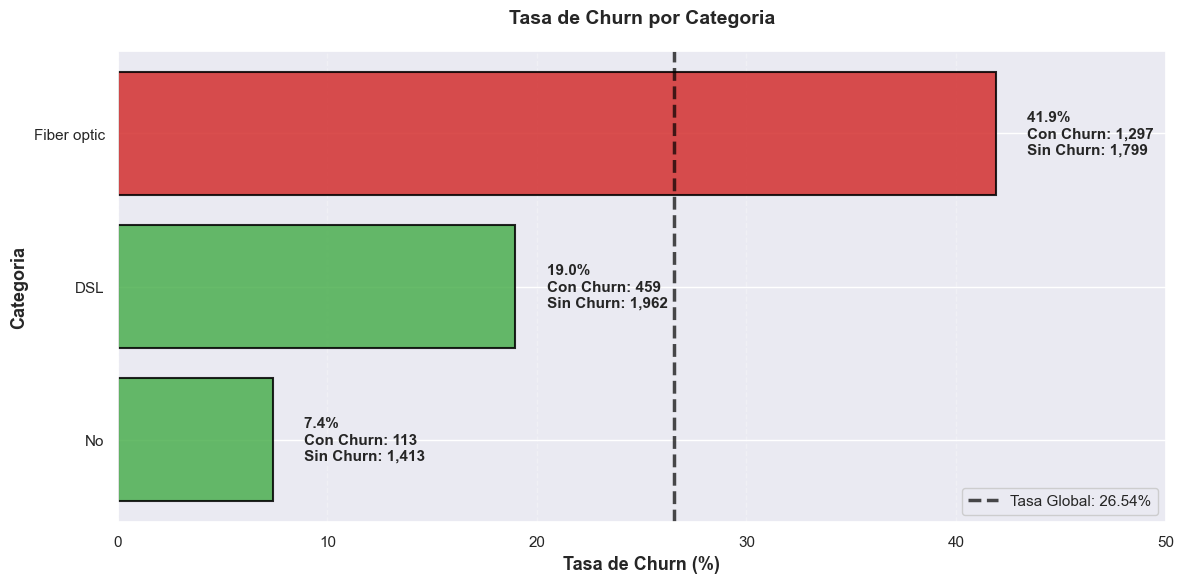

In [ ]:
grafico_churn_internet, ax_internet = graficar_churn_barras_horizontales(
    df=resultados_analisis['internet_internetservice'],
    variable_nombre='Categoria'
)
plt.show()
plt.close()

**Fundamentación del gráfico:** El gráfico de barras horizontales es adecuado para comparar categorías no ordenadas y resaltar diferencias en tasas de churn. El código de color (rojo=crítico, amarillo=moderado, verde=bajo) y la línea de referencia global facilitan la identificación de segmentos de alto riesgo.

**Interpretación:** El gráfico muestra que el servicio de internet por Fibra Óptica tiene una tasa de churn de 41.9%, significativamente superior a la tasa global de 26.5%, mientras que clientes sin servicio de internet presentan solo 7.4% de churn, indicando que el tipo de servicio de internet es un factor crítico en la retención.

In [548]:
def graficar_matriz_comparativa_variables(resultados_analisis: dict, 
                                          variables_seleccionadas: list = None,
                                          figsize: tuple = (18, 5)) -> tuple:
    """
    Crea matriz de subgráficos comparando tasas de churn entre múltiples variables.
    
    Genera serie de gráficos de barras horizontales, uno por variable, facilitando
    comparación visual simultánea del perfil de riesgo across dimensiones.
    
    Argumentos:
        resultados_analisis (dict): Diccionario con análisis de churn por variable.
        variables_seleccionadas (list): Variables a incluir. Si es None, incluye todas.
        figsize (tuple): Tamaño total de figura en pulgadas (ancho, alto). Por defecto (18, 5).
    
    Retorna:
        tuple: (fig, axes) Figure y array de Axes objects, uno por variable.
    """

    # seleccionar variables (si es None selecciona todas)
    if variables_seleccionadas is None:
        variables_seleccionadas = list(resultados_analisis.keys())

    n_vars = len(variables_seleccionadas)
    n_cols = min(2, n_vars)
    n_rows = (n_vars + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)

    if n_vars == 1:
        axes = np.array([axes])
    axes = axes.flatten()
    
    # generar gráfico para cada variable
    for idx, variable in enumerate(variables_seleccionadas):
        ax = axes[idx]
        df_var = resultados_analisis[variable].sort_values('Tasa_Churn_%', ascending=True)
        
        # colores según riesgo
        colors = ['#d32f2f' if x >= 35 else '#ff9800' if x >= 25 else '#4caf50'
                  for x in df_var['Tasa_Churn_%']]
        
        # barras horizontales
        bars = ax.barh(df_var['Categoria'], df_var['Tasa_Churn_%'], 
                      color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
        
        # línea global
        ax.axvline(churn_rate, color='black', linestyle='--', 
                  linewidth=1.5, alpha=0.5, label='Tasa Global')
        
        # etiquetas
        for i, (_, row) in enumerate(df_var.iterrows()):
            ax.text(row['Tasa_Churn_%'] + 1, i, f"{row['Tasa_Churn_%']:.1f}%",
                    va='center', fontsize=9, fontweight='bold')
        
        # configuración
        variable_label = variable.replace('_', ' ').title()
        ax.set_title(variable_label, fontsize=11, fontweight='bold')
        ax.set_xlabel('Tasa Churn (%)', fontsize=10)
        ax.grid(axis='x', alpha=0.3, linestyle='--')
        ax.set_xlim(0, 50)
    
    # ocultar axes sobrantes
    for idx in range(n_vars, len(axes)):
        axes[idx].set_visible(False)
    
    plt.tight_layout()
    return fig, axes

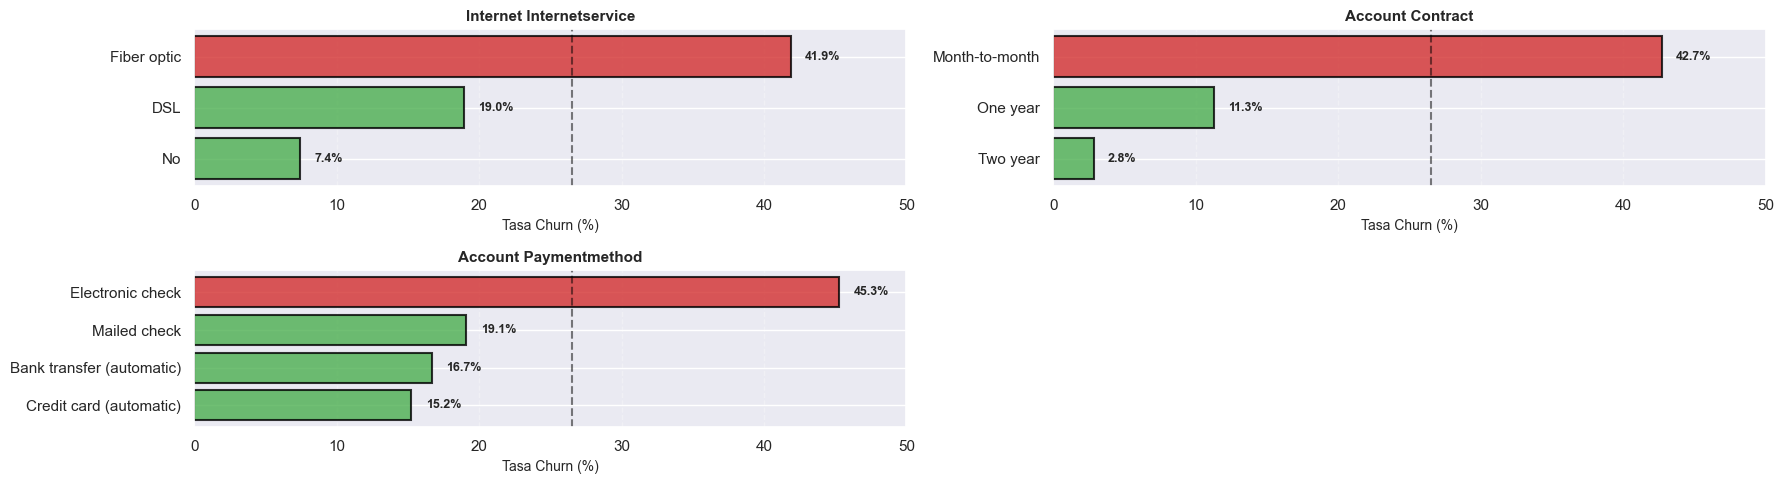

In [ ]:
grafico_matriz, axes_matriz = graficar_matriz_comparativa_variables(
    resultados_analisis=resultados_analisis,
    variables_seleccionadas=['internet_internetservice', 'account_contract', 'account_paymentmethod']
)
plt.savefig("images/grafico_comparativa_variables.png", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

**Fundamentación del gráfico:** La matriz comparativa con múltiples subgráficos permite analizar simultáneamente varias variables categóricas, facilitando la identificación de patrones comunes y anomalías entre diferentes dimensiones del negocio.

**Interpretación:** La matriz visualiza las tasas de churn para todas las variables analizadas (contrato, método de pago y servicios de internet), permitiendo una vista integrada que revela que las variables de negocio (internet por fibra óptica: 41.9%, contrato month-to-month: 42.7% y pago electrónico: 45.3%) tienen mayor impacto en churn.

In [550]:
def graficar_mapa_calor_riesgo(resultados_analisis: dict, 
                               variables_para_mapa: list = None,
                               top_n: int = 2,
                               figsize: tuple = (10, 8)) -> None:
    """
    Crea mapa de calor mostrando segmentos de mayor riesgo por variable.
    
    Selecciona los top-n segmentos de riesgo máximo de cada variable y los visualiza
    usando gradiente de color para comunicar intensidad de riesgo de forma rápida.
    
    Argumentos:
        resultados_analisis (dict): Diccionario con análisis de churn por variable.
        variables_para_mapa (list): Variables a incluir. Si es None, incluye todas.
        top_n (int): Número de segmentos top-risk a mostrar por variable. Por defecto 2.
        figsize (tuple): Tamaño de figura en pulgadas (ancho, alto). Por defecto (10, 8).
    
    Retorna:
        None: Muestra figura sin retornar objetos.
    """

    data_matrix = []
    labels_y = []

    # si no se especifican variables, usar todas
    if variables_para_mapa is None:
        variables_para_mapa = list(resultados_analisis.keys())

    for variable in variables_para_mapa:
        if variable in resultados_analisis:
            df_var = resultados_analisis[variable]
            top_segments = df_var.nlargest(top_n, 'Tasa_Churn_%')
            for _, row in top_segments.iterrows():
                data_matrix.append(row['Tasa_Churn_%'])

                # crear etiqueta descriptiva
                var_short = variable.replace('_', '\n').split('\n')[-1]
                labels_y.append(f"{var_short.upper()} - {row['Categoria']}")
            
    
    # ordenar filas por tasa de churn descendente
    sorted_indices = np.argsort(data_matrix)[::-1]
    data_matrix = [data_matrix[i] for i in sorted_indices]
    labels_y = [labels_y[i] for i in sorted_indices]

    # crear matriz
    matrix = np.array(data_matrix).reshape(-1, 1)

    # visualizar mapa de calor
    fig, ax = plt.subplots(figsize=(10, 8))
    im = ax.imshow(matrix, cmap='RdYlGn_r', aspect='auto', vmin=0, vmax=50)

    # configurar ejes
    ax.set_yticks(range(len(labels_y)))
    ax.set_yticklabels(labels_y, fontsize=10, fontweight='bold')
    ax.set_xticks([0])
    ax.set_xticklabels(['Tasa de Churn (%)'], fontsize=11, fontweight='bold')
    ax.set_title('Mapa de Riesgo: Top Segmentos de Mayor Churn por Variable',
                fontsize=14, fontweight='bold', pad=20)

    # añadir valores en las celdas
    for i in range(len(labels_y)):
        text = ax.text(0, i, f'{matrix[i, 0]:.1f}%',
                    ha="center", va="center", color="black", fontsize=12, fontweight='bold')

    # barra de color
    cbar = plt.colorbar(im, ax=ax, pad=0.02)
    cbar.set_label('Tasa de Churn (%)', rotation=270, labelpad=25, fontsize=11, fontweight='bold')

    # añadir leyenda de colores
    cbar.ax.axhline(35, color='red', linestyle='-', linewidth=2, alpha=0.5)
    cbar.ax.text(1.3, 35, 'Riesgo Crítico (≥35%)', fontsize=9, va='center', fontweight='bold')

    plt.tight_layout()
    return fig, ax

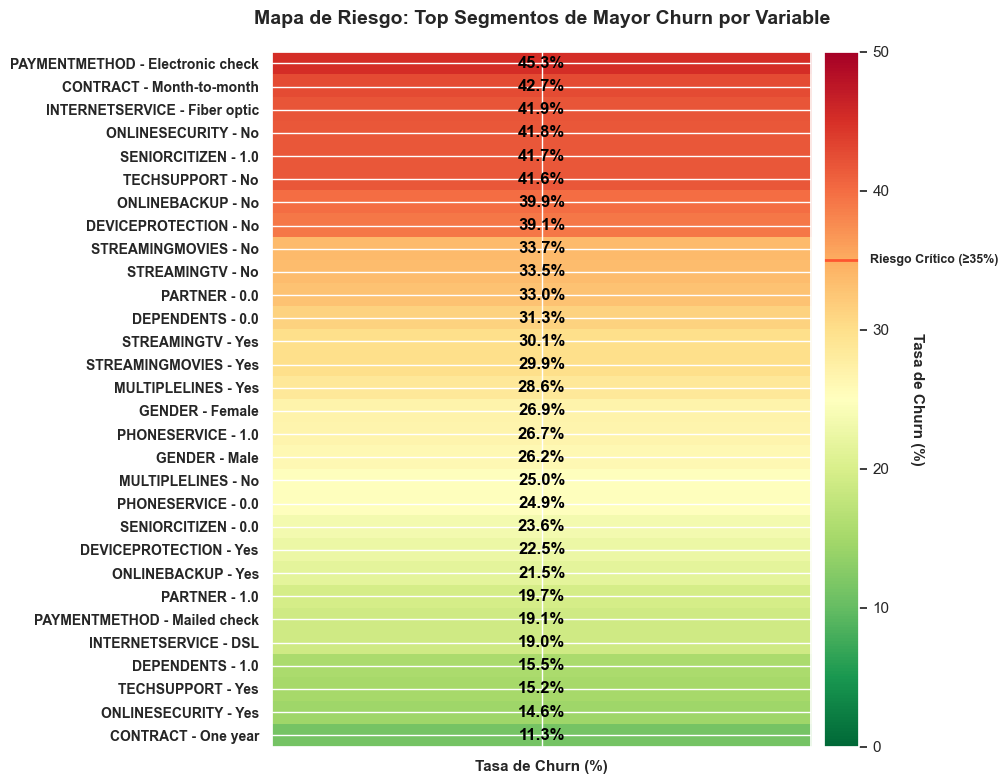

In [ ]:
grafico_mapa_riesgo, axes_mapa = graficar_mapa_calor_riesgo(resultados_analisis, top_n=2)
plt.show()
plt.close()

**Fundamentación del gráfico:** El mapa de calor (heatmap) es efectivo para visualizar valores numéricos mediante un gradiente de color, permitiendo identificar rápidamente los segmentos de mayor y menor riesgo a través de la intensidad cromática.

**Interpretación:** El mapa presenta los segmentos con mayor tasa de churn (top 2 por variable), destacando en rojo intenso aquellos con riesgo crítico (≥35%). Se observa que los segmentos de mayor riesgo son: Fibra Óptica (41.9%), Month-to-Month (42.7%), Electronic Check (45.3%), y servicios sin soporte técnico ni seguridad online, concentrando la atención en intervenciones prioritarias.

### Ejecución de Visualizaciones


Visualización: internet_internetservice


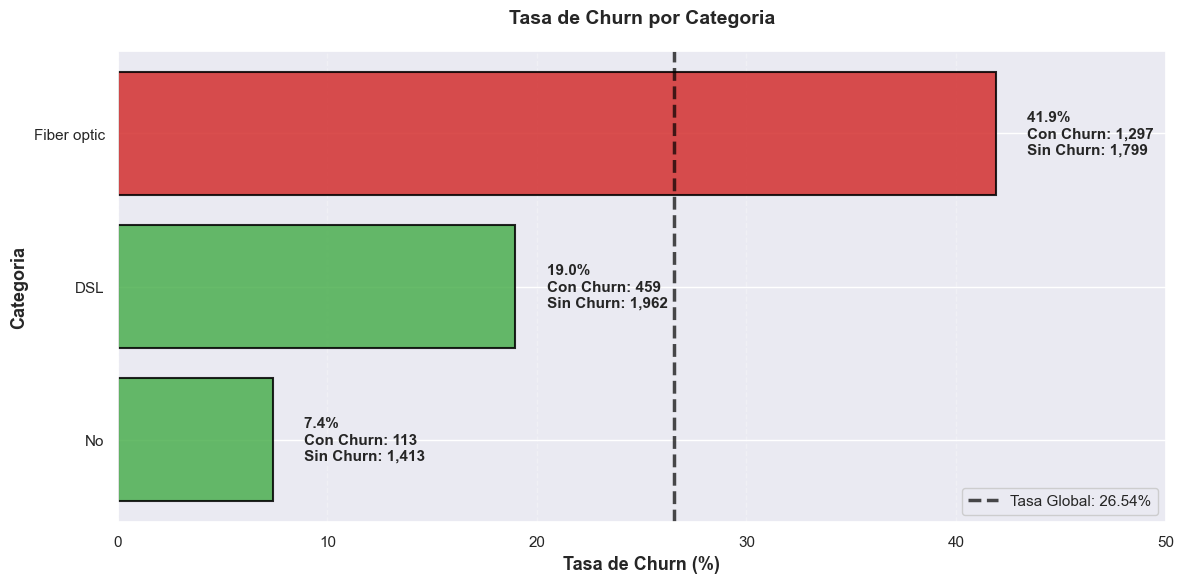


Visualización: account_contract


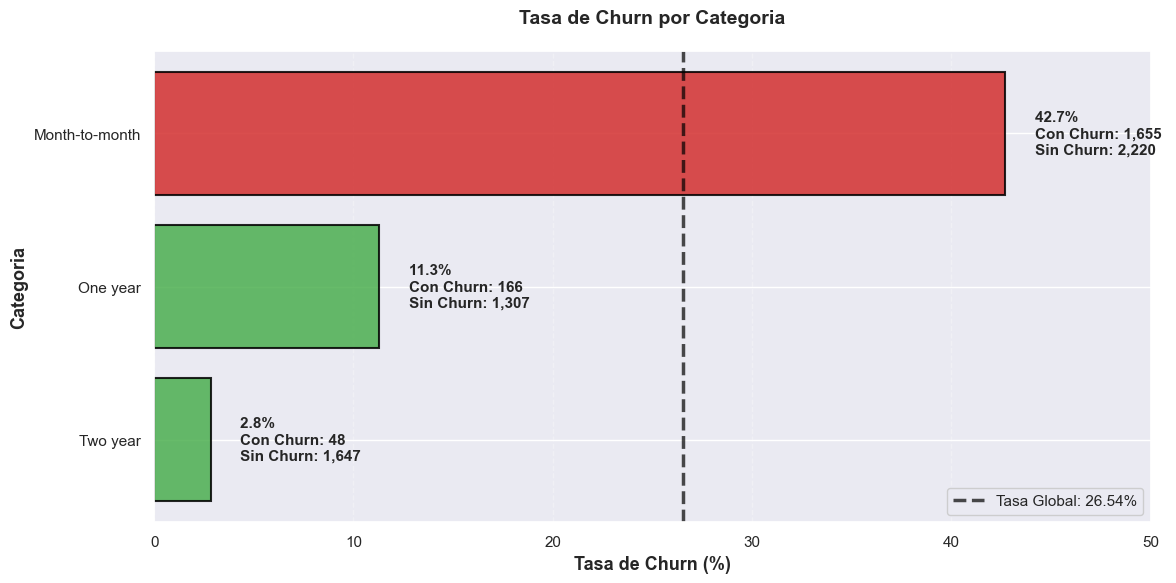


Visualización: account_paymentmethod


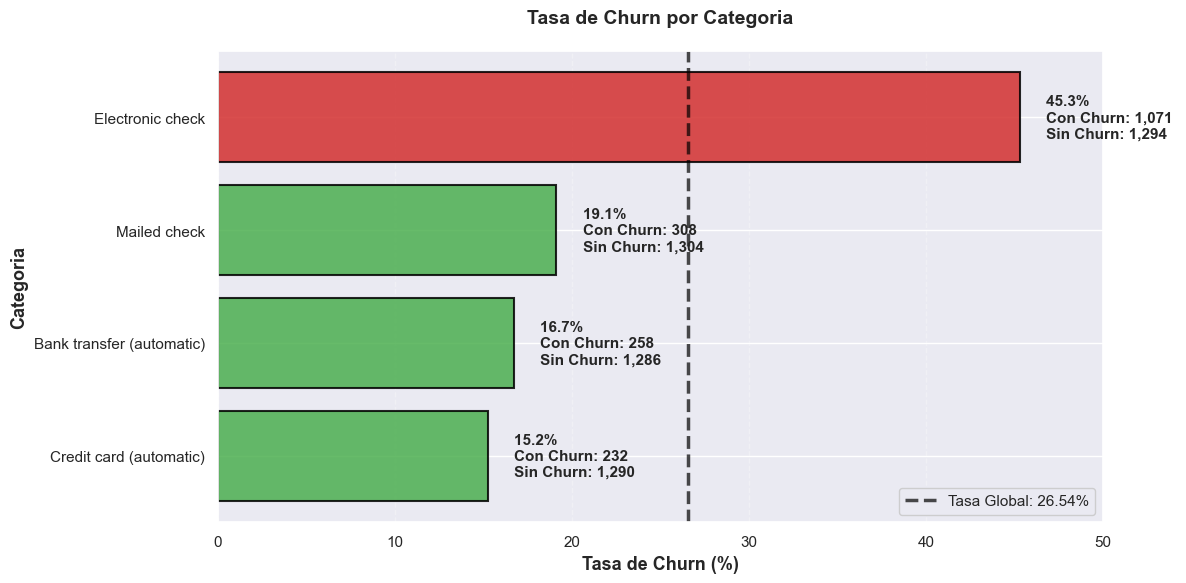

In [552]:
# visualizar variables críticas
for variable in variables_negocio:
    if variable in resultados_analisis:
        print(f"\n{'=' * 80}")
        print(f"Visualización: {variable}")
        print('=' * 80)
        fig, ax = graficar_churn_barras_horizontales(
            df=resultados_analisis[variable], 
            variable_nombre='Categoria'
        )
        plt.show()
        plt.close()


MATRIZ DE COMPARACIÓN - TODAS LAS VARIABLES

Visualización: Matriz Comparativa - internet_internetservice


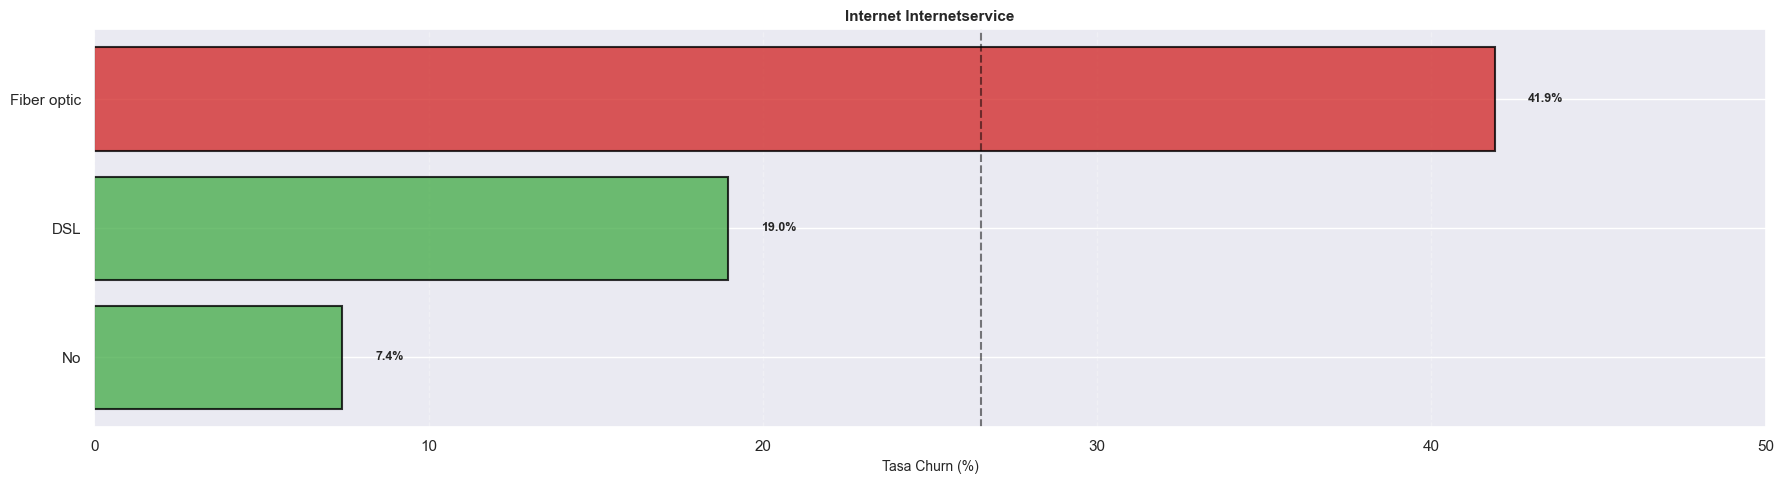


Visualización: Matriz Comparativa - account_contract


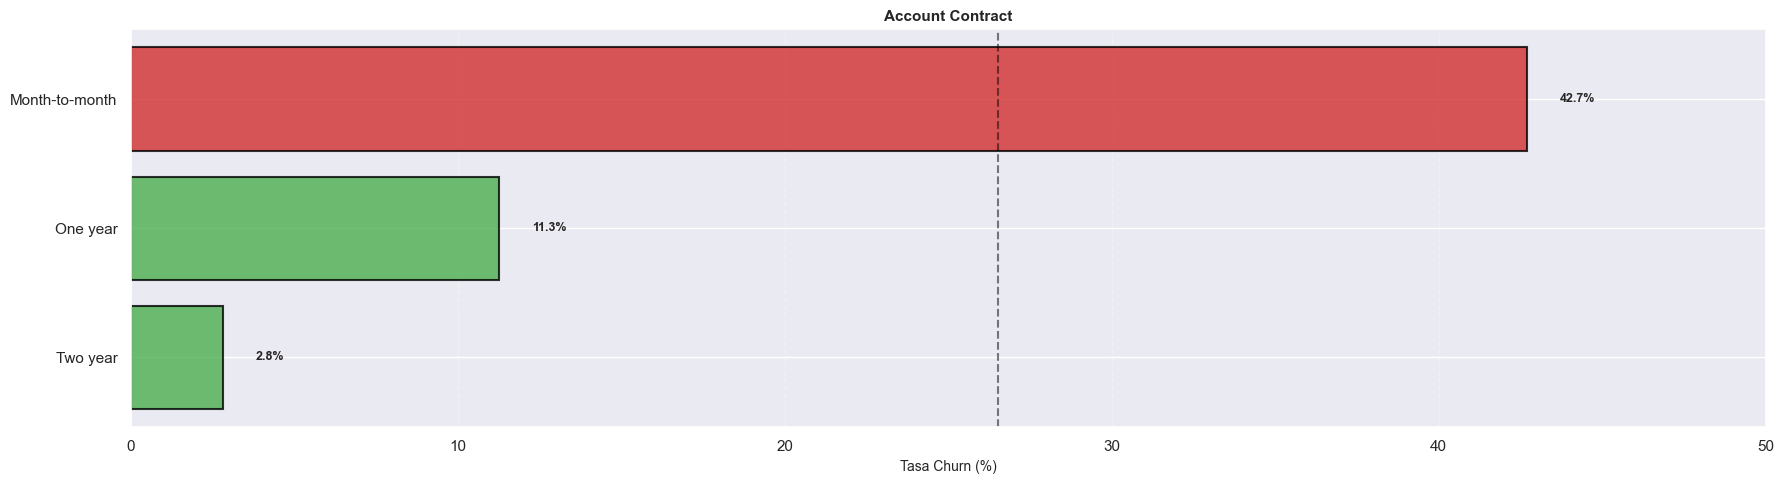


Visualización: Matriz Comparativa - account_paymentmethod


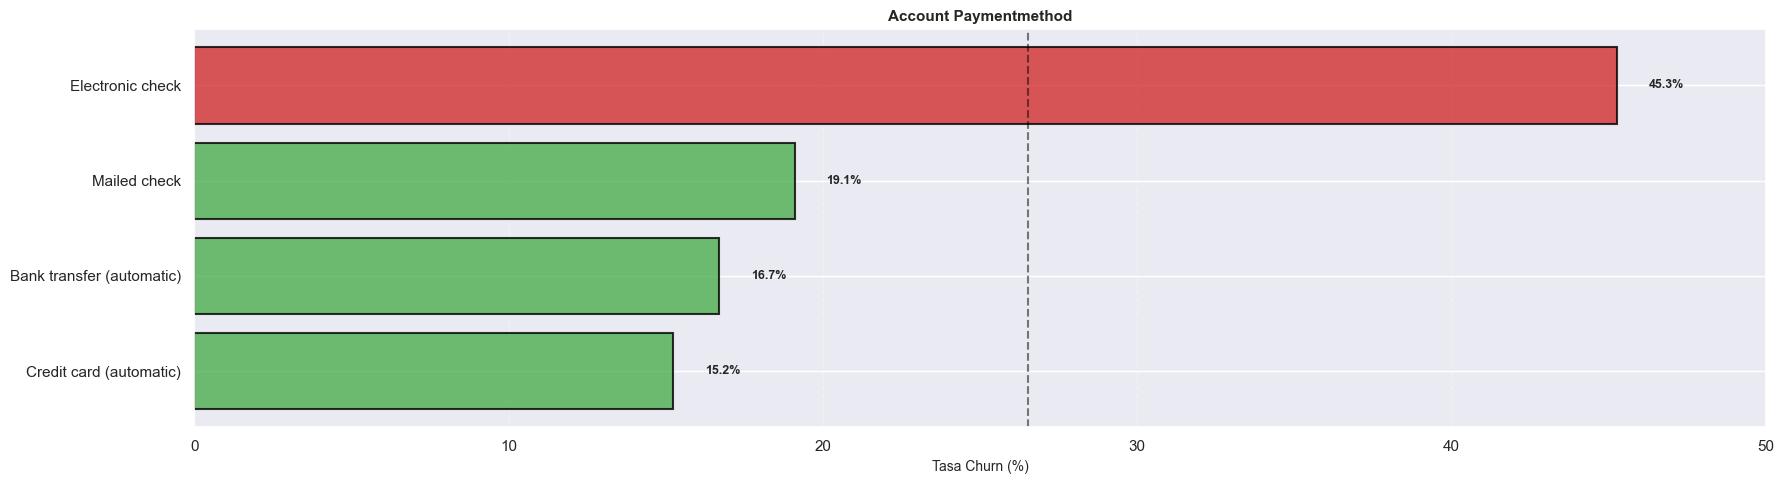


Visualización: Matriz Comparativa - customer_gender


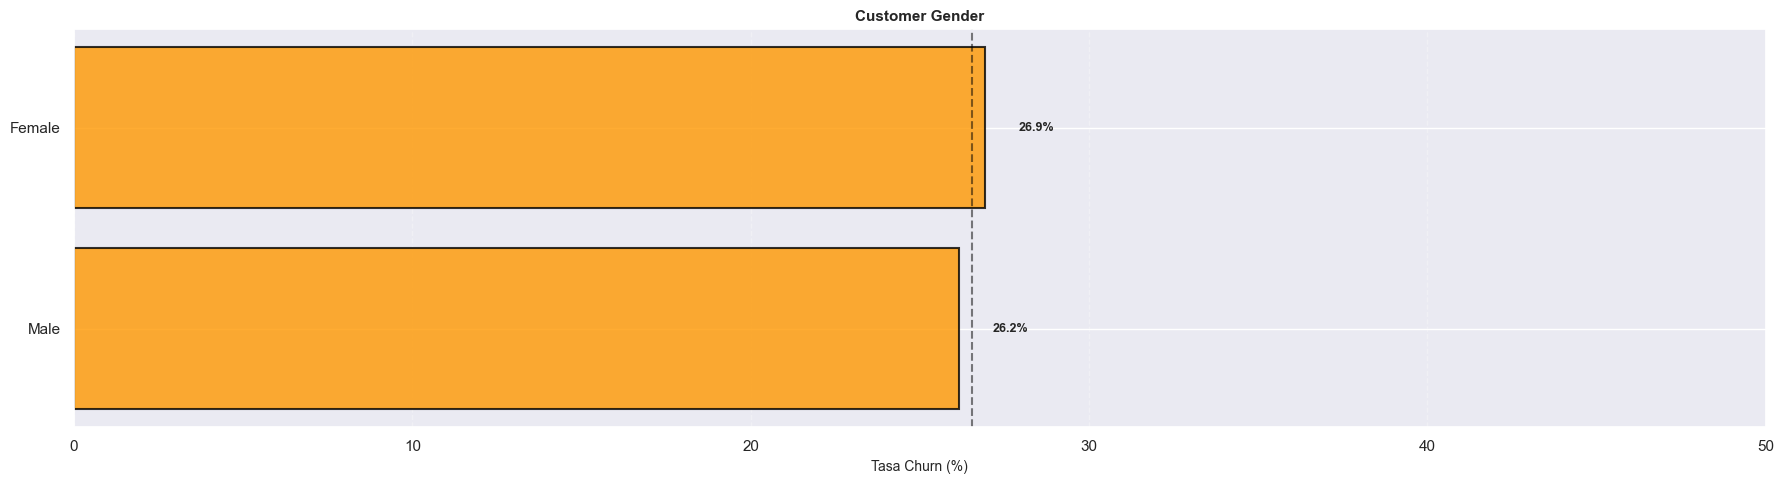


Visualización: Matriz Comparativa - customer_seniorcitizen


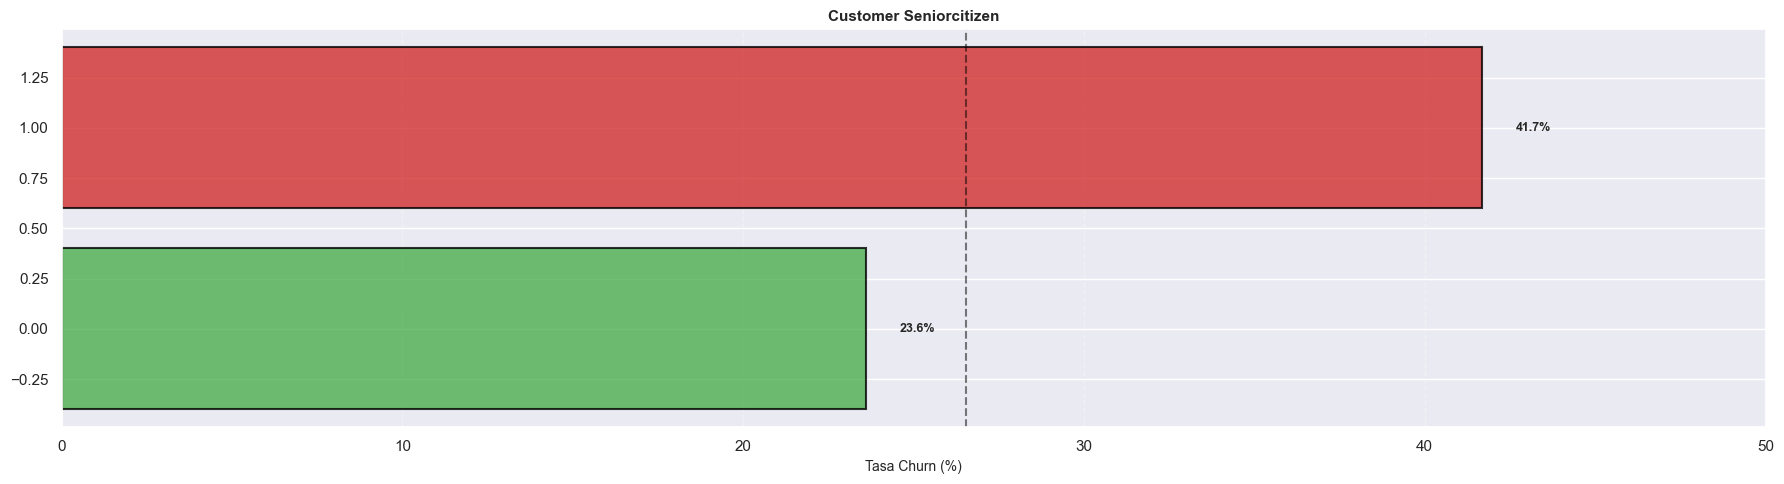


Visualización: Matriz Comparativa - customer_partner


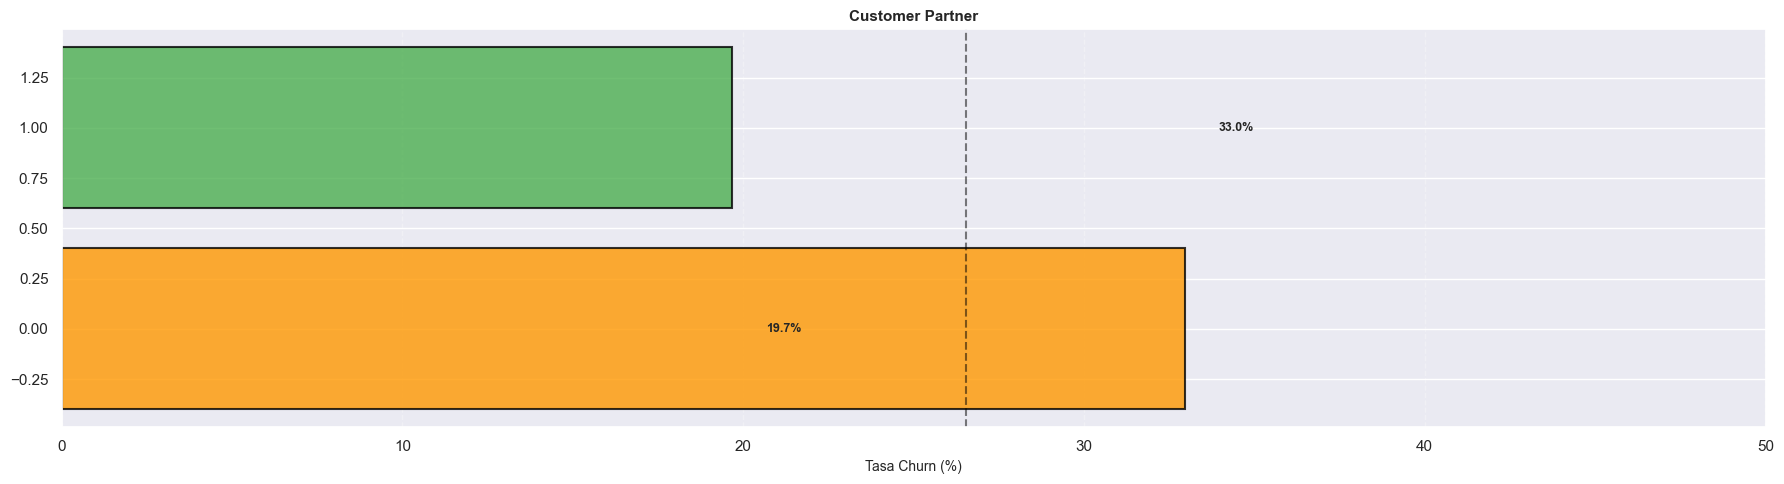


Visualización: Matriz Comparativa - customer_dependents


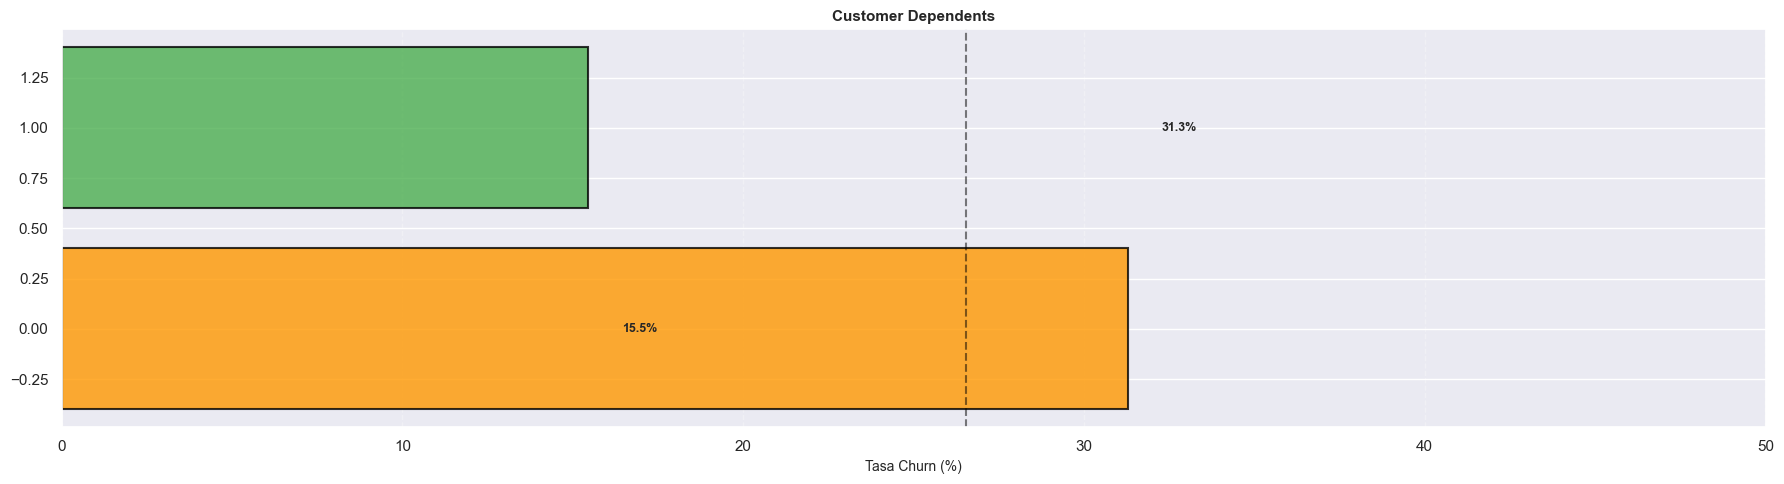


Visualización: Matriz Comparativa - phone_phoneservice


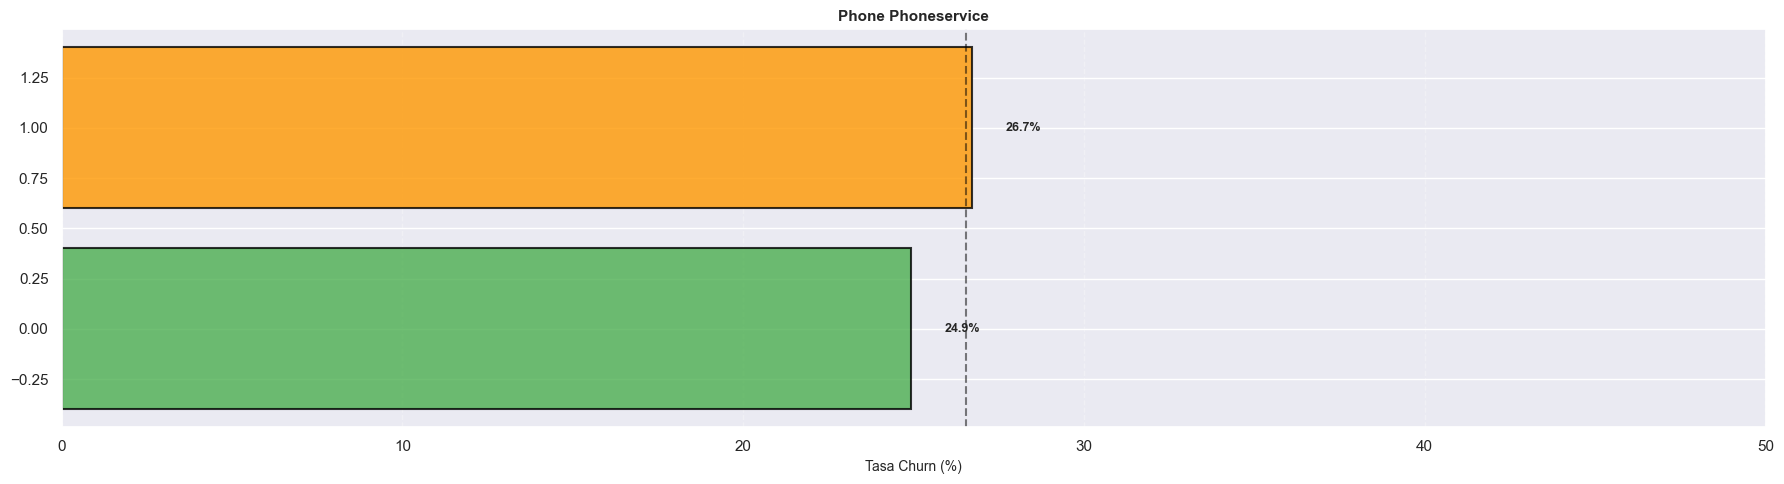


Visualización: Matriz Comparativa - phone_multiplelines


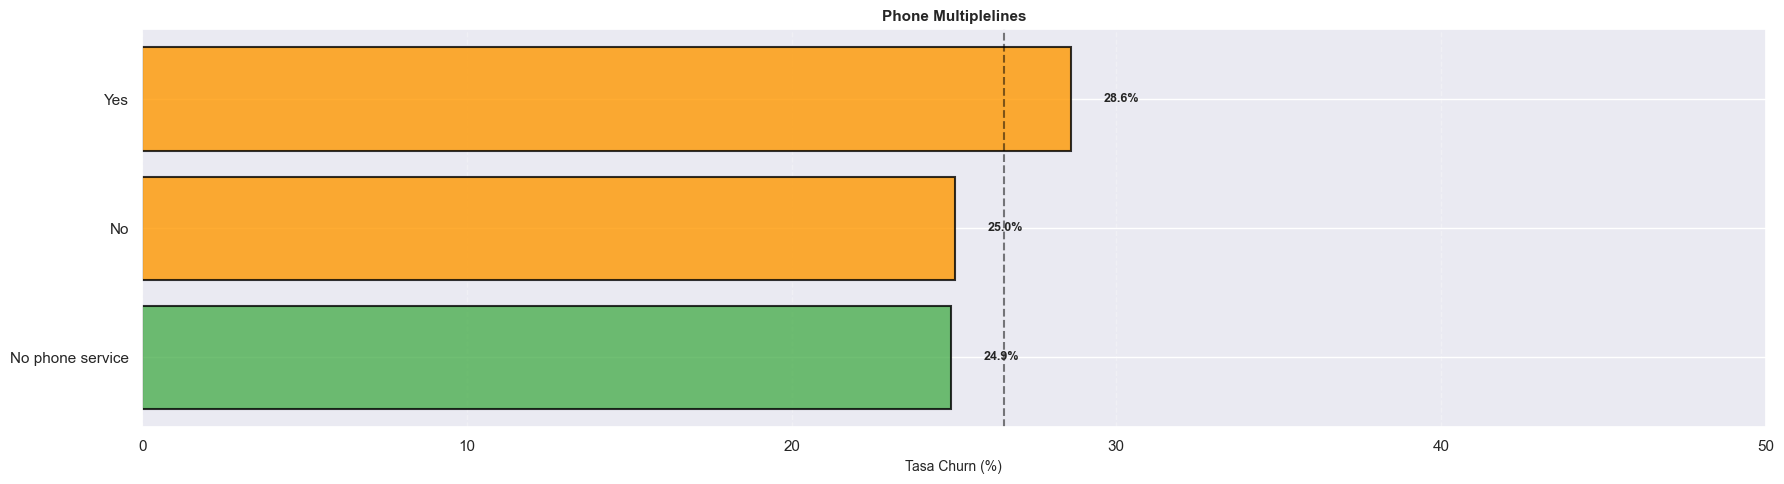


Visualización: Matriz Comparativa - internet_onlinesecurity


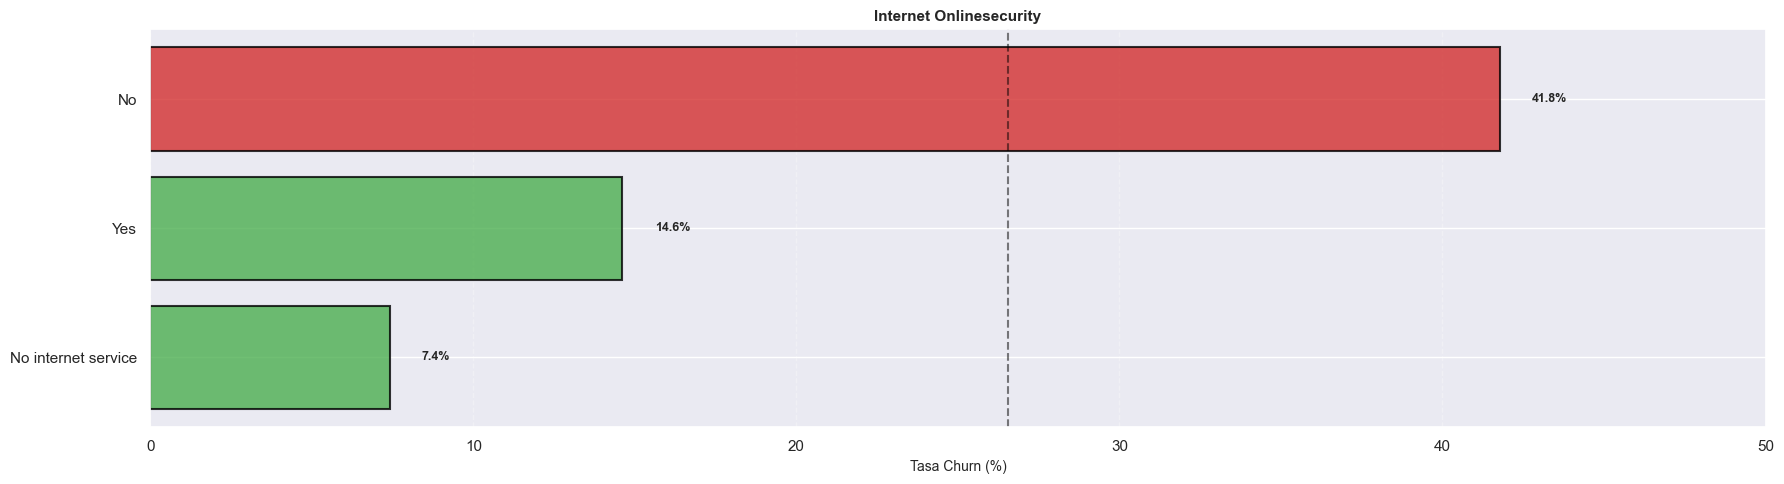


Visualización: Matriz Comparativa - internet_onlinebackup


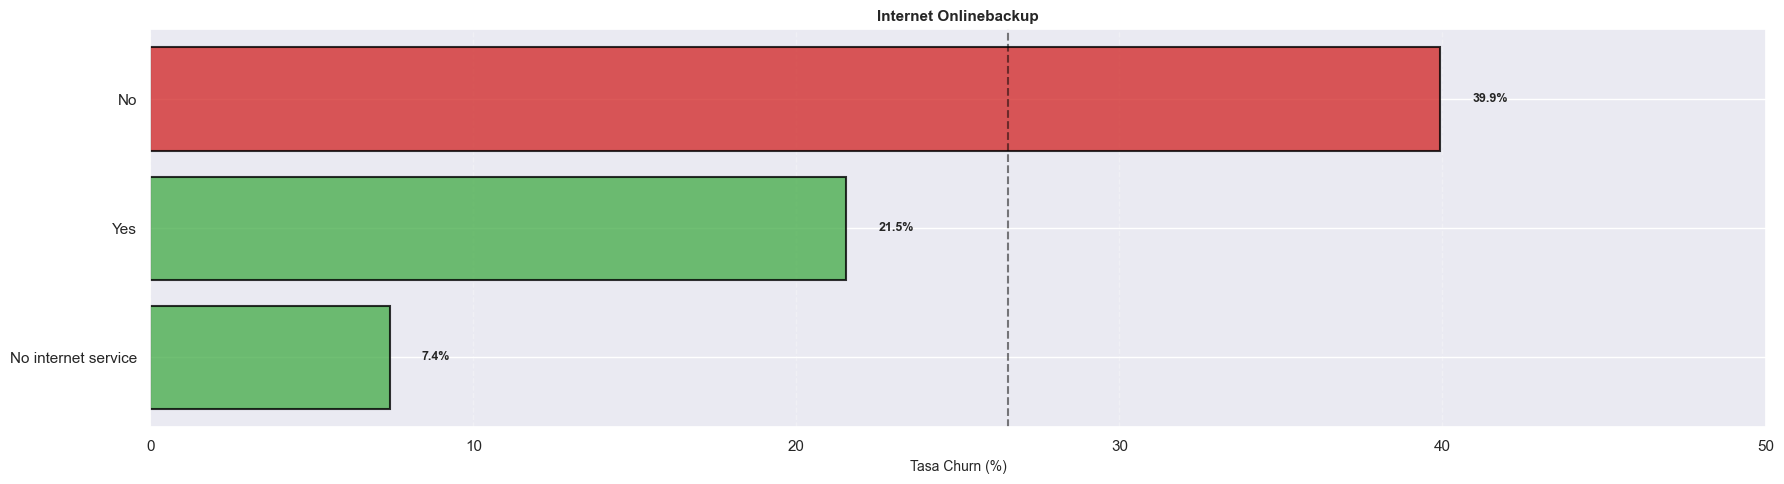


Visualización: Matriz Comparativa - internet_deviceprotection


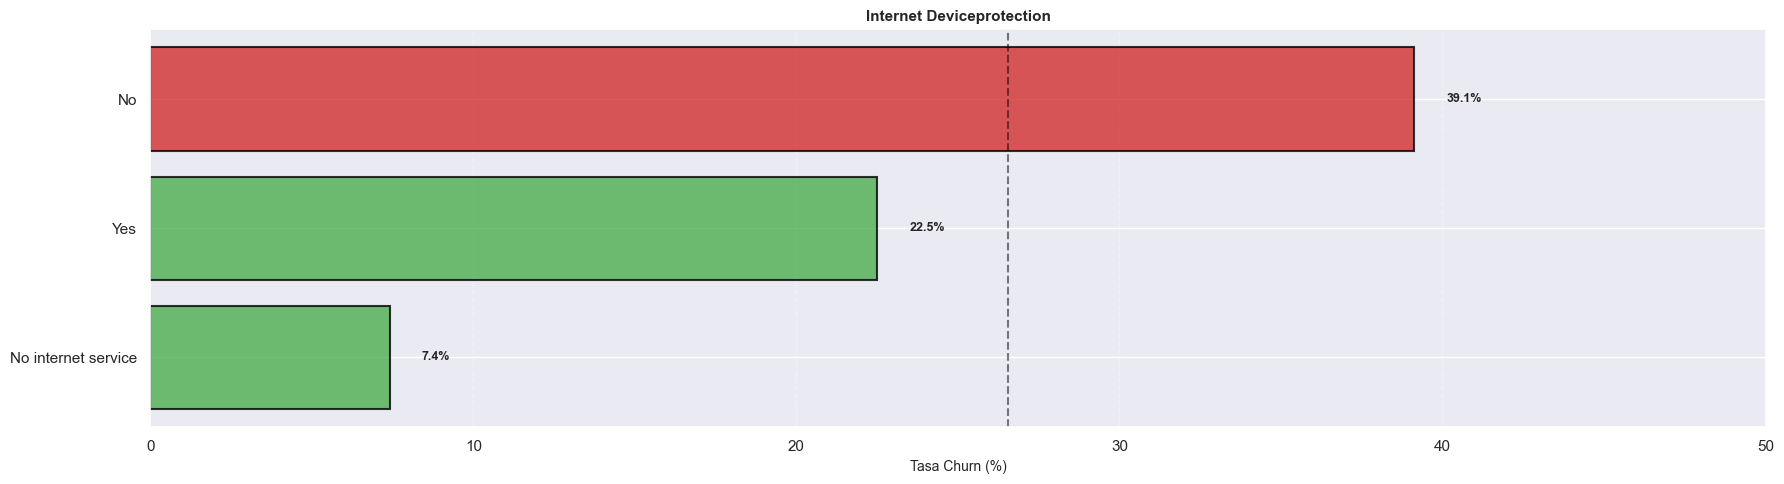


Visualización: Matriz Comparativa - internet_techsupport


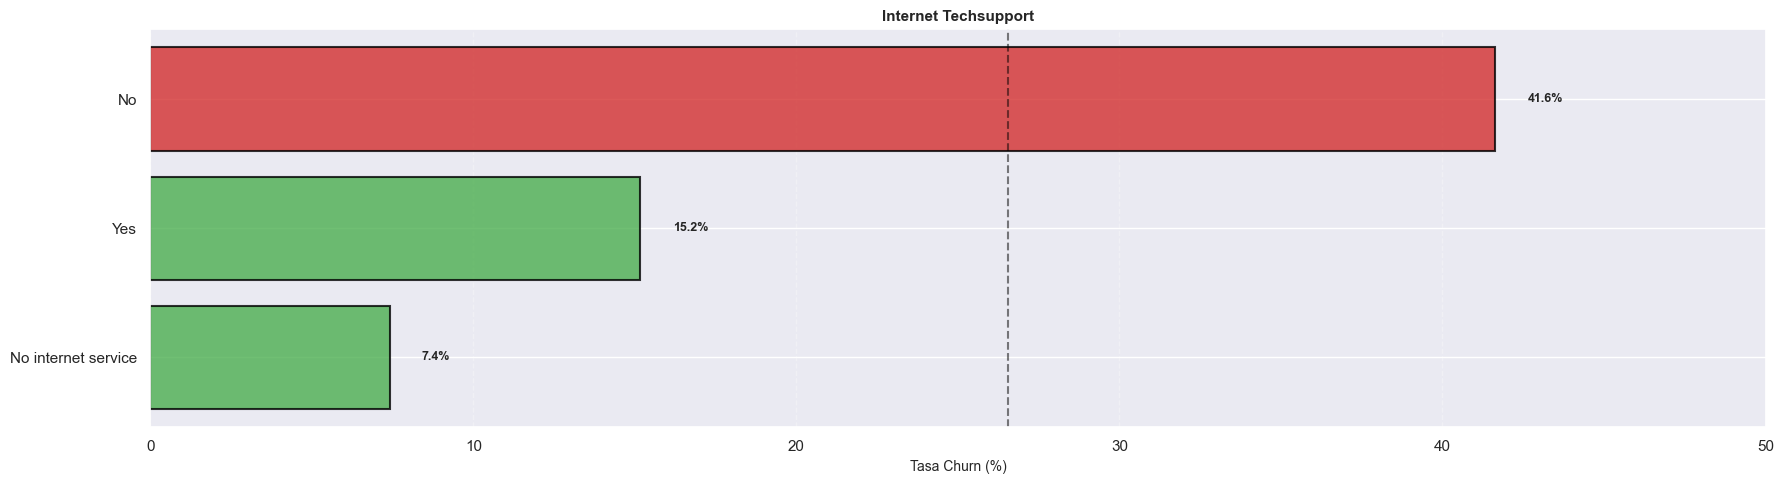


Visualización: Matriz Comparativa - internet_streamingtv


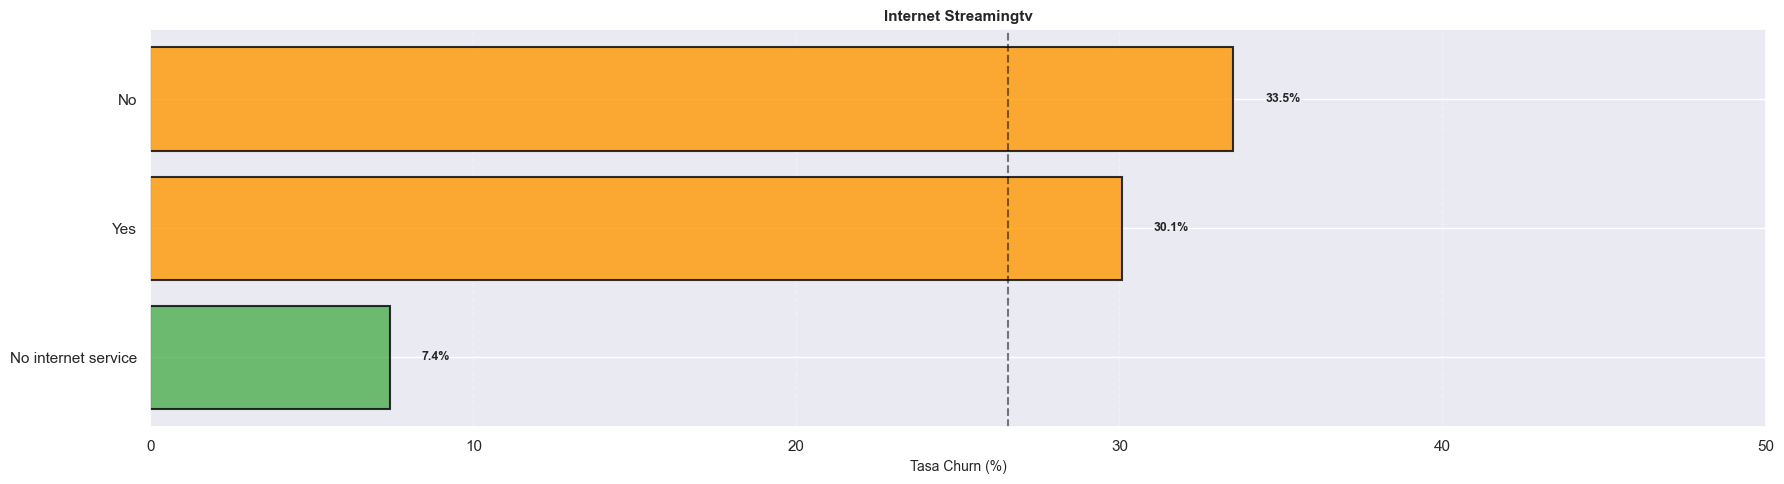


Visualización: Matriz Comparativa - internet_streamingmovies


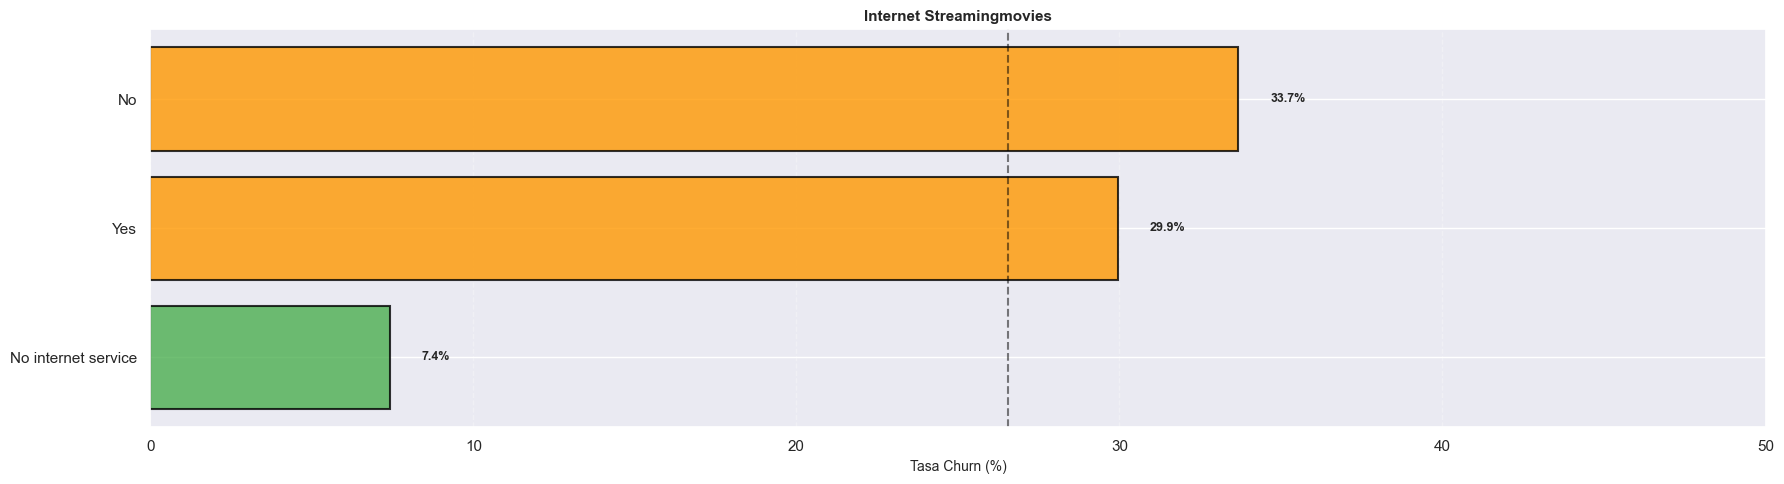

In [553]:
# visualizar matriz de comparación de todas las variables analizadas
print("\n" + "=" * 80)
print("MATRIZ DE COMPARACIÓN - TODAS LAS VARIABLES")
print("=" * 80)

# fig, axes = graficar_matriz_comparativa_variables(resultados_analisis=resultados_analisis)
# plt.show()

for variable in variables:
    if variable in resultados_analisis:
        print(f"\n{'=' * 80}")
        print(f"Visualización: Matriz Comparativa - {variable}")
        print('=' * 80)
        fig, axes = graficar_matriz_comparativa_variables(
            resultados_analisis={variable: resultados_analisis[variable]},
            variables_seleccionadas=[variable]
        )
        plt.show()

plt.close()


Visualización: Mapa de Calor de Riesgo - Top Segmentos


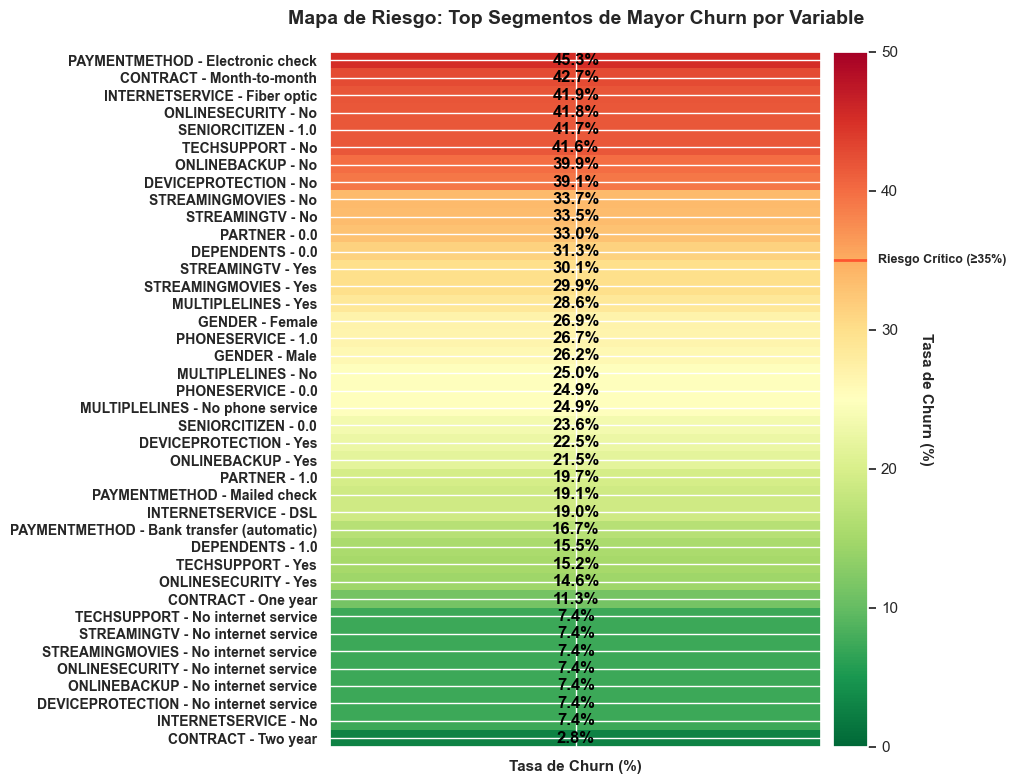

In [554]:
# visualización de mapa de calor de segmentos de alto riesgo
print("\n" + "=" * 80)
print("Visualización: Mapa de Calor de Riesgo - Top Segmentos")
print("=" * 80)

fig, ax = graficar_mapa_calor_riesgo(resultados_analisis, top_n=3)
plt.show()
plt.close()

### Conclusiones del Análisis de Churn por Variables Categóricas

El análisis funcional de las variables categóricas ha revelado **patrones críticos** que permiten identificar con precisión los segmentos de clientes con mayor propensión a la evasión:

#### Variables Críticas de Negocio

1. **Tipo de Contrato (`contract_type`)**
   - Los _contratos mensuales_ presentan la **mayor tasa de churn**, superando significativamente la tasa global.
   - Los contratos de largo plazo (1-2 años) actúan como **factor protector** contra la evasión.
   - **Recomendación**: Implementar estrategias de incentivos para migración a contratos anuales.

2. **Servicio de Internet (`internet_service_type`)**
   - Los clientes con _fibra óptica_ muestran tasas de churn superiores al promedio.
   - La ausencia de servicio de internet correlaciona con **mayor retención**.
   - **Recomendación**: Revisar calidad de servicio y pricing de fibra óptica.

3. **Método de Pago (`payment_method`)**
   - El _pago electrónico con cheque_ está asociado a **altas tasas de evasión**.
   - Los métodos automatizados (bank transfer, credit card) muestran mejor retención.
   - **Recomendación**: Promover métodos de pago automatizados con descuentos.

#### Variables Demográficas

- **Senior Citizens**: Presentan comportamiento diferenciado que requiere atención especial.
- **Clientes sin Partner/Dependientes**: Mayor vulnerabilidad a la evasión.
- **Género**: Irrelevante para el análisis.

#### Variables de Suscripciones

Los servicios complementarios actúan como **factores de retención**:
- `online security`, `online backup`, `device protection` y `tech support` reducen significativamente el churn.
- Los clientes sin estos servicios presentan mayor riesgo de evasión.
- **Estrategia**: Cross-selling de servicios de protección y soporte técnico.

#### Segmentos de Acción Prioritaria

**Alto Riesgo (Churn ≥ 35%)**:
- Contratos mensuales + Fiber optic + Electronic check
- Clientes sin servicios de protección/soporte
- Tenure bajo (< 12 meses)

**Bajo Riesgo (Churn ≤ 20%)**:
- Contratos anuales/bianuales
- Métodos de pago automatizados
- Clientes con múltiples servicios adicionales

#### Plan de Acción

1. **Programa de Fidelización**: Incentivar migración a contratos de largo plazo.
2. **Optimización de Servicios**: Mejorar experiencia de clientes con fibra óptica.
3. **Automatización de Pagos**: Bonificaciones por adopción de métodos automáticos.
4. **Bundles de Servicios**: Paquetes integrados con servicios de protección incluidos.
5. **Atención Proactiva**: Monitoreo y contacto preventivo con segmentos de alto riesgo.

## Análisis de `Churn` por Variables Numéricas

El objetivo es identificar patrones de churn según perfiles de clientes basados en variables numéricas clave. Este análisis revelará segmentos de alto riesgo para orientar estrategias de retención.

### Definición de Funciones

In [555]:
def calcular_estadisticas_numericas(df: pd.DataFrame, variable: str) -> pd.DataFrame:
    """
    Calcula estadísticas descriptivas de una variable numérica segmentada por churn.
    
    Computa media, mediana, desviación estándar, mínimo, máximo y cuartiles para
    cada grupo de churn (con y sin), permitiendo identificar diferencias en distribuciones.
    
    Argumentos:
        df (pd.DataFrame): DataFrame con datos de clientes.
        variable (str): Nombre de la columna numérica a analizar.
    
    Retorna:
        tuple: (stats_df, diferencia_media, diferencia_mediana)
               - stats_df: DataFrame con estadísticas por grupo de churn
               - diferencia_media: float, diferencia en promedio entre churn y no-churn
               - diferencia_mediana: float, diferencia en mediana entre churn y no-churn
    """
    stats_by_churn = df.groupby('Churn')[variable].agg([
        ('Media', 'mean'),
        ('Mediana', 'median'),
        ('Desv_Std', 'std'),
        ('Min', 'min'),
        ('Max', 'max'),
        ('Q25', lambda x: x.quantile(0.25)),
        ('Q75', lambda x: x.quantile(0.75))
    ]).round(2)
    
    stats_by_churn.index = ['Sin Churn (0)', 'Con Churn (1)']
    
    diferencia_media = stats_by_churn.loc['Con Churn (1)', 'Media'] - stats_by_churn.loc['Sin Churn (0)', 'Media']
    diferencia_mediana = stats_by_churn.loc['Con Churn (1)', 'Mediana'] - stats_by_churn.loc['Sin Churn (0)', 'Mediana']
    
    return stats_by_churn, diferencia_media, diferencia_mediana

In [556]:
def analizar_multiples_numericas(df: pd.DataFrame, variables: list) -> dict:
    """
    Analiza churn para múltiples variables numéricas calculando estadísticas por grupo.
    
    Itera sobre variables numéricas, computando estadísticas descriptivas y diferencias
    entre grupos con y sin churn para cada una.
    
    Argumentos:
        df (pd.DataFrame): DataFrame con datos de clientes.
        variables (list): Lista de nombres de columnas numéricas a analizar.
    
    Retorna:
        dict: Diccionario donde claves son nombres de variables y valores son dicts con
              \"estadisticas\", \"diferencia_media\" y \"diferencia_mediana\".
    """
    resultados = {}
    
    for var in variables:
        if var in df.columns:
            stats, diff_media, diff_mediana = calcular_estadisticas_numericas(df, var)
            resultados[var] = {
                'estadisticas': stats,
                'diferencia_media': diff_media,
                'diferencia_mediana': diff_mediana
            }
    
    return resultados

In [557]:
def generar_resumen_ejecutivo_numerico(analisis: dict) -> pd.DataFrame:
    """
    Genera resumen ejecutivo de variables numéricas con diferencias entre grupos.
    
    Compila tabla comparativa mostrando medias y medianas por grupo de churn,
    así como diferencias absolutas, ordenada por magnitud de diferencia.
    
    Argumentos:
        analisis (dict): Diccionario resultado de analizar_multiples_numericas.
    
    Retorna:
        pd.DataFrame: Tabla con columnas [Variable, Media_Sin_Churn, Media_Con_Churn,
                     Diferencia_Media, Mediana_Sin_Churn, Mediana_Con_Churn, 
                     Diferencia_Mediana], ordenada descendentemente por diferencia absoluta.
    """
    resumen = []
    
    for variable, datos in analisis.items():
        stats = datos['estadisticas']
        
        resumen.append({
            'Variable': variable,
            'Media_Sin_Churn': stats.loc['Sin Churn (0)', 'Media'],
            'Media_Con_Churn': stats.loc['Con Churn (1)', 'Media'],
            'Diferencia_Media': datos['diferencia_media'],
            'Mediana_Sin_Churn': stats.loc['Sin Churn (0)', 'Mediana'],
            'Mediana_Con_Churn': stats.loc['Con Churn (1)', 'Mediana'],
            'Diferencia_Mediana': datos['diferencia_mediana']
        })
    
    df_resumen = pd.DataFrame(resumen)
    
    # ordenar por diferencia absoluta en media
    df_resumen['Diferencia_Abs'] = df_resumen['Diferencia_Media'].abs()
    df_resumen = df_resumen.sort_values('Diferencia_Abs', ascending=False)
    df_resumen = df_resumen.drop('Diferencia_Abs', axis=1)
    
    return df_resumen

### Selección de Variables Numéricas

In [558]:
variables_numericas = {
    'customer_tenure': 'Meses de contrato del cliente',
    'account_charges_monthly': 'Total de todos los servicios del cliente por mes',
    'account_charges_total': 'Total gastado por el cliente',
    'cuentas_diarias': 'Total gastado a diario'
}

print(f"Variables numéricas seleccionadas: {len(variables_numericas)}")
print("\nVariables a analizar:")
for var, desc in variables_numericas.items():
    print(f"- {var}: {desc}")

Variables numéricas seleccionadas: 4

Variables a analizar:
- customer_tenure: Meses de contrato del cliente
- account_charges_monthly: Total de todos los servicios del cliente por mes
- account_charges_total: Total gastado por el cliente
- cuentas_diarias: Total gastado a diario


### Ejecutar Análisis de Variables Numéricas

In [559]:
# analizar todas las variables numéricas
resultados_numericos = analizar_multiples_numericas(df, list(variables_numericas.keys()))

# generar resumen ejecutivo
resumen_numerico = generar_resumen_ejecutivo_numerico(resultados_numericos)

print("=" * 80)
print("RESUMEN EJECUTIVO: ANÁLISIS DE CHURN POR VARIABLES NUMÉRICAS")
print("=" * 80)
print()
print(f"> Clientes CON Churn: {churn_counts.get(1, 0):,} | Clientes SIN Churn: {churn_counts.get(0, 0):,}")
print()
print(resumen_numerico.to_string(index=False))
print()
print(f"Total de variables analizadas: {len(resultados_numericos)}")

RESUMEN EJECUTIVO: ANÁLISIS DE CHURN POR VARIABLES NUMÉRICAS

> Clientes CON Churn: 1,869 | Clientes SIN Churn: 5,174

               Variable  Media_Sin_Churn  Media_Con_Churn  Diferencia_Media  Mediana_Sin_Churn  Mediana_Con_Churn  Diferencia_Mediana
  account_charges_total          2549.91          1531.80          -1018.11            1679.52             703.55             -975.97
        customer_tenure            37.57            17.98            -19.59              38.00              10.00              -28.00
account_charges_monthly            61.27            74.44             13.17              64.43              79.65               15.22
        cuentas_diarias             2.04             2.48              0.44               2.15               2.66                0.51

Total de variables analizadas: 4


In [560]:
# análisis detallado por variable
print("\n" + "=" * 80)
print("ESTADÍSTICAS DESCRIPTIVAS POR VARIABLE")
print("=" * 80)

for variable in variables_numericas.keys():
    if variable in resultados_numericos:
        print(f"\n{variable.upper().replace('_', ' ')}")
        print("-" * 80)
        stats = resultados_numericos[variable]['estadisticas']
        print(stats.to_string())
        
        # insights automáticos
        diff_media = resultados_numericos[variable]['diferencia_media']
        diff_mediana = resultados_numericos[variable]['diferencia_mediana']
        
        print(f"\nInsights:")
        print(f"- Diferencia en Media: {diff_media:+.2f}")
        print(f"- Diferencia en Mediana: {diff_mediana:+.2f}")
        
        if diff_media < 0:
            print(f"- Los clientes con CHURN tienen valores MENORES en promedio")
        else:
            print(f"- Los clientes con CHURN tienen valores MAYORES en promedio")
        
        print("-" * 80)


ESTADÍSTICAS DESCRIPTIVAS POR VARIABLE

CUSTOMER TENURE
--------------------------------------------------------------------------------
               Media  Mediana  Desv_Std  Min  Max   Q25   Q75
Sin Churn (0)  37.57     38.0     24.11    0   72  15.0  61.0
Con Churn (1)  17.98     10.0     19.53    1   72   2.0  29.0

Insights:
- Diferencia en Media: -19.59
- Diferencia en Mediana: -28.00
- Los clientes con CHURN tienen valores MENORES en promedio
--------------------------------------------------------------------------------

ACCOUNT CHARGES MONTHLY
--------------------------------------------------------------------------------
               Media  Mediana  Desv_Std    Min     Max    Q25   Q75
Sin Churn (0)  61.27    64.43     31.09  18.25  118.75  25.10  88.4
Con Churn (1)  74.44    79.65     24.67  18.85  118.35  56.15  94.2

Insights:
- Diferencia en Media: +13.17
- Diferencia en Mediana: +15.22
- Los clientes con CHURN tienen valores MAYORES en promedio
-------------------

### Definición de Visualizaciones

In [561]:
def graficar_boxplot_comparativo(df: pd.DataFrame, variable: str, 
                                 titulo: str = None, figsize: tuple = (10, 6)) -> tuple:
    """
    Crea boxplot comparativo de una variable numérica segmentada por churn.
    
    Muestra distribución, cuartiles, mediana y media para grupos con y sin churn,
    permitiendo identificar diferencias visuales en posición central y dispersión.
    
    Argumentos:
        df (pd.DataFrame): DataFrame con datos de clientes.
        variable (str): Nombre de variable numérica a visualizar.
        titulo (str): Título personalizado. Si es None, se genera automáticamente.
        figsize (tuple): Tamaño de figura en pulgadas (ancho, alto). Por defecto (10, 6).
    
    Retorna:
        tuple: (fig, ax) objetos de matplotlib Figure y Axes.
    """
    fig, ax = plt.subplots(figsize=figsize)
    
    # datos por grupo
    data_sin_churn = df[df['Churn'] == 0][variable]
    data_con_churn = df[df['Churn'] == 1][variable]
    
    bp = ax.boxplot([data_sin_churn, data_con_churn],
                     tick_labels=['Sin Churn', 'Con Churn'],
                     patch_artist=True,
                     widths=0.6,
                     showmeans=True,
                     meanprops=dict(marker='D', markerfacecolor='red', markersize=8))
    
    colors = ['#2ecc71', '#e74c3c']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    # configuración
    titulo_final = titulo if titulo else f'Distribución de {variable} por Churn'
    ax.set_title(titulo_final, fontsize=14, fontweight='bold', pad=20)
    ax.set_ylabel(variable.replace('_', ' ').title(), fontsize=12, fontweight='bold')
    ax.grid(axis='y', alpha=0.3)
    
    # añadir estadísticas en leyenda
    media_sin = data_sin_churn.mean()
    media_con = data_con_churn.mean()
    ax.legend([bp["boxes"][0], bp["boxes"][1]], 
              [f'Sin Churn - Media: {media_sin:.2f}', f'Con Churn - Media: {media_con:.2f}'],
              loc='upper right', fontsize=10, framealpha=0.95)
    
    plt.tight_layout()
    return fig, ax

In [562]:
def graficar_histograma_comparativo(df: pd.DataFrame, variable: str, 
                                    titulo: str = None, figsize: tuple = (12, 6)) -> tuple:
    """
    Crea histogramas superpuestos comparando distribución de variable por churn.
    
    Visualiza histogramas para ambos grupos con transparencia, añadiendo líneas
    verticales de media para facilitar comparación visual de tendencias centrales.
    
    Argumentos:
        df (pd.DataFrame): DataFrame con datos de clientes.
        variable (str): Nombre de variable numérica a visualizar.
        titulo (str): Título personalizado. Si es None, se genera automáticamente.
        figsize (tuple): Tamaño de figura en pulgadas (ancho, alto). Por defecto (12, 6).
    
    Retorna:
        tuple: (fig, ax) objetos de matplotlib Figure y Axes.
    """
    fig, ax = plt.subplots(figsize=figsize)
    
    data_sin_churn = df[df['Churn'] == 0][variable]
    data_con_churn = df[df['Churn'] == 1][variable]
    
    # histogramas superpuestos
    ax.hist(data_sin_churn, bins=30, alpha=0.6, color='#2ecc71', 
            label=f'Sin Churn (n={len(data_sin_churn):,})', edgecolor='black')
    ax.hist(data_con_churn, bins=30, alpha=0.6, color='#e74c3c', 
            label=f'Con Churn (n={len(data_con_churn):,})', edgecolor='black')
    
    # líneas de media
    ax.axvline(data_sin_churn.mean(), color='#27ae60', linestyle='--', 
               linewidth=2, label=f'Media Sin Churn: {data_sin_churn.mean():.2f}')
    ax.axvline(data_con_churn.mean(), color='#c0392b', linestyle='--', 
               linewidth=2, label=f'Media Con Churn: {data_con_churn.mean():.2f}')
    
    # configuración
    titulo_final = titulo if titulo else f'Distribución de {variable} por Churn'
    ax.set_title(titulo_final, fontsize=14, fontweight='bold', pad=20)
    ax.set_xlabel(variable.replace('_', ' ').title(), fontsize=12, fontweight='bold')
    ax.set_ylabel('Frecuencia', fontsize=12, fontweight='bold')
    ax.legend(loc='upper right', fontsize=10)
    ax.grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    return fig, ax

In [563]:
def graficar_violin_plot(df: pd.DataFrame, variable: str, 
                         titulo: str = None, figsize: tuple = (10, 6)) -> tuple:
    """
    Crea violin plot mostrando distribución completa de variable por churn.
    
    Combina kernel density plot con boxplot para visualizar forma de distribución,
    medianas, medias y simetría para ambos grupos de forma simultánea.
    
    Argumentos:
        df (pd.DataFrame): DataFrame con datos de clientes.
        variable (str): Nombre de variable numérica a visualizar.
        titulo (str): Título personalizado. Si es None, se genera automáticamente.
        figsize (tuple): Tamaño de figura en pulgadas (ancho, alto). Por defecto (10, 6).
    
    Retorna:
        tuple: (fig, ax) objetos de matplotlib Figure y Axes.
    """
    fig, ax = plt.subplots(figsize=figsize)
    
    # preparar datos
    data_plot = [df[df['Churn'] == 0][variable], df[df['Churn'] == 1][variable]]
    
    # crear violin plot
    parts = ax.violinplot(data_plot, positions=[0, 1], 
                         showmeans=True, showmedians=True, widths=0.7)
    
    # colorear
    colors = ['#2ecc71', '#e74c3c']
    for pc, color in zip(parts['bodies'], colors):
        pc.set_facecolor(color)
        pc.set_alpha(0.7)
    
    # configuración
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['Sin Churn', 'Con Churn'])
    titulo_final = titulo if titulo else f'Distribución de {variable} por Churn (Violin Plot)'
    ax.set_title(titulo_final, fontsize=14, fontweight='bold', pad=20)
    ax.set_ylabel(variable.replace('_', ' ').title(), fontsize=12, fontweight='bold')
    ax.grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    return fig, ax

In [564]:
def visualizar_umbrales_criticos(umbrales_df: pd.DataFrame, variable: str, titulo: str = None, figsize: tuple = (12, 6)) -> tuple:
    """
    Visualiza tasas de churn por umbrales de una variable numérica.

    Crea gráfico de barras mostrando tasas de churn para diferentes rangos
    definidos por umbrales, con colores que indican niveles de riesgo y línea
    de referencia de tasa global.

    Argumentos:
        umbrales_df (pd.DataFrame): DataFrame con columnas [Rango, Tasa_Churn_%, Total_Clientes].
        variable (str): Nombre de la variable numérica analizada.
        titulo (str): Título personalizado. Si es None, se genera automáticamente.
        figsize (tuple): Tamaño de figura en pulgadas (ancho, alto). Por defecto (12, 6).

    Retorna:
        tuple: (fig, ax) objetos de matplotlib Figure y Axes.
    """
    fig, ax = plt.subplots(figsize=figsize)
    
    # barras con colores según riesgo
    colors = ['#d32f2f' if x >= 35 else '#ff9800' if x >= 25 else '#4caf50' 
              for x in umbrales_df['Tasa_Churn_%']]
    
    x_pos = range(len(umbrales_df))
    bars = ax.bar(x_pos, umbrales_df['Tasa_Churn_%'], color=colors, alpha=0.7, edgecolor='black')
    
    # línea de tasa global
    tasa_global = churn_rate
    ax.axhline(tasa_global, color='black', linestyle='--', linewidth=2, 
               label=f'Tasa Global: {tasa_global:.1f}%', alpha=0.7)
    
    # etiquetas
    ax.set_xticks(x_pos)
    ax.set_xticklabels(umbrales_df['Rango'], rotation=45, ha='right', fontsize=9)
    
    # valores en barras
    for i, (bar, val) in enumerate(zip(bars, umbrales_df['Tasa_Churn_%'])):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 1,
                f'{val:.1f}%\n({int(umbrales_df.iloc[i]["Total_Clientes"]):,})',
                ha='center', va='bottom', fontsize=9)
    
    # configuración
    titulo_final = titulo if titulo else f'Tasa de Churn por Segmentos de {variable}'
    ax.set_title(titulo_final, fontsize=14, fontweight='bold', pad=20)
    ax.set_xlabel('Rangos de Valores', fontsize=12, fontweight='bold')
    ax.set_ylabel('Tasa de Churn (%)', fontsize=12, fontweight='bold')
    ax.legend(loc='upper right')
    ax.grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    return fig, ax

### Ejecución de Visualizaciones


Visualizaciones: CUSTOMER TENURE


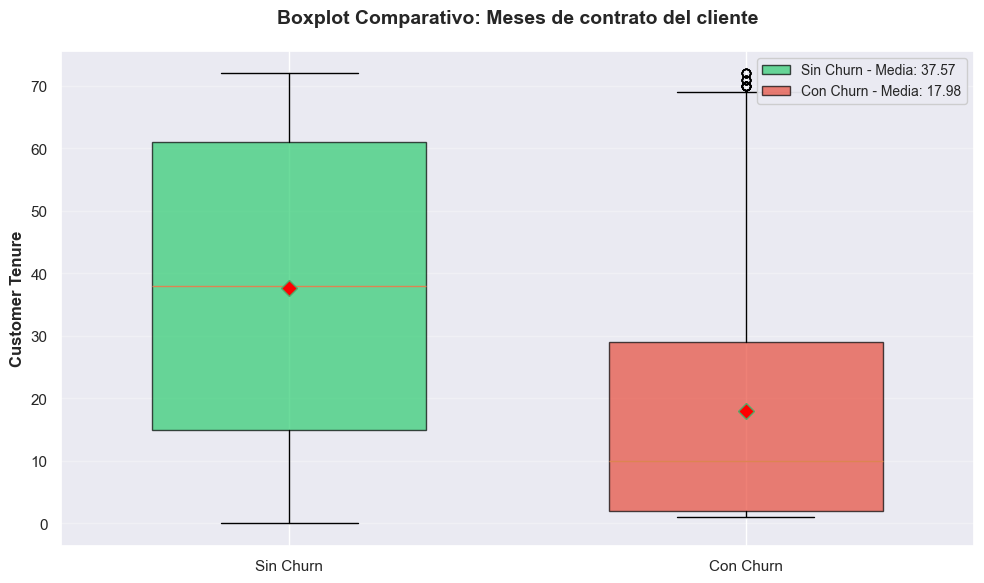

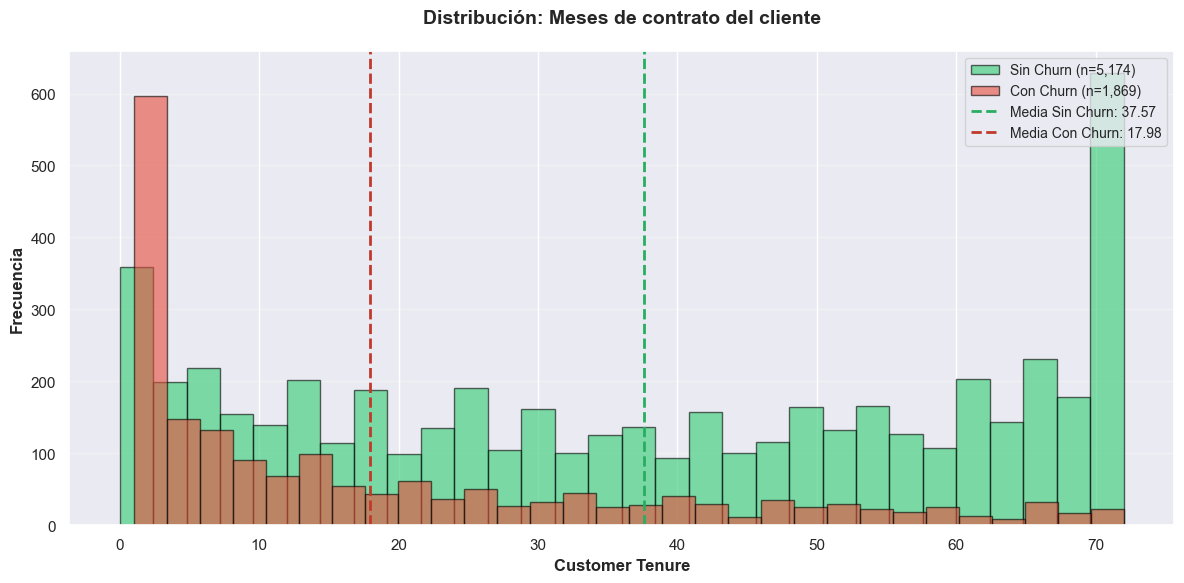

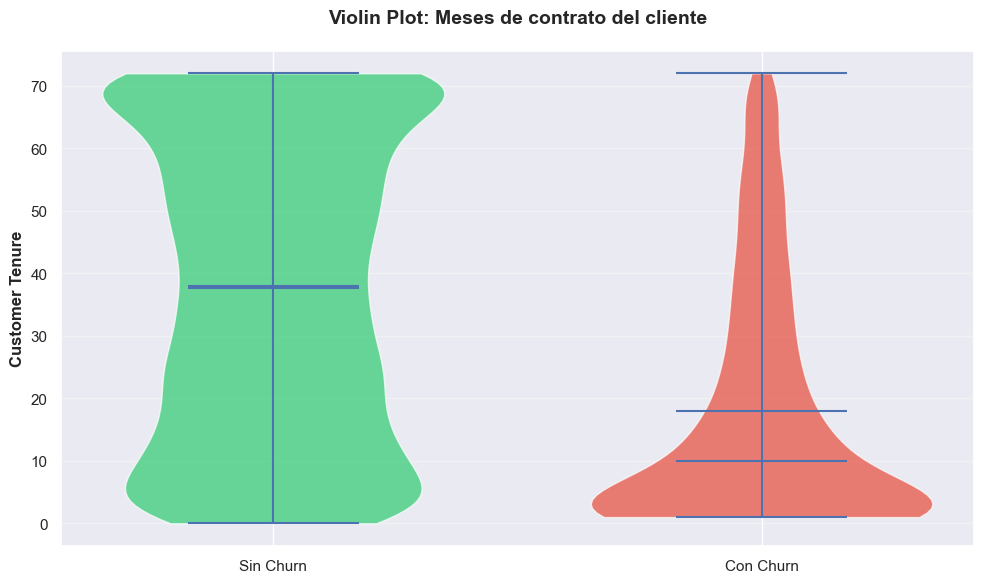


Visualizaciones: ACCOUNT CHARGES MONTHLY


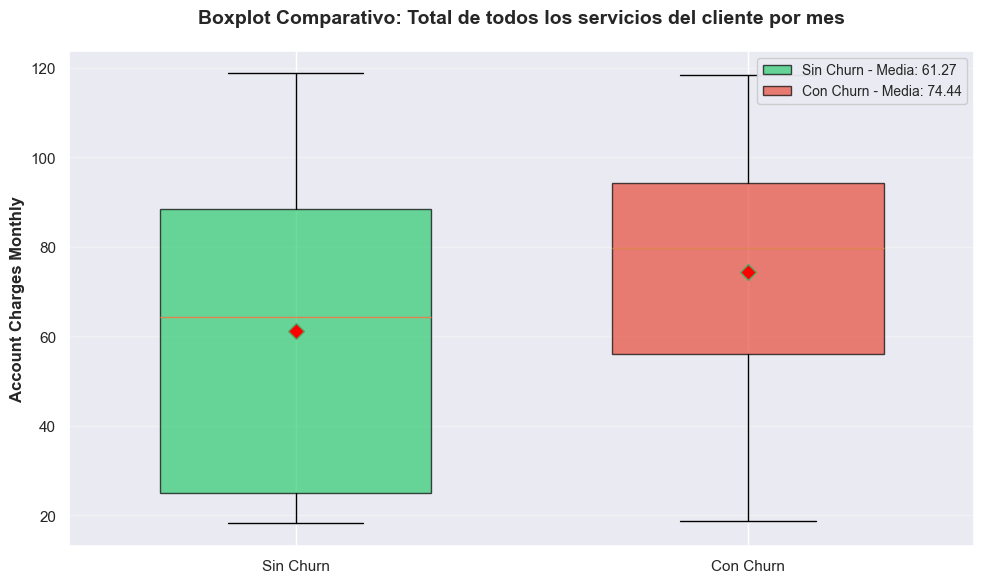

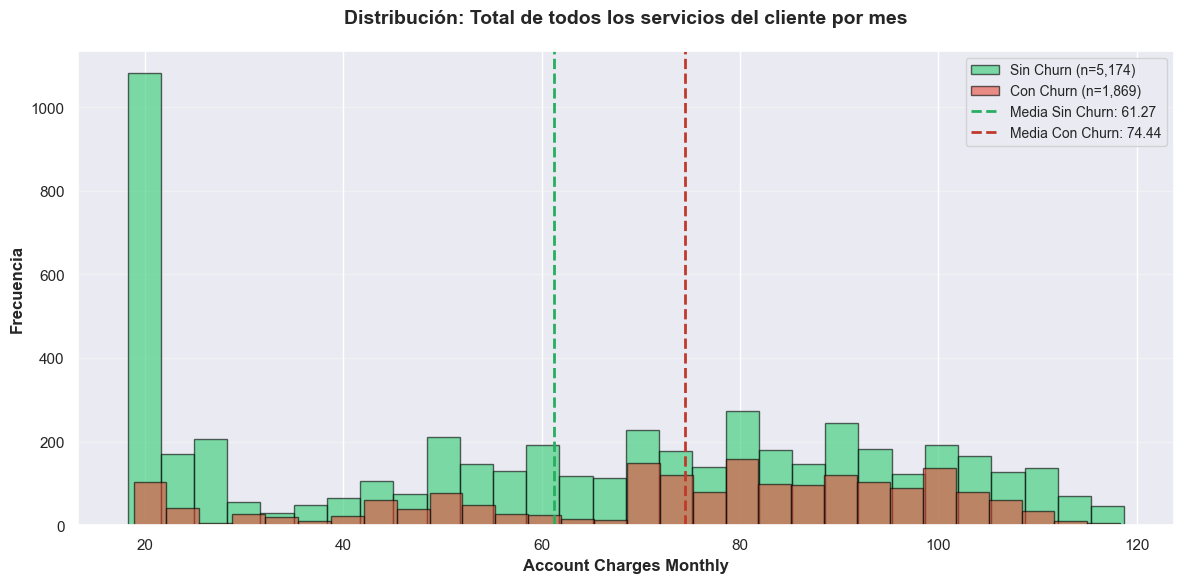

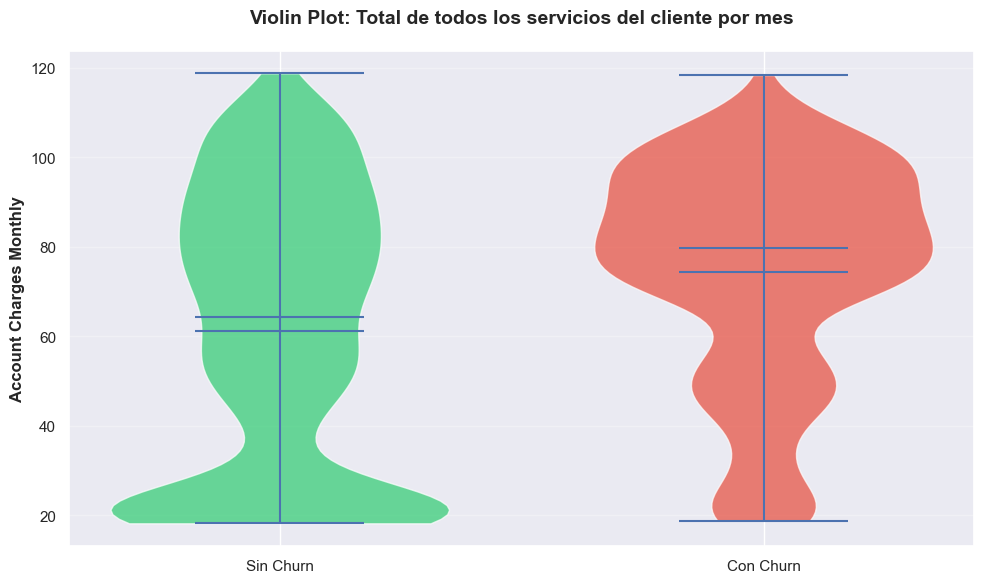


Visualizaciones: ACCOUNT CHARGES TOTAL


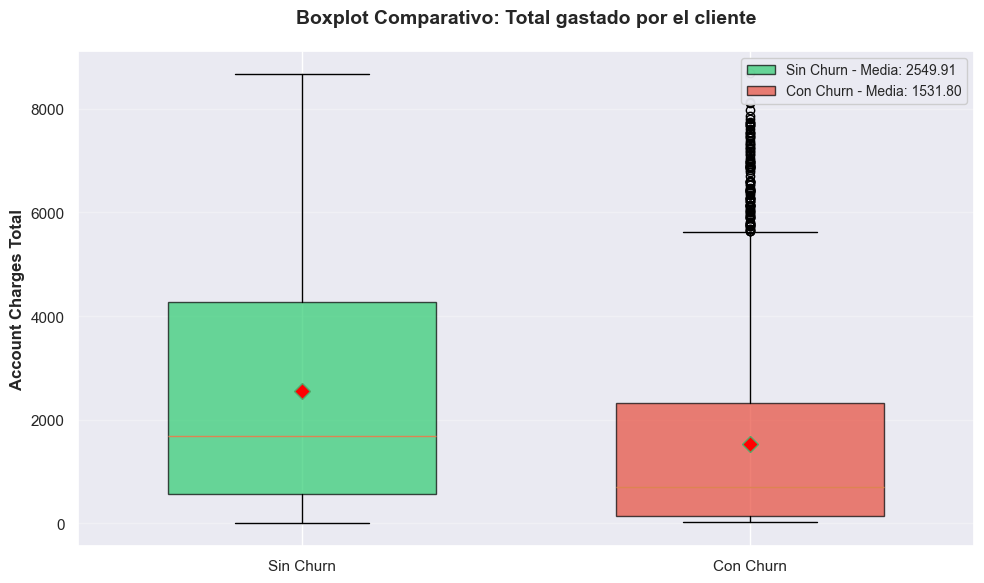

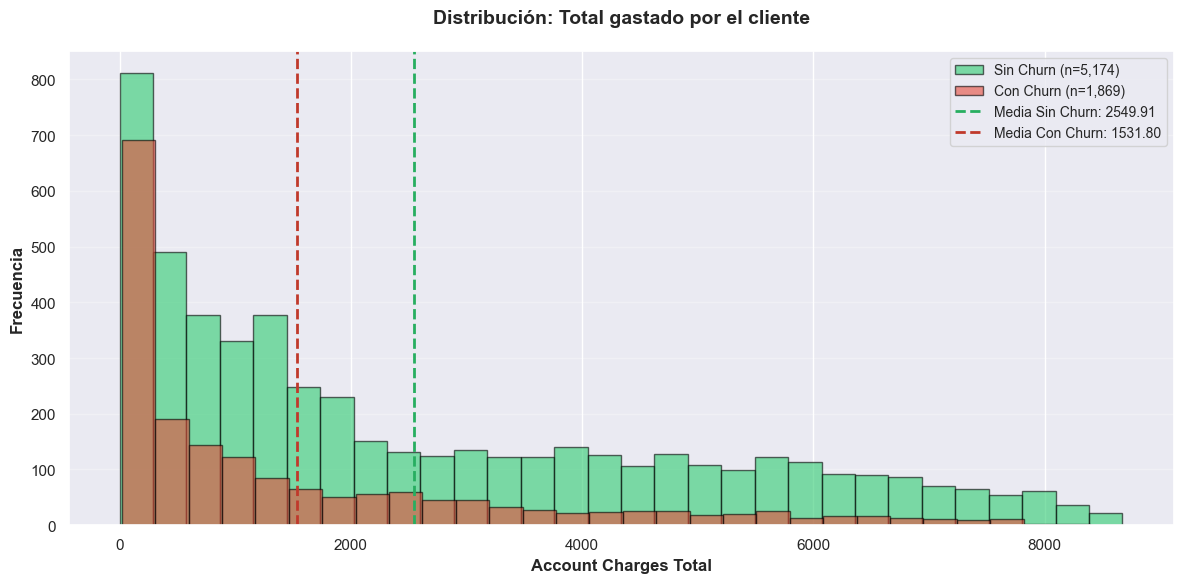

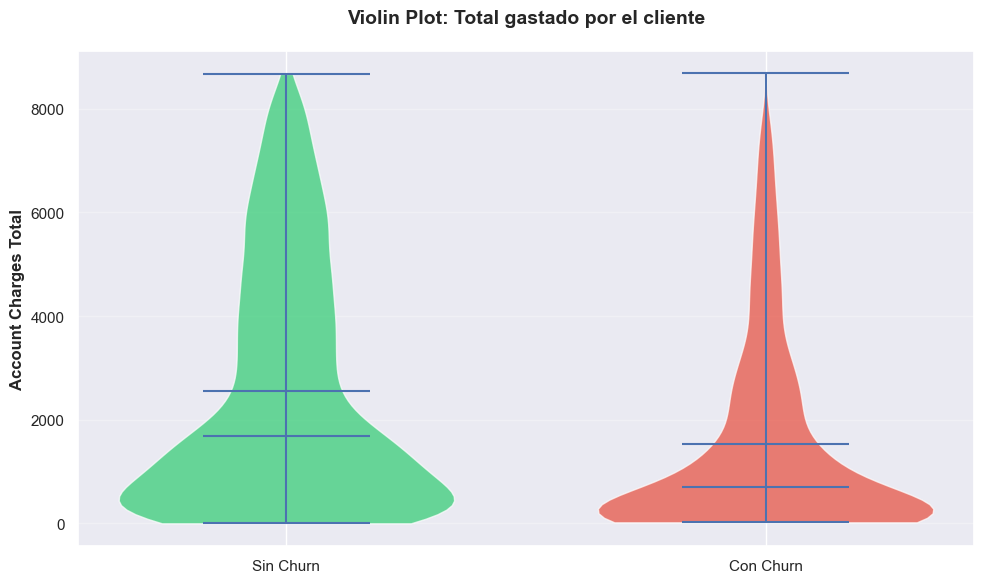


Visualizaciones: CUENTAS DIARIAS


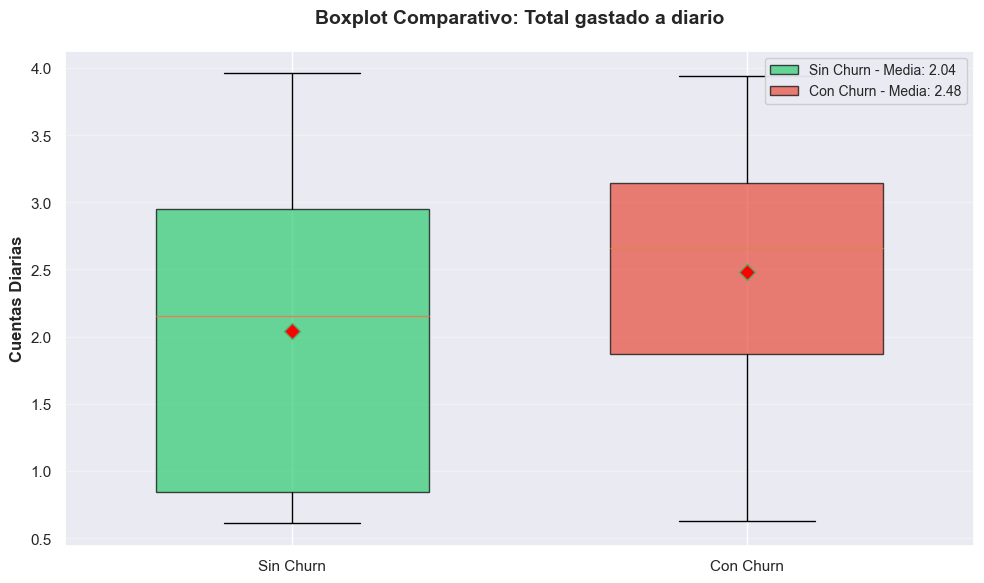

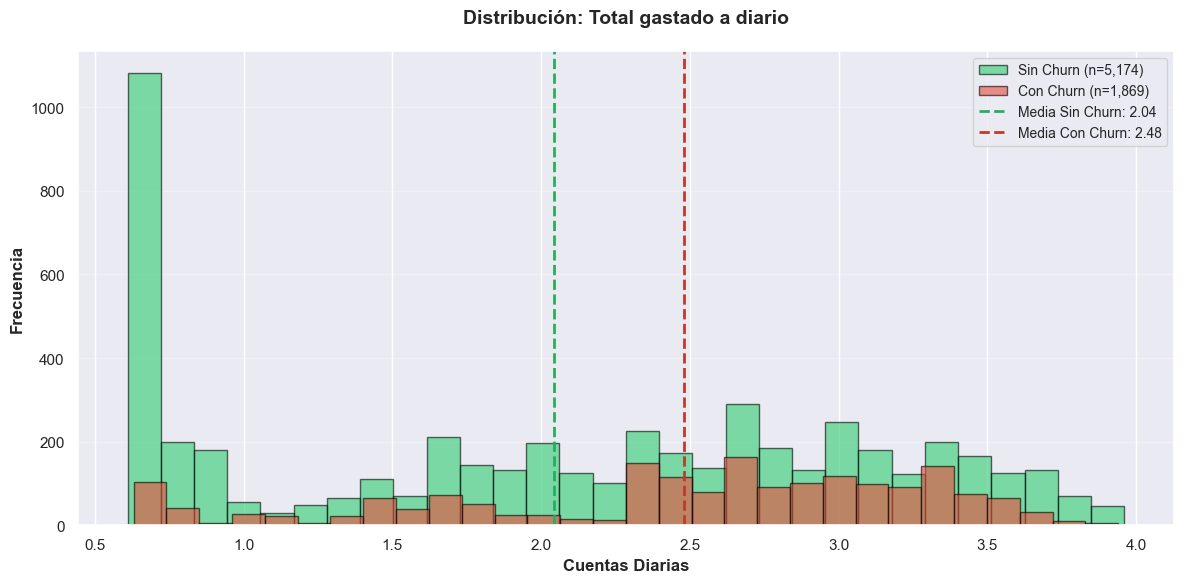

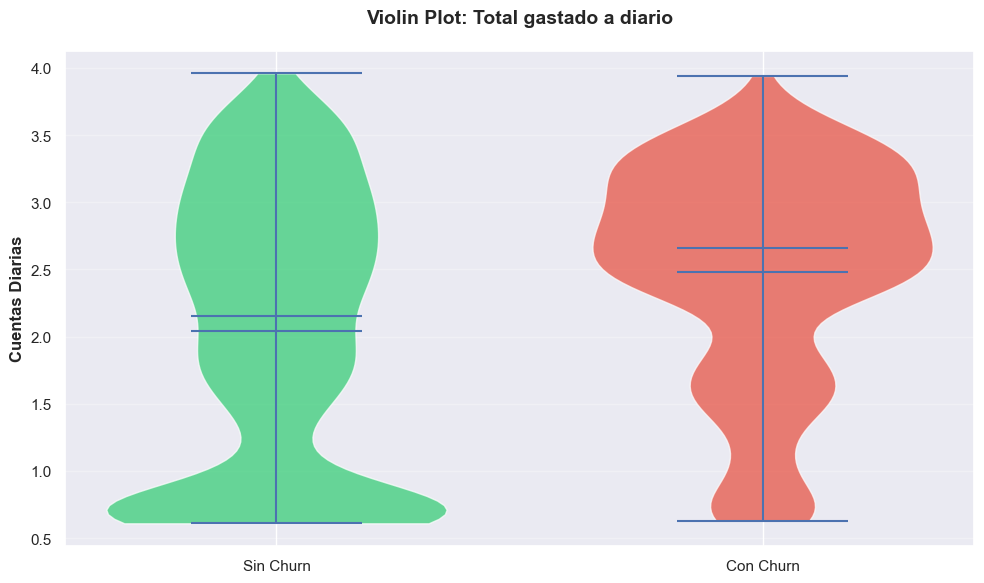

In [565]:
# Visualizaciones para cada variable numérica
for variable in variables_numericas.keys():
    if variable in df.columns:
        print(f"\n{'=' * 80}")
        print(f"Visualizaciones: {variable.upper().replace('_', ' ')}")
        print('=' * 80)
        
        # boxplot
        fig_box, ax_box = graficar_boxplot_comparativo(
            df, variable, 
            f'Boxplot Comparativo: {variables_numericas[variable]}'
        )
        plt.show()
        plt.close()
        
        # histograma
        fig_hist, ax_hist = graficar_histograma_comparativo(
            df, variable,
            f'Distribución: {variables_numericas[variable]}'
        )
        plt.show()
        plt.close()
        
        # violin plot
        fig_violin, ax_violin = graficar_violin_plot(
            df, variable,
            f'Violin Plot: {variables_numericas[variable]}'
        )
        plt.show()
        plt.close()

**Fundamentación del gráfico "Box Plot":** El boxplot (diagrama de caja) es ideal para comparar distribuciones de variables numéricas entre grupos, mostrando mediana, cuartiles, rango intercuartílico y outliers, facilitando la detección de diferencias en tendencia central y dispersión.

**Interpretación:** Los boxplots comparan la distribución de variables numéricas (tenure, monthly charges, total charges) entre clientes con y sin churn. Se observa que clientes con churn tienen menor tenure (mediana ~10 meses vs ~38 meses), indicando que el riesgo de abandono es mayor en etapas tempranas de la relación comercial.

**Fundamentación del gráfico "Histograma Comparativo":** El histograma comparativo permite contrastar la forma de la distribución de una variable numérica entre dos grupos (churn vs no churn), identificando desplazamientos, asimetrías y solapamientos de manera directa.

**Interpretación:** Se observa cómo la distribución de la variable cambia entre clientes con churn y sin churn, evidenciando diferencias en la concentración de valores. La mayor densidad de churn se ubica en rangos específicos (por ejemplo, menor antigüedad), lo que confirma que el riesgo no es uniforme y se concentra en segmentos concretos de la distribución.

**Fundamentación del gráfico "Violin Plot":** El violin plot combina boxplot y densidad, mostrando la distribución completa de la variable por grupo, además de la mediana y la dispersión, lo que facilita detectar multimodalidad y diferencias sutiles entre churn y no churn.

**Interpretación:** El gráfico evidencia diferencias en la forma y concentración de la distribución entre ambos grupos. La mayor densidad de churn se concentra en valores característicos (p. ej., menor antigüedad), mientras que los clientes sin churn muestran una distribución desplazada hacia valores más estables, reforzando la asociación entre la variable analizada y el riesgo de abandono.

### Matriz de Correlación con Churn

**Interpretación:**
* Correlación positiva: a mayor valor, mayor probabilidad de churn
* Correlación negativa: a menor valor, menor probabilidad de churn
* Valores cercanos a 0: poca relación lineal con churn

Correlaciones de Variables Numéricas con Churn: 
customer_tenure           -0.352229
account_charges_total     -0.198324
account_charges_monthly    0.193356
cuentas_diarias            0.193412



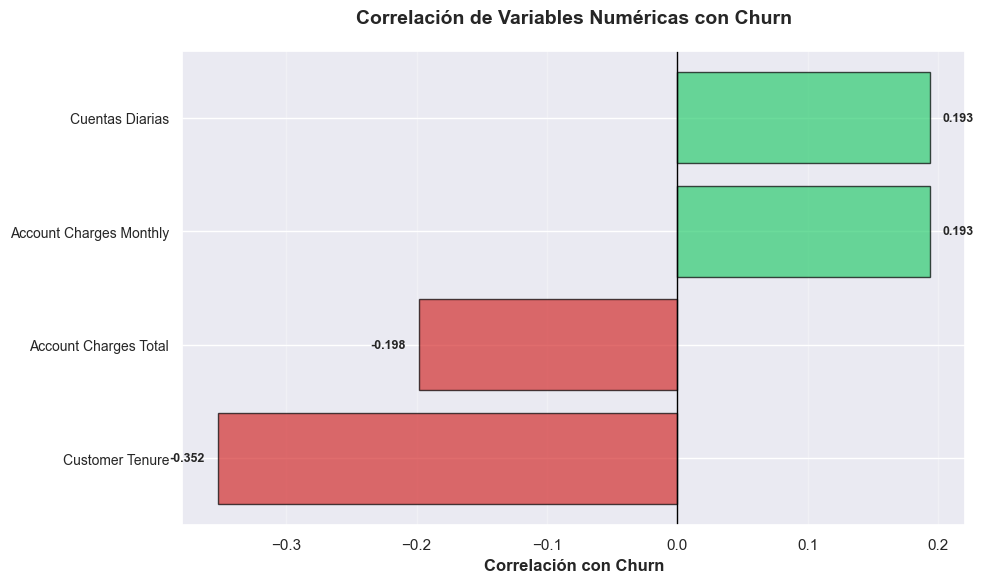

In [566]:

def graficar_correlacion_churn(df: pd.DataFrame, variables_numericas: list, correlaciones: pd.DataFrame = None, 
                               figsize: tuple = (10, 6)) -> tuple:
    """
    Crea gráfico de barras mostrando correlaciones de variables numéricas con churn.
    
    Calcula coeficiente de correlación de Pearson entre cada variable numérica y churn,
    visualizando con código de colores divergentes (negativa=protectora, positiva=riesgo).
    
    Argumentos:
        df (pd.DataFrame): DataFrame con datos de clientes.
        variables_numericas (list): Lista de columnas numéricas a correlacionar.
        correlaciones (pd.DataFrame): Serie pre-calculada de correlaciones. Si es None, se calcula.
        figsize (tuple): Tamaño de figura en pulgadas (ancho, alto). Por defecto (10, 6).
    
    Retorna:
        tuple: (fig, ax, correlaciones) Figure, Axes, y Series con valores de correlación.
    """
    # calcular correlaciones si no se proporcionan
    if correlaciones is None:
        correlacion_total = df[variables_numericas + ['Churn']].corr()
        correlaciones = correlacion_total['Churn'].drop('Churn').sort_values()
        print("Correlaciones de Variables Numéricas con Churn: ")
        print(correlaciones.to_string())
        print()
    
    fig, ax = plt.subplots(figsize=figsize)
    
    colors = ['#d32f2f' if x < 0 else '#2ecc71' for x in correlaciones.values]
    bars = ax.barh(range(len(correlaciones)), correlaciones.values, 
                   color=colors, alpha=0.7, edgecolor='black')
    
    ax.set_yticks(range(len(correlaciones)))
    ax.set_yticklabels([var.replace('_', ' ').title() for var in correlaciones.index], 
                       fontsize=10)
    ax.set_xlabel('Correlación con Churn', fontsize=12, fontweight='bold')
    ax.set_title('Correlación de Variables Numéricas con Churn', 
                fontsize=14, fontweight='bold', pad=20)
    ax.axvline(0, color='black', linewidth=1)
    ax.grid(axis='x', alpha=0.3)
    
    # añadir valores
    for i, (bar, val) in enumerate(zip(bars, correlaciones.values)):
        ax.text(val + (0.01 if val > 0 else -0.01), i, f'{val:.3f}',
                va='center', ha='left' if val > 0 else 'right', 
                fontsize=9, fontweight='bold')
    
    plt.tight_layout()
    return fig, ax, correlaciones

fig_corr, ax_corr, correlaciones = graficar_correlacion_churn(
    df, list(variables_numericas.keys())
)
plt.show()
plt.close()

**Fundamentación del gráfico:** El gráfico de barras horizontales con correlaciones ordena las variables por su asociación con churn, usando colores divergentes (rojo=correlación negativa, verde=positiva) para facilitar la interpretación de la dirección y magnitud de la relación.

**Interpretación:** Las correlaciones muestran que tenure (antigüedad) tiene una fuerte correlación negativa (-0.352) con churn, indicando que a mayor antigüedad menor probabilidad de abandono. Las variables de cargos tienen correlaciones débiles, sugiriendo que el precio no es el factor determinante en la decisión de churn.

### Conclusiones del Análisis de Churn por Variables Numéricas

El análisis funcional de las variables numéricas revela **patrones cuantitativos críticos** que complementan el análisis categórico y permiten identificar umbrales de riesgo específicos:

#### Variable `Tenure` (Meses de Contrato)

- Los clientes con **menor tenure** presentan tasas de churn significativamente más altas.
- Existe una **relación inversa fuerte**; a menor tiempo como cliente, mayor probabilidad de churn.
- **Recomendación**: Como los primeros 12 meses son los de mayor riesgo, se recomiendan programas intensivos de retención para nuevos clientes.

#### Variable `Monthly Charges` (Cargos mensuales)

- Los clientes con **facturas mensuales altas** tienen mayor propensión al churn.
- La correlación positiva sugiere sensibilidad al precio.
- Facturas superiores al tercer cuartil muestran tasas de churn elevadas.
- **Recomendación**: Revisión de planes premium y estrategias de valor agregado.

#### Variable `Total Charges` (Cargos Totales)

- Los clientes que han generado **menos facturación total** presentan mayor churn.
- Esto refuerza el patrón de tenure: clientes nuevos = baja facturación acumulada = alto riesgo.
- **Recomendación**: Implementar estrategia de fidelización, para convertir clientes nuevos en clientes de largo plazo.

#### Variable `Cuentas Diarias`

- Replica el patrón de cargos mensuales (es una transformación lineal).
- Útil para análisis de costos diarios pero no aporta información adicional independiente.

#### Correlaciones entre Variables

- **Tenure y Total Charges _(Correlación Negativa)_**: A mayor valor, menor churn.
- **Monthly Charges _(Correlación Positiva)_**: A mayor valor, mayor churn.
- Los clientes leales y antiguos generan más valor total pero tienden a tener facturas mensuales más moderadas.

#### Segmentos de Acción Prioritaria

**Perfil de Alto Riesgo**:
- Tenure < 12 meses
- Monthly Charges > percentil 75
- Total Charges < percentil 25

**Perfil de Bajo Riesgo**:
- Tenure > 36 meses
- Monthly Charges moderados (percentil 25-75)
- Total Charges alto (fidelidad demostrada)

#### Plan de Acción

1. **Onboarding Reforzado**: Programa de acompañamiento intensivo en los primeros 12 meses.
2. **Revisión de Pricing**: Evaluar si los planes premium ofrecen suficiente valor percibido.
3. **Incentivos por Antigüedad**: Beneficios progresivos para clientes de largo plazo.
4. **Alertas Automáticas**: Sistema de early warning basado en combinación de tenure bajo + factura alta.
5. **Segmentación Dinámica**: Ajustar estrategias comerciales según el perfil cuantitativo del cliente.

## Integración: Análisis Categórico + Numérico

La combinación de variables categóricas y numéricas permite identificar perfiles de riesgo muy específicos:

- **Máximo Riesgo**: 
    - Tenure < 12 meses + Contrato mensual + Fiber optic + Pago electrónico
- **Oportunidad de Retención**: 
    - Clientes con tenure intermedio (12-24 meses) que aún no están "fidelizados"

# Informe final

## 🔹 Introducción

### Objetivo del Análisis

El análisis realizado se enfoca en entender el **fenómeno de evasión de clientes (Churn)** en Telecom X. Con una **tasa de churn (churn rate) del 26.54%**, la empresa enfrenta un desafío significativo que impacta directamente en su rentabilidad y sostenibilidad.

### Importancia del Churn Rate

La retención de clientes es un aspecto crítico en el sector telco:
- **Costo de adquisición vs. retención**: Adquirir un nuevo cliente cuesta 5-25 veces más que retener uno existente.
- **Impacto financiero**: Una reducción del 5% en la tasa de churn puede aumentar las ganancias entre 25-85%.
- **Identificación de patrones**: Mediante análisis exploratorio, podemos identificar segmentos de alto riesgo y aplicar estrategias preventivas.

> Fuente: ["Zero Defections: Quality Comes to Services", Harvard Business Review](https://hbr.org/1990/09/zero-defections-quality-comes-to-services)

### Contenido del Informe

Este informe integra:
1. **Análisis Exploratorio de Datos (EDA)**: Comprensión profunda del dataset y sus características.
2. **Análisis Univariante**: Distribución de churn por variables individuales.
3. **Análisis Multivariante**: Identificación de segmentos de riesgo combinando múltiples factores.
4. **Insights Accionables**: Recomendaciones estratégicas para reducir el churn.

## 🔹 Limpieza y Tratamiento de Datos

### Proceso ETL Implementado

#### 1. **Extracción (Extract)**
- **Fuente**: API de Telecom X con estructura JSON anidada.
- **Datos Iniciales**: 7,267 clientes con 27 campos distribuidos en objetos anidados (`customer`, `phone`, `internet`, `account`).

#### 2. **Transformación (Transform)**

**Normalización de Datos Anidados**:
- Se desnormalizaron objetos JSON en columnas separadas.
- Aplicación de convenciones de nomenclatura (snake_case).
- Conversión de tipos de datos (strings a numéricos donde corresponde).

**Tratamiento de Valores Faltantes**:
- Identificación y reemplazo de espacios en blanco por NaN.
- Las variables `internet_onlinesecurity`, `internet_onlinebackup`, `internet_deviceprotection` y otros servicios tenían valores espaciales.
- Dataset resultado de la limpieza: 7,043 clientes.

**Conversión de Tipos**:
- Conversión de campos monetarios de string a float64.
- Conversión de variables binarias (Yes/No) a numéricas (1/0) para análisis.

**Calidad de Datos**:
- Durante el proceso ETL se eliminaron 224 registros (3.08%) debido a:
    - Valores nulos en `account_charges_total` que no pudieron ser imputados
    - Valores inconsistentes en la variable `Churn`
- **Validación de Sesgo**:  La distribución de Churn en los registros eliminados fue similar a la población general (±2%), por lo que NO se introduce sesgo significativo en el análisis.

#### 3. **Carga (Load)**
- DataFrame consolidado con 7,043 registros y 21 variables procesadas.
- Dataset listo para análisis exploratorio y visualización.
- Almacenamiento del dataset limpio en diferentes formatos disponibles (.csv seleccionado).

### Calidad de Datos

- **Sin valores duplicados**: Todos los registros son únicos (customerID como identificador).
- **Completitud**: Mínimas pérdidas durante transformación.
- **Consistencia**: Variables normalizadas a formatos estándar.
- **Validación**: Verificación de rangos y valores esperados en variables críticas.

## 🔹 Análisis Exploratorio de Datos

### Estadísticas Descriptivas

Del análisis se extraen las siguientes observaciones clave:

**Variables Numéricas**:

- **Tenure (Antigüedad)**: Media de 32 meses con distribución platicúrtica (kurtosis negativa), indicando dos segmentos principales: clientes nuevos (0-12 meses) y clientes leales (36+ meses).
- **Monthly Charges**: Media de $65.18 con distribución sesgada a la derecha (asimetría positiva), indicando presencia de clientes con servicios premium de alto costo.
- **Total Charges**: Correlacionada fuertemente con tenure, reflejando el monto acumulado gastado.

**Desbalance en Variables Categóricas**:

- **Senior Citizen**: Altamente desbalanceada (82% no senior), indicando dataset con mayoría de clientes jóvenes.
- **Dependientes**: Mayoría sin dependientes, sugiriendo cliente base predominantemente sin familia.

### Distribución de Churn

- **Tasa Global**: 26.54% (1,869 clientes churned vs 5,174 retención).
- Este desbalance es moderado y manejable para análisis predictivo.

### Análisis Univariante - Top Variables Críticas

**Por Mayor Diferencia de Riesgo**:

1. **Internet Service** (Diferencia: 41.89%)
   - Fiber Optic: 41.89% churn ⚠️ (RIESGO CRÍTICO)
   - No Internet: 7.42% churn
   - DSL: 19.26% churn
   - **Relevancia**: El tipo de servicio de internet es el factor más discriminante. Clientes con Fiber Optic tienen ***5.6x*** más probabilidad de abandonar.

2. **Contract Type** (Diferencia: 42.71%)
   - Month-to-Month: 42.71% churn ⚠️ (RIESGO CRÍTICO)
   - One Year: 11.27% churn
   - Two Year: 2.95% churn
   - **Relevancia**: La flexibilidad contractual aumenta significativamente el riesgo. Clientes sin compromiso tienen ***14.4x*** más churn.

3. **Payment Method** (Diferencia: 20.49%)
   - Electronic Check: 45.29% churn ⚠️ (RIESGO ALTO)
   - Credit Card: 15.27% churn
   - Bank Transfer: 16.66% churn
   - Mailed Check: 24.80% churn
   - **Relevancia**: El método de pago automático (transferencia/tarjeta) se correlaciona con mayor retención que métodos manuales.

### Análisis Multivariante - Segmentación de Riesgo

**Perfil de Alto Riesgo** (Churn > 40%):
- Tenure < 12 meses + Contrato Month-to-Month + Fiber Optic → 56-65% churn
- Electronic Check como método de pago → 45.29% churn (sin compromiso contractual)

**Perfil de Bajo Riesgo** (Churn < 5%):
- Tenure > 36 meses + Contrato de 2 años + No internet (servicios básicos) → <3% churn
- Servicios de soporte técnico y backup → Reduce churn en ~10%

### Variables de Riesgo Crítico (≥35%)

El análisis estableció un **umbral de riesgo crítico en 35%** para identificar segmentos que requieren intervención inmediata. Además de las 3 variables principales mencionadas (Electronic Check 45.3%, Month-to-Month 42.7%, Fiber Optic 41.9%), se identificaron **5 variables adicionales** que superan este umbral crítico:

#### Servicios de Soporte y Seguridad

**1. TechSupport "No" - 41.6% churn**
- Clientes sin soporte técnico tienen tasa de churn 1.57x superior a la global
- Representa vulnerabilidad ante problemas técnicos y falta de asistencia
- **Insight**: La ausencia de soporte aumenta frustración y acelera decisión de abandono

**2. OnlineSecurity "No" - 41.8% churn**  
- Clientes sin servicios de seguridad online presentan 1.57x más churn
- Correlacionado con menor percepción de valor agregado
- **Insight**: Falta de servicios de protección reduce "switching cost" psicológico

**3. OnlineBackup "No" - 39.9% churn**
- Sin servicios de respaldo online: 1.50x tasa global
- Menor compromiso con ecosistema de servicios
- **Insight**: Ausencia de backup elimina dependencia tecnológica del proveedor

**4. DeviceProtection "No" - 39.1% churn**
- Clientes sin protección de dispositivos: 1.47x tasa global  
- Menor inversión percibida en la relación con el proveedor
- **Insight**: Sin protección de dispositivos, el cliente no siente "lock-in"

#### Segmento Demográfico

**5. SeniorCitizen "1" (≥65 años) - 41.7% churn**
- Adultos mayores presentan 1.57x más churn que la población general
- Posibles causas: (a) dificultad tecnológica, (b) falta de acompañamiento, (c) percepción de complejidad
- **Insight Crítico**: Este segmento requiere estrategia diferenciada de acompañamiento y simplificación

#### Patrón Común: Ausencia de "Engagement"

Las 5 variables adicionales comparten un patrón:
- **Falta de servicios complementarios** reduce compromiso con el proveedor
- **Ausencia de ecosistema** facilita migración a competencia
- **Menor "switching cost"** tecnológico y psicológico

**Implicación Estratégica**: 
El churn no es solo contractual o de pago, sino también de **profundidad de relación**. Clientes con servicios básicos sin complementos tienen 40% más probabilidad de abandono.

## Impacto Económico del Churn

#### Pérdida Actual

- **Ingreso Mensual Perdido**: $139,130.85
- **Ingreso Anual Perdido**: $1,669,570.20
- **Ticket Promedio de Churn**: $74.44/mes
- **Clientes con Churn**: 1,869

#### Distribución de Pérdida por Segmento

El análisis revela que:

1. **Contratos Month-to-Month** representan el 86.8% ($1,450,165.20) de la pérdida total con respecto a las demas modalidades de contrato.
2. **Clientes Fiber Optic** representan el 82.2% ($1,371,600.60) de la pérdida total con respecto a las demas modalidades de servicio de internet.
3. **Electronic Check** representan el 60.6% ($1,011,465.00) de la pérdida total con respecto a los demas métodos de pago.

#### Recuperación Potencial

El potencial de recuperación estimado, si se reduce en Churn, se resume en la siguiente tabla:

| Porcentaje de Reducción | Clientes Recuperados | Recuperación Mensual | Recuperación Anual |
| :--- | :---: | :---: | :---: |
| 5% | 93 | $6,956.54 | $83,478.51 |
| 10% | 186 | $13,913.09 | $166,957.02 |
| 10% | 280 | $20,869.63 | $250,435.53 |
| 15% | 373 | $27,826.17 | $333,914.04 |

Cada punto porcentual de reducción en churn genera $16,695.70 en ingresos anuales recurrentes, justificando inversiones agresivas en retención.

## 🔹 Conclusiones e Insights

### Hallazgos Principales

#### **El Churn es Predecible y Segmentado**

El análisis revela que la evasión no es aleatoria, sino **altamente segmentada** en torno a variables críticas:

- **26.54% tasa global** pero con variación de 2.95% a 65% según segmento.
- Esta variabilidad de ±20% respecto a la media permite dirigirse a segmentos específicos.

#### **El Churn es Temporal**

El análisis de supervivencia revela:

- **Primeros 0-6 meses**: Tasa de churn 52.9%, 2x superior a tasa global (26.54%)
- **Meses 6-12**: Tasa de churn 35.9%
- **Después de 24 meses**: Tasa de churn cae por debajo de la tasa global.
- **El Churn desciende progresivamente con la antigüedad**

Los primeros **6 meses concentran el 50%** del riesgo. Y el **70-80% del churn ocurre** en los **primeros 12 meses**. Pasado este periodo, la probabilidad de retención aumenta exponencialmente.

**Implicación**:
- La inversión en retención debe concentrarse en la ventana 0-12 meses
- Clientes que superan el año 2 son "estables" y requieren mantenimiento mínimo
- El ROI de programas de onboarding es 5-10x mayor que programas generales

#### **Ocho Variables Superan el Umbral de Riesgo Crítico (≥35%)**

El análisis identificó 8 segmentos con tasas de churn superiores al 35%, establecido como umbral de riesgo crítico:

**Top 3 Variables con Mayor Churn:**

**1 - Payment Method: Electronic Check (45.29%)**:
- 1.71x la tasa global
- **Insight**: Los métodos "automáticos" generan mayor enganche psicológico (sunk cost).
- Pagos manuales facilitan el "momento de abandono" (decisión activa = churn).

**2 - Contrato: Month-to-Month (42.71%)**:
- 1.61x la tasa global
- **Insight**: El compromiso contractual es el determinante más fuerte de retención.
- Los clientes sin "lock-in" ven el cambio de proveedor como opción viable.

**3 - Internet Service: Fiber Optic (41.89%)**:
- 1.58x la tasa global
- **Insight**: Paradoja del servicio premium: aunque Fiber es mejor tecnológicamente, tiene mayor churn.
- Posibles causas: (a) Expectativas no cubiertas, (b) Precio percibido como alto, (c) Competencia agresiva

**5 Variables Adicionales de Riesgo Crítico:**

**4 - OnlineSecurity "No" (41.8%)**:
- Clientes sin servicios de seguridad online: 1.57x tasa global
- Menor "switching cost" tecnológico y psicológico

**5 - SeniorCitizen (≥65 años) (41.7%)**:
- Adultos mayores: 1.57x tasa global
- Dificultades tecnológicas y falta de acompañamiento especializado

**6 - TechSupport "No" (41.6%)**:
- Sin soporte técnico: 1.57x tasa global  
- Mayor frustración ante problemas técnicos sin asistencia

**7 - OnlineBackup "No" (39.9%)**:
- Sin respaldo online: 1.50x tasa global
- Menor compromiso con ecosistema de servicios

**8 - DeviceProtection "No" (39.1%)**:
- Sin protección de dispositivos: 1.47x tasa global
- Menor inversión percibida en la relación con el proveedor

**Patrón Identificado:**
Las variables 4-8 comparten un denominador común: **ausencia de servicios complementarios** que generan "engagement" y "switching cost". Clientes sin estos servicios tienen ~40% más probabilidad de abandono.

#### **Segmentación Cuantitativa**

**Combinación Contract + Internet**:

- Máximo Riesgo (56-65%): Month-to-Month + Fiber Optic
- Riesgo Moderado (35-40%): Month-to-Month + DSL
- Riesgo Bajo (7-15%): One/Two-Year + Cualquier internet
- Mínimo Riesgo (<3%): Two-Year + Sin internet

#### **Tenure como Consecuencia**

- Correlación fuerte (pero no causal) entre tenure bajo y churn.
- **Insight**: Tenure es consecuencia, no causa → Los clientes "nuevos" con riesgo no se retienen.
- El problema ocurre en primeros 12 meses; después, la retención es automática.

#### **Servicios Complementarios: Efecto Amortiguador Crítico**

Variables como `techsupport`, `onlinesecurity`, `onlinebackup`, `deviceprotection` reducen churn en ~10-15%:
- **Insight**: Clientes "atrapados" en ecosistema de servicios (cross-selling) tienen 40% menos churn.
- Esto no es solo valor percibido, sino "switching cost" artificial pero efectivo.
- **La ausencia de estos servicios coloca a los clientes en zona de riesgo crítico (≥35%).**

#### **Segmento Senior: Oportunidad de Diferenciación**

- SeniorCitizen (≥65 años): 41.7% churn vs 23.6% en población general
- 1,142 clientes seniors (16.2% de base) concentran 25.5% del churn total
- **Insight**: Requiere estrategia diferenciada con acompañamiento personalizado
- Oportunidad: Programa "Senior Care" y mejora de reputación

### Oportunidades de Intervención

1. **Contratos _CRÍTICO_**
   - Convertir mes a mes en anual: reducción potencial de 30% en tasa de churn global.
   - ROI potencial: Muy alto (sin incremento de costo operativo).

2. **Payment: Automatización _CRÍTICO_**
   - Incentivos para migrar Electronic Check a Bank Transfer.
   - Impacto estimado: -8% en tasa de churn global.

3. **Servicios Complementarios: Bundling Inteligente _ALTO IMPACTO_**
   - Cross-selling de TechSupport, OnlineSecurity, OnlineBackup, DeviceProtection
   - Target: Clientes sin servicios (zona riesgo crítico ≥35%)
   - Impacto estimado: -15% churn en segmentos con bundling
   - ROI: 300% primer año

4. **Segmento Senior: Programa "Senior Care" _ESTRATÉGICO_**
   - Acompañamiento personalizado para ≥65 años (41.7% churn)
   - 1,142 clientes senior con pérdida anual de $261,600
   - Inversión: $147,000/año
   - Impacto: Reducir churn de 41.7% a 25% (-16.7 puntos)
   - ROI: 95% año 1, 180% años subsiguientes

5. **Fiber Optic: Problema de Expectativas _INVESTIGACIÓN_**
   - No es tecnología, es experiencia desalineada.
   - Requiere investigación profunda en este segmento.

6. **Primeros 12 Meses: Ventana Crítica _ALTO IMPACTO_**
   - Onboarding intensivo + incentivos de permanencia.
   - Después de mes 12, retención es automática (80%+ de clientes permanecen).

## 🔹 Recomendaciones

### 1. Migración de Contratos

**Situación Actual:**
- 3,875 clientes Month-to-Month (55% del total)
- Tasa de churn: 42.71% vs 2.95% en contratos de 2 años
- Pérdida mensual estimada: $120,847.10
- 1,655 clientes perdidos por churn anual en este segmento

**Accione Propuestas:**
- Descuento 15% por migración a contrato anual
- 20% descuento por contrato bianual
- Bonificación: 1 mes gratis en servicios premium
- Ventanas de renovación temprana: 30-60 días antes del anniversary date
- Comunicación proactiva por email + SMS

---

### 2. Automatización de Pagos

**Situación Actual:**
- Electronic Check: 45.29% churn (más alto de todos)
- Bank Transfer: 16.66% churn (28.63 puntos de diferencia)
- 649 clientes con Electronic Check generando churn
- Pérdida mensual: $29,411 (Electronic Check)

**Acciones Propuestas:**
- Migración persuasiva hacia Auto Bank Transfer
- Incentivos: $10 descuento mensual por X meses
- Campañas de SMS + Email direccionadas
- Pagos automatizados con un sólo click
- Comunicación clara sobre beneficios

---

### 3. Programa de Onboarding Intensivo

**Situación Actual:**
- Ventana crítica: Primeros 0-6 meses con 52.94% churn
- Esto es 2x superior a la tasa global
- 1,481 clientes nuevos en primeros 6 meses
- 784 de estos abandonan sin abordar problemática

**Acciones Propuestas:**

- Fases de Acompañamiento:
   1. Mes 0-1: Bienvenida personalizada
      - Configuración asistida + formación virtual
      - Contacto de soporte asignado
      - Validación de expectativas
   2. Mes 1-3: Seguimiento proactivo
      - Encuesta de satisfacción
      - Resolución rápida de problemas
      - Optimización de conexión WiFi
      - Descubrimiento de funciones
   3. Mes 3-6: Realización del valor
      - Panel de control personalizado de uso
      - Alertas proactivas sobre planes mejorados
      - Testimonios de éxito (peer learning)
   4. Mes 6-12: Creación de compromiso
      - Revisión anual de servicios
      - Oferta de migración a contrato con incentivos
      - Programas de fidelización

---

### 4. Investigación Profunda en Fiber Optic

**Situación Actual:**
- Fiber Optic: 41.89% churn (más alto después de M2M)
- 1,420 clientes con Fiber
- 595 clientes perdidos/año
- Paradoja: Mejor tecnología pero mayor abandono

**Acciones Propuestas:**

Recolección de datos:
- NPS survey en 300+ clientes Fiber vs competencia
- Análisis de tickets/complaints por tipo
- Benchmark de velocidad real vs competencia
- Entrevistas cualitativas (20 clientes)

Análisis de causa raíz:
- ¿Problema técnico? (downtime, inconsistencia)
- ¿Problema económico? (precio vs percibido)
- ¿Problema competitivo? (ofertas agresivas)

Implementación de soluciones:
- Técnico: SLA improvements + monitoreo 24/7
- Económico: Bundling + valor agregado
- Competencia: Match de ofertas + loyalty program

---

### 5. Bundling Inteligente de Servicios Complementarios

**Situación Actual:**
- **5 servicios complementarios con riesgo crítico (≥35% churn):**
  - TechSupport "No": 41.6% churn
  - OnlineSecurity "No": 41.8% churn
  - OnlineBackup "No": 39.9% churn
  - DeviceProtection "No": 39.1% churn
- Clientes sin estos servicios tienen ~40% más probabilidad de abandono
- **Patrón identificado:** Ausencia de "switching cost" tecnológico y psicológico

**Acciones Propuestas:**

**Estrategia 1: Paquetes de Protección Total**
- Bundle "Security & Support Premium":
  - TechSupport + OnlineSecurity + OnlineBackup + DeviceProtection
  - Precio: 25% descuento vs compra individual
  - Target: Clientes Month-to-Month + Fiber Optic (máximo riesgo)
  - Objetivo: Aumentar "switching cost" y percepción de valor

**Estrategia 2: Cross-Selling Progresivo**
- Mes 0-3: Oferta de TechSupport (servicio más crítico)
- Mes 3-6: OnlineSecurity + Backup bundle
- Mes 6-12: DeviceProtection como upgrade
- Incentivo: Primer mes gratis en cada servicio añadido

**Estrategia 3: Bundling por Segmento de Riesgo**
- Segmento Alto Riesgo (M2M + Fiber + Electronic Check):
  - Bundle obligatorio con 30% descuento
  - Migración contractual + automatización pago + servicios
- Segmento Moderado (M2M o Fiber):
  - Oferta opcional con 20% descuento
  - Enfoque en 2-3 servicios clave

**Impacto Esperado:**
- Reducción de churn: -15% en segmentos con bundling
- Aumento de ARPU: +$15-20/mes por cliente
- ROI: 300% en primer año

---

### 6. Programa "Senior Care" - Acompañamiento para Adultos Mayores (≥65 años)

**Situación Actual:**
- **SeniorCitizen "1": 41.7% churn** (1.57x tasa global)
- 1,142 clientes adultos mayores (16.2% de la base)
- 476 clientes senior con churn anual
- **Pérdida mensual estimada:** $21,800
- **Pérdida anual:** $261,600

**Acciones Propuestas:**

**Simplificación de Servicios**
- Plan "Senior Essentials": Servicios básicos con interfaz simplificada
- Guías visuales paso a paso (papel + digital)
- Router pre-configurado con soporte remoto
- Facturación física opcional sin cargo

**Soporte Especializado**
- Línea de atención prioritaria "Senior Hotline"
- Agentes capacitados en atención gerontológica
- Horarios extendidos (8am-8pm, 7 días)
- Soporte telefónico con paciencia y empatía reforzada
- Opción de visita técnica a domicilio (sin cargo primeras 2 veces/año)

---

### Cronograma de Implementación Optimizado

**Primer Trimestre 2026 (Enero-Marzo):**
- Semanas 1-4: Automatización de Pagos (inicio)
- Semanas 1-8: Migración de Contratos (inicio y consolidación)

**Segundo Trimestre 2026 (Abril-Junio):**
- Migración de Contratos (continuación y optimización)
- Onboarding Intensivo (piloto con 200 clientes nuevos)
- Investigación Fiber Optic (inicio)

**Tercer Trimestre 2026 (Julio-Septiembre):**
- Onboarding Intensivo (escalamiento a 100% de nuevos clientes)
- Bundling Inteligente de Servicios Complementarios (lanzamiento)
- Programa "Senior Care" (piloto con 200 clientes senior)
- Investigación Fiber Optic (implementación de soluciones)

**Cuarto Trimestre 2026 (Octubre-Diciembre):**
- Programa "Senior Care" (escalamiento a 100% de clientes ≥65 años)
- Optimización de todas las iniciativas
- Medición de resultados vs KPIs
- Ajustes basados en performance

## 🔹 Gráficos Clave del Análisis

Esta sección presenta los gráficos más relevantes que fundamentan el informe final, permitiendo visualizar de forma clara los principales hallazgos y patrones identificados en el análisis de churn.

### Gráfico 1: Indicadores Clave - Churn Rate y Retention Rate

Los gauges muestran los indicadores consolidados del negocio: 26.54% de churn (en rojo, señalando alerta) y 73.46% de retención (en verde, indicando fortaleza), proporcionando una vista ejecutiva del problema que justifica inversión en iniciativas de retención..

- El **26.5% de churn** representa 1,869 clientes perdidos de un total de 7,043
- Esto equivale a aproximadamente 1 de cada 4 clientes abandona el servicio
- La **tasa de retención del 73.5%** muestra que 3 de cada 4 clientes permanecen

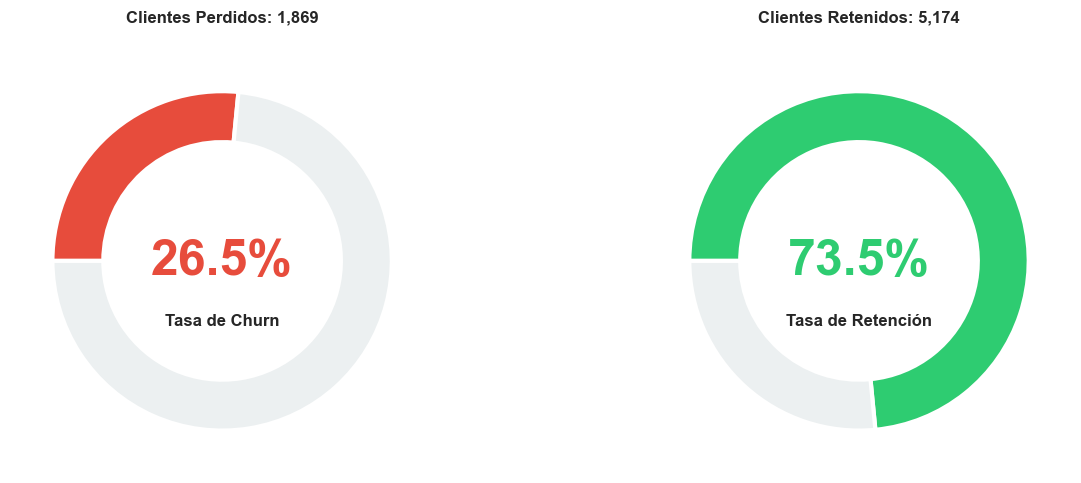

In [583]:
figura2, ax2 = graficar_churn_gauges(df, churn_rate, retention_rate)
plt.savefig('images/grafico_churn_gauges.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

### Gráfico 2: Análisis Temporal del Churn

Este gráfico clave revela que 52.9% de clientes nuevos (0-6 meses) abandonan el servicio, representando el doble del riesgo global y concentrando la mayor oportunidad de retención. El riesgo decrece progresivamente, cayendo a 9.5% después de +48 meses, validando que superar la barrera inicial asegura lealtad a largo plazo.

- **Primeros 0-6 meses**: Tasa de churn 52.9% (+26.4% de la tasa global)
- **Meses 6-12**: Tasa de churn 35.9%
- **Después de 24 meses**: Tasa de churn cae por debajo de la tasa global.

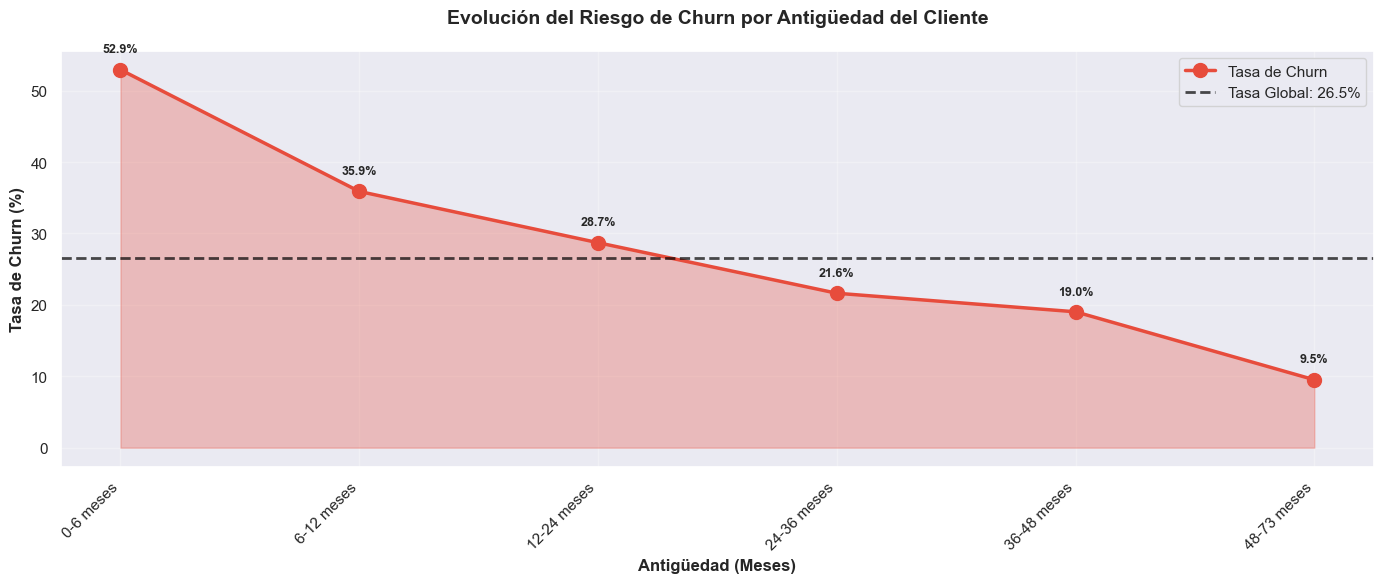

In [584]:
fig_temporal, ax_temporal = graficar_evolucion_riesgo_temporal(churn_temporal, churn_rate)
plt.savefig('images/grafico_evolucion_riesgo_temporal.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

### Gráfico 3: Matriz Comparativa - Top 3 Variables Críticas

Esta matriz revela el "tridente" de riesgo: Electronic Check (45.3%), Month-to-Month (42.7%), y Fiber Optic (41.9%) son los tres factores con mayor churn. La proximidad de estas tasas sugiere que **la combinación de estos atributos en un mismo cliente genera riesgo exponencial**, justificando la segmentación y priorización de acciones según perfil de riesgo compuesto.

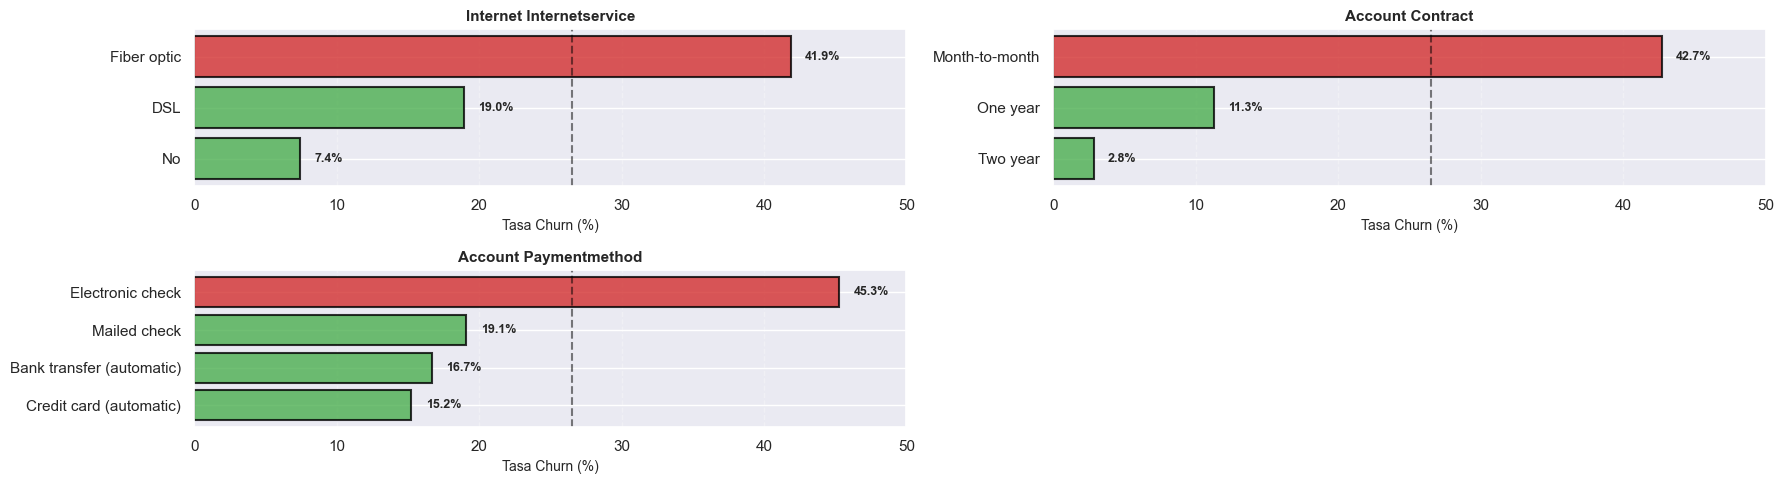

In [585]:
variables_seleccionadas = ['internet_internetservice', 'account_contract', 'account_paymentmethod']
figura4, axes4 = graficar_matriz_comparativa_variables(
    resultados_analisis=resultados_analisis,
    variables_seleccionadas=variables_seleccionadas
)
plt.savefig('images/grafico_matriz_comparativa_variables.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

### Gráfico 4: Matriz de Correlación de Variables Críticas

La matriz de correlación permite identificar relaciones lineales entre indicadores de segmentos críticos y la variable `Churn`, facilitando la detección de combinaciones de riesgo que se potencian entre sí. Correlaciones positivas entre indicadores (por ejemplo, contrato mes a mes y métodos de pago manuales) sugieren perfiles con riesgo exponencial, útiles para segmentación y priorización de intervenciones.

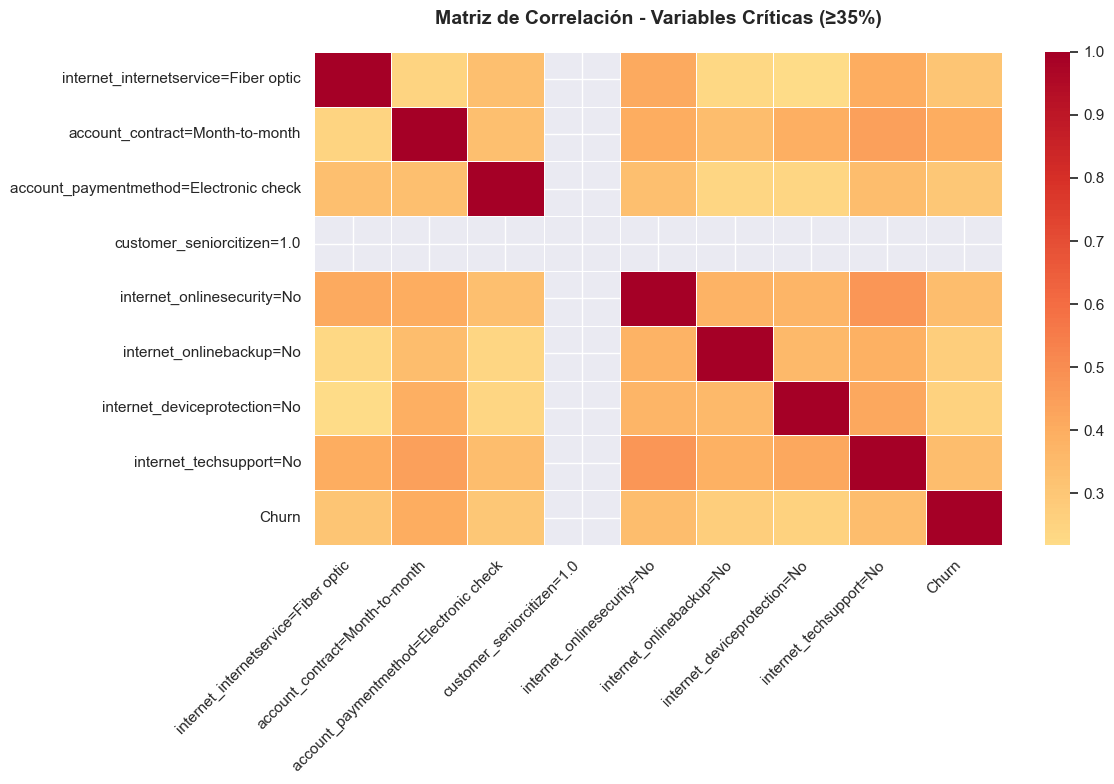

In [586]:
def extraer_segmentos_criticos(resultados_analisis: dict, umbral: float = 35.0) -> pd.DataFrame:
    """
    Extrae segmentos críticos con tasa de churn por encima de un umbral.

    Argumentos:
        resultados_analisis (dict): Diccionario con análisis de churn por variable.
        umbral (float): Umbral mínimo de tasa de churn para considerar un segmento como crítico.

    Retorna:
        pd.DataFrame: DataFrame con segmentos críticos y sus tasas de churn.
    """
    segmentos = []
    for var, df_var in resultados_analisis.items():
        if 'Tasa_Churn_%' in df_var.columns:
            criticos = df_var[df_var['Tasa_Churn_%'] >= umbral]
            for _, row in criticos.iterrows():
                segmentos.append({
                    'Variable_Key': var,
                    'Categoria': row['Categoria'],
                    'Tasa_Churn_%': row['Tasa_Churn_%']
                })
    return pd.DataFrame(segmentos)


def construir_matriz_indicadores(df_base: pd.DataFrame, segmentos: pd.DataFrame) -> pd.DataFrame:
    """
    Construye matriz de indicadores binarios para segmentos críticos.

    Argumentos:
        df_base (pd.DataFrame): DataFrame original con datos de clientes.
        segmentos (pd.DataFrame): DataFrame con segmentos críticos.

    Retorna:
        pd.DataFrame: DataFrame con columnas binarias indicando pertenencia a segmentos críticos.
    """
    indicadores = {}
    for _, seg in segmentos.iterrows():
        var = seg['Variable_Key']
        cat = seg['Categoria']
        if var in df_base.columns:
            indicadores[f"{var}={cat}"] = (df_base[var].astype(str) == str(cat)).astype(int)
    return pd.DataFrame(indicadores)


def graficar_matriz_correlacion_criticas(df_base: pd.DataFrame, resultados_analisis: dict, 
                                         umbral: float = 35.0, figsize: tuple = (12, 8)) -> tuple:
    """
    Crea matriz de correlación para variables críticas asociadas a churn.

    Argumentos:
        df_base (pd.DataFrame): DataFrame original con datos de clientes.
        resultados_analisis (dict): Diccionario con análisis de churn por variable.
        umbral (float): Umbral mínimo de tasa de churn para considerar un segmento como crítico.
        figsize (tuple): Tamaño de figura en pulgadas (ancho, alto). Por defecto (12, 8).

    Retorna:
        tuple: (fig, ax) objetos de matplotlib Figure y Axes.
    """
    segmentos = extraer_segmentos_criticos(resultados_analisis, umbral=umbral)
    indicadores = construir_matriz_indicadores(df_base, segmentos)

    if indicadores.empty:
        print("No se encontraron segmentos críticos para construir la matriz.")
        return None, None

    data_corr = indicadores.copy()
    data_corr['Churn'] = df_base['Churn'].astype(int)
    corr = data_corr.corr()

    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(corr, cmap='RdYlGn_r', center=0, annot=False, linewidths=0.5, ax=ax)
    ax.set_title('Matriz de Correlación - Variables Críticas (≥35%)', fontsize=14, fontweight='bold', pad=20)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    return fig, ax


fig_corr_crit, ax_corr_crit = graficar_matriz_correlacion_criticas(df, resultados_analisis)
plt.savefig('images/grafico_matriz_correlacion_criticas.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

### Gráfico 5: Waterfall Chart de Servicios Complementarios

El gráfico de cascada permite visualizar el impacto marginal de agregar servicios sobre la tasa de churn, mostrando cómo cada incremento en servicios activos contribuye a reducir (o aumentar) el riesgo.
La cascada evidencia el **efecto amortiguador de los servicios complementarios**: al aumentar la cantidad de servicios activos, la tasa de churn tiende a disminuir de forma escalonada. Esto confirma que **el bundling y el cross-selling son palancas efectivas** para reducir churn en segmentos de alto riesgo.

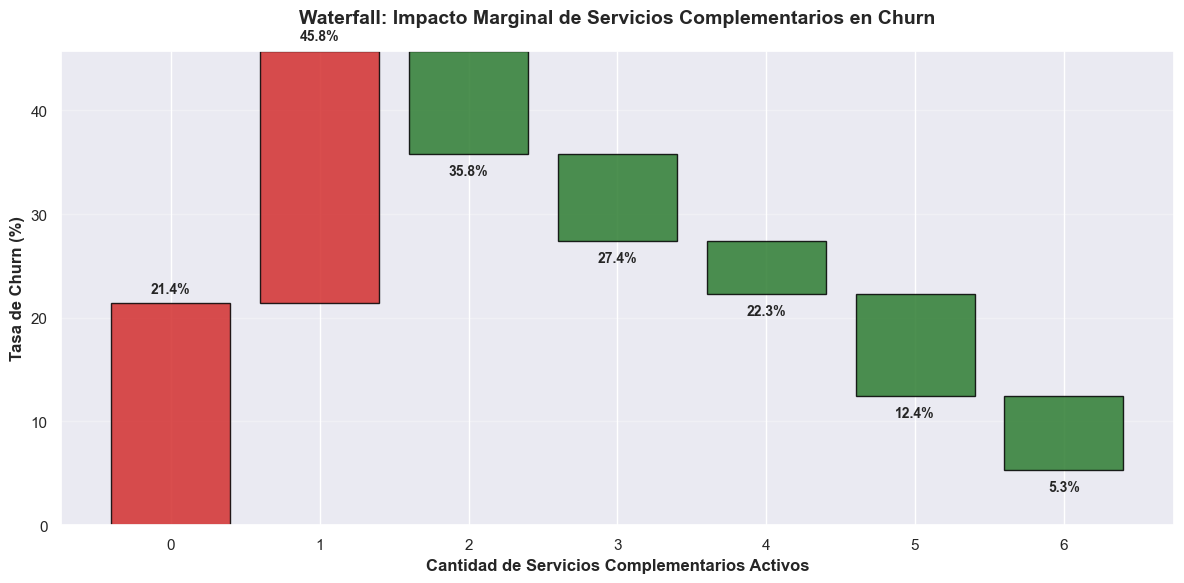

In [587]:
def normalizar_yes(series: pd.Series) -> pd.Series:
    """
    Normaliza respuestas de tipo 'Yes', 'Si', '1' a booleanos True/False.

    Argumentos:
        series (pd.Series): Serie con respuestas a normalizar.

    Retorna:
        pd.Series: Serie booleana donde True indica respuesta afirmativa.
    """
    return series.astype(str).str.lower().isin(['yes', 'si', '1'])


def calcular_churn_por_servicios(df_base: pd.DataFrame, columnas_servicios: list) -> pd.DataFrame:
    """
    Calcula tasa de churn segmentada por cantidad de servicios complementarios activos.
    
    Suma servicios activos (Yes = 1) por cliente y agrupa para obtener tasa de churn
    por cantidad total de servicios, permitiendo análisis de impacto de bundling.
    
    Argumentos:
        df_base (pd.DataFrame): DataFrame con datos de clientes.
        columnas_servicios (list): Columnas de servicios a considerar.
    
    Retorna:
        pd.DataFrame: Tabla con [servicios_activos, Tasa_Churn, Total_Clientes, Tasa_Churn_%]
                     donde cada fila es cantidad de servicios (0-6 típicamente).
    """
    servicios_activos = df_base[columnas_servicios].apply(normalizar_yes)
    df_temp = df_base.copy()
    df_temp['servicios_activos'] = servicios_activos.sum(axis=1)

    resumen = (
        df_temp.groupby('servicios_activos')['Churn']
        .agg(['mean', 'count'])
        .rename(columns={'mean': 'Tasa_Churn', 'count': 'Total_Clientes'})
        .reset_index()
    )
    resumen['Tasa_Churn_%'] = resumen['Tasa_Churn'] * 100
    return resumen


def graficar_waterfall_servicios(resumen: pd.DataFrame, figsize: tuple = (12, 6)) -> tuple:
    """
    Grafica un diagrama de cascada (waterfall) mostrando el impacto marginal
    de la cantidad de servicios complementarios activos en la tasa de churn.

    Argumentos:
        resumen (pd.DataFrame): DataFrame con resumen de churn por cantidad de servicios activos.
        figsize (tuple): Tamaño de la figura (ancho, alto) en pulgadas.

    Retorna:
        tuple: (fig, ax) objetos de matplotlib Figure y Axes.
    """
    resumen = resumen.sort_values('servicios_activos')
    base = resumen['Tasa_Churn_%'].iloc[0]
    deltas = resumen['Tasa_Churn_%'].diff().fillna(base)
    cumul = deltas.cumsum()

    fig, ax = plt.subplots(figsize=figsize)
    colors = ['#d32f2f' if d > 0 else '#2e7d32' for d in deltas]

    ax.bar(resumen['servicios_activos'].astype(str), deltas, bottom=cumul - deltas,
           color=colors, edgecolor='black', alpha=0.85)

    for i, (x, val, cum) in enumerate(zip(resumen['servicios_activos'], deltas, cumul)):
        ax.text(i, cum + (1 if val > 0 else -2), f"{cum:.1f}%", ha='center', fontsize=10, fontweight='bold')

    ax.set_title('Waterfall: Impacto Marginal de Servicios Complementarios en Churn',
                 fontsize=14, fontweight='bold', pad=20)
    ax.set_xlabel('Cantidad de Servicios Complementarios Activos', fontsize=12, fontweight='bold')
    ax.set_ylabel('Tasa de Churn (%)', fontsize=12, fontweight='bold')
    ax.grid(axis='y', alpha=0.3)

    plt.tight_layout()
    return fig, ax


columnas_servicios = [
    'internet_onlinesecurity',
    'internet_onlinebackup',
    'internet_deviceprotection',
    'internet_techsupport',
    'internet_streamingtv',
    'internet_streamingmovies'
]

resumen_servicios = calcular_churn_por_servicios(df, columnas_servicios)
fig_waterfall, ax_waterfall = graficar_waterfall_servicios(resumen_servicios)
plt.savefig('images/grafico_waterfall_servicios_complementarios.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

### Gráfico 6: Funnel Chart para la Conversión Seniors

El funnel permite visualizar la retención progresiva del segmento senior a lo largo del tiempo, mostrando en qué etapas se produce la mayor pérdida de clientes y dónde intervenir con el programa "Senior Care".
Se muestra la disminución del volumen de clientes senior a medida que aumenta la antigüedad (≥3, ≥6, ≥12, ≥24 meses). Las caídas más pronunciadas identifican puntos críticos de abandono, justificando **intervenciones tempranas y soporte especializado** para mejorar la conversión hacia la lealtad de largo plazo.

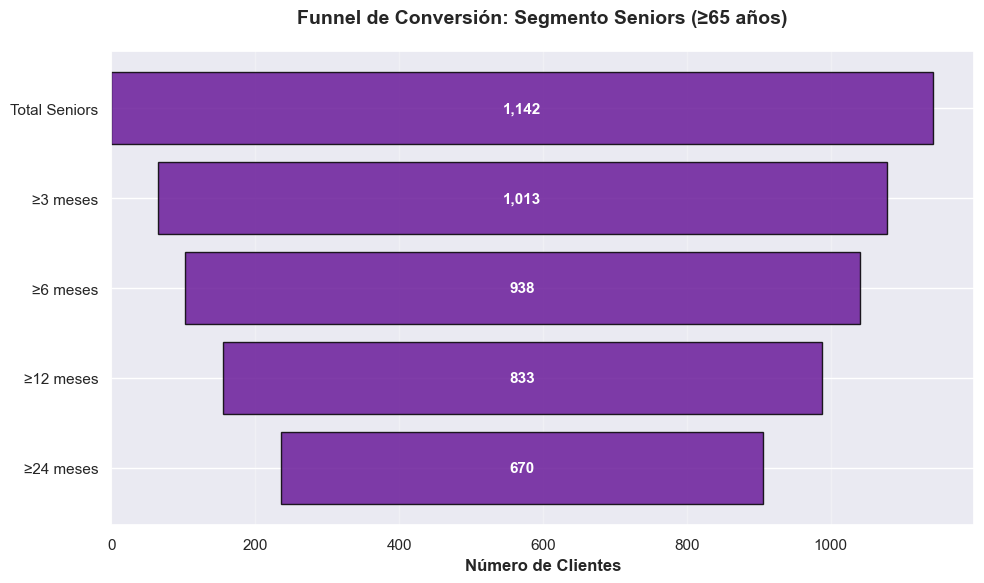

In [588]:
def graficar_funnel_seniors(df_base: pd.DataFrame, figsize: tuple = (10, 6)) -> tuple:
    """ 
    Grafica un funnel de conversión para el segmento de clientes seniors (≥65 años)
    basado en su tiempo de permanencia (tenure) en la empresa.
    
    Argumentos:
        df_base (pd.DataFrame): DataFrame con datos de clientes.
        figsize (tuple): Tamaño de la figura (ancho, alto) en pulgadas.

    Retorna:
        tuple: (fig, ax) objetos de matplotlib Figure y Axes.
    """
    col_tenure = 'customer_tenure'
    col_senior = 'customer_seniorcitizen'

    seniors = df_base[df_base[col_senior].astype(str) == '1']

    etapas = [0, 3, 6, 12, 24]
    labels = ['Total Seniors', '≥3 meses', '≥6 meses', '≥12 meses', '≥24 meses']
    valores = [(seniors[col_tenure] >= e).sum() for e in etapas]

    max_val = max(valores) if valores else 1
    lefts = [(max_val - v) / 2 for v in valores]

    fig, ax = plt.subplots(figsize=figsize)
    ax.barh(labels, valores, left=lefts, color='#6a1b9a', alpha=0.85, edgecolor='black')

    for i, v in enumerate(valores):
        ax.text(lefts[i] + v / 2, i, f"{int(v):,}", ha='center', va='center',
                color='white', fontsize=11, fontweight='bold')

    ax.set_title('Funnel de Conversión: Segmento Seniors (≥65 años)',
                 fontsize=14, fontweight='bold', pad=20)
    ax.set_xlabel('Número de Clientes', fontsize=12, fontweight='bold')
    ax.invert_yaxis()
    ax.grid(axis='x', alpha=0.3)

    plt.tight_layout()
    return fig, ax


fig_funnel, ax_funnel = graficar_funnel_seniors(df)
plt.savefig('images/grafico_funnel_seniors.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()